<a href="https://colab.research.google.com/github/AliyaAM/bayesian_meta_analysis/blob/main/bayesian_meta_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Informing behaviour change intervention design using systematic review with Bayesian meta-analysis: physical activity in heart failure 

 Embracing the Bayesian approach, we aimed to synthesise evidence regarding barriers and enablers to physical activity in HF in a way that can inform behaviour change intervention development. This approach helps in estimating and quantifying the uncertainty in the evidence and facilitates the synthesis of qualitative and quantitative studies. MRC framework for designing complex interventions (Skivington et al., 2021) urges researchers to consider evidence from a diverse set of sources when developing interventions. Several methods have been proposed including the use of mixed-methods studies where one type of evidence (e.g., qualitative) informs the research design of the complimenting study (e.g., quantitative). However, it is less clear how to compare findings from a broad range of studies (qualitative and quantitative) and how to estimate uncertainty in the evidence. Bayesian approach presents a unique opportunity for research informing complex intervention development by providing a workflow and analysis equipped to combine different evidence and evaluate uncertainty in the evidence.   
 
 In this review, qualitative and observational studies investigating barriers and enablers to physical activity in adults diagnosed with HF were included in this systematic review with Bayesian meta-analysis. Evidence from three qualitative and 16 ($N$ = 2739) quantitative studies was synthesised. Qualitative evidence was annotated using Theoretical Domains Framework and represented as a prior distribution using an expert elicitation task. The maximum a posteriori probability (MAP) was calculated as a summary statistic for the probability distribution for the expected value of the $log OR$ value estimating the relationship between physical activity and each determinant, according to qualitative evidence alone, quantitative evidence, and qualitative and quantitative evidence combined.
 
Bayesian updating is defined as a procedure of updating prior belief by incorporating new information. Degrees of belief about the probability of an event or an outcome within a Bayesian prediction model are represented in a prior distribution (Savage, 1951). Thus, the prior distribution is an initial belief about a phenomenon. Likelihood distribution for a belief is the extent to which the hypothesis is likely given the newly observed evidence. Bayesian updating is the process by which the prior changes upon considering new evidence. The result of Bayesian updating is a new probability distribution representing the updated belief, which is called posterior probability distribution (Spiegelhalter et al., 2003). 

Bayesian meta-analysis was conducted in R following methods outlined in (Spiegelhalter et al., 2003). In this review, qualitative evidence was used to elicit the prior distribution, and quantitative evidence was used to elicit the likelihood. Posterior distribution was obtained by updating the qualitative evidence with the quantitative evidence. Detailed statistical analysis is reported in supplement 3. Parameters for prior and likelihood were sampled from a normal distribution: **N**($\mu$, $\sigma^2$).

## Prior distribution
The qualitative evidence was synthesised using the Theoretical Domains Framework, TDF (Cane et al., 2012). Three reviewers (AA, BV, AC) independently annotated line-by-line the identified qualitative papers using the TDF. Disagreements were resolved through discussion. Then, based on the findings of the TDF analysis, **a prior elicitation task** was developed to capture experts' ($N$ = 6) beliefs about the probability distribution for physical activity conditioned on the constructs identified relevant in qualitative evidence (i.e. informative prior).  Six reviewers (AA; LT; BV; NA; AC; AT) completed the expert elicitation task. The reviewers made a judgement on whether the hypothetical HF patient met the recommended levels of physical activity or not. The $log OR$ distribution was generated from the results of the expert elicitation task (i.e., prior) using the following parameters for the normal distribution:  mean ($\mu$) and variance ($\sigma^2$). The mean ($\mu$) was the $log OR$ representing the association between a construct being present in a hypothetical scenario describing a patient and the experts' judgement that the patient was physically active. The variance ($\sigma^2$) was the sampling variance of the association between a construct being present in a scenario and experts' judgement that the hypothetical patient in the scenario is likely to be active. 


> > > > Prior = **N**($\mu_{prior}$, $\sigma^2_{prior}$) 

## Likelihood distribution 
Effect sizes reported in the individual papers were converted into $log OR$ using compute.es library in R (Del Re, 2020). Meta-analysis was performed pooling individual studies $log OR$. 

  The association between physical activity and determinants assessed in quantitative studies were summarised in a meta-analysis including univariate associations using a random-effect model with maximum likelihood estimation (REML). The bivariate correlation  (Pearson's r coefficient, unadjusted)  between physical activity and an associated variable and the standardised mean differences (SMD) between groups in the dichotomised assessment were summarised in a pooled estimate, separately. The meta-analyses were implemented in R using the metafor library (Viechtbauer, 2010).  The sampling distribution variance was standardised using an r-z transformation.  This was done to mitigate heterogeneity in the measurement of the outcome. SMD between exposure and control was estimated for the same reason. ES.compute in R was used to convert effect sizes to log ORs 
  
  The likelihood was elicited with the following parameters: the mean ($\mu_{likelihood}$) was the pooled $log OR$ across the included quantitative studies; and the variance ($\sigma^2_{likelihood}$) was the sampling variance across the included in the meta-analysis studies. 



> > > > Likelihood = **N**($\mu_{likelihood}$, $\sigma^2_{likelihood}$)


## Posterior distribution 
The findings of the prior elicitation task were updated with quantitative evidence concerning each barrier/enabler (i.e., likelihood) using the formula for the Bayesian updating of a normal distribution (p63. Spiegelhalter et al., 2003): 
> > > > Posterior = **N**($\mu_{posterior}$, $\sigma^2_{posterior}$)

Where the mean is: 

$\mu_{posterior}$ = ($\mu_{prior}$ / $\sigma^2_{prior}$ + $\mu_{likelihood}$ / $\sigma^2_{likelihood}$) / (1/ $\sigma^2_{prior}$ +1/ $\sigma^2_{likelihood}$) 


And the variance is: 
$\sigma^2_{posterior}$ = 1 / (1/ $\sigma^2_{prior}$ +1/ $\sigma^2_{likelihood}$)
---


The sensitivity analysis stratified by physical activity outcome is available from this Github repository. 


In [ ]:
## Setup R in Colab
install.packages("R.utils")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check) 
options(rlang_interactive=TRUE)

install.packages("googledrive")
library("googledrive")

options(warn=-1)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings


Installing 

In [ ]:
## Installing essential packages to run the analysis 
install.packages("readr")
install.packages("filenamer")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("assertthat")
install.packages("ggplot2")
install.packages("reshape2")  
install.packages("tibble")
install.packages("compute.es")
install.packages("metafor")
install.packages("ggridges")
install.packages("bayestestR")
install.packages("HDInterval")
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mathjaxr’, ‘pbapply’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unsp

In [ ]:

## Loading libraries 
library(tidyverse)
library(dplyr)
library(assertthat)
library(ggplot2)
library(filenamer)
library(tibble)
library(compute.es)
library(metafor)
library(RColorBrewer)
library(reshape2)  
library(ggridges)
library(bayestestR)
library(HDInterval)
library(RColorBrewer)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks R.utils::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()


Attaching package: ‘assertthat’


The following object is masked from ‘package:tibble’:

    has_name



Attaching package: ‘filenamer’


The following object is masked from ‘package:R.utils’:

    insert


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Loading the 'metafor' package (version 3.0-2). For an
introduction to the package please type: help(metafor)



Attaching package: ‘metafor’


The following object is masked from ‘package:compute.es’:

    tes



Setting root repositories for sourcing and outputing files 

In [ ]:
## Set the root directory to look for source code.
SOURCE_ROOT = "https://raw.githubusercontent.com/AliyaAM/bayesian_meta_analysis/master/"
## Set the root location on the user's colab home directory to save output files.
OUTPUT_ROOT = "/content/__tmp_output_files_from_bayesian_meta_analysis/"

Load data


In [ ]:

## Load data from GutHub repository 
# Data from the large international study on physical activity in HF was used to elicit the empirical hyperprior 
JaarsmaInternationalStudy = read.csv(paste(SOURCE_ROOT, "HyperPriorData.csv", sep="")) 

# Data from the expert elicitation task (median probability (variance) for physical activity when construct is present; and median probability (variaince) for physical activity when constrcut is absent)
# This data was used to elicit prior distribution for physical activity conditioned on a construct
x = read.csv(paste(SOURCE_ROOT, "input.csv", sep=""))  #to perform the analysis we require this data for all indexed functions which were indexed by the name of the included constructs (eg., self-efficacy, social support). This is done so the analysis is parsled out for each construct separately. 

# Data extracted from the quantitative studies, informed likelihoood distribution 
data = read.csv(paste(SOURCE_ROOT, "QuantData_CheckedForAccuracy_20March2020.csv", sep=""))  #file is also used for indexing the analysis by the name of construct 


Convert effect sizes extracted from individual studies into log Odds Ratios (log OR)

In [ ]:
#convert effect sizes from individual studies into log ORs
source(paste(SOURCE_ROOT, "ConvertEffectsizes.R", sep="")) #### convert effect sizes from individual studies  (F-value, Binary (Absolute numbers and proportions), r coeffcient and SMD) into log odds ratios. All quantitative results are converted to log OR in order to be comptable with qualitative evidence, we treated all results as binary. 

likelihood_data =  ConvertEffectsizes(data = data)

# save converted effect sizes to a file in the temporary directory: 
 write.table(likelihood_data, file = paste(OUTPUT_ROOT, "likelihood_data.csv", sep=""), 
 
             append = FALSE, 
             quote = TRUE, 
             sep = " ", 
             eol = "\r", 
             na = "NA", 
             dec = ".",
             row.names = FALSE, 
             col.names = TRUE, 
             qmethod = c("escape", "double"),
             fileEncoding = "" )

print(likelihood_data)


                         Author Year                    Construct    lOR  l.lor
1           Kramer et al., 2017 2017                          Age  -0.74  -0.78
2           Kramer et al., 2017 2017                          CRT     NA     NA
3      van der Wal et al., 2010 2010                          Age  -0.43  -0.61
4      van der Wal et al., 2010 2010                         LVEF  -0.13  -0.30
5        Gallagher et al., 2011 2011                SocialSupport   0.76   0.28
6            Pozehl et al. 2018 2018                    Education   0.00  -0.54
7            Pozehl et al. 2018 2018                    Education   0.23  -0.31
8            Pozehl et al. 2018 2018                  Employment2  -0.62  -1.32
9            Pozehl et al. 2018 2018                   Employment  -0.78  -1.48
10           Pozehl et al. 2018 2018                    Ethnicity   0.70   0.16
11           Pozehl et al. 2018 2018                    Ethnicity   0.11  -0.42
12           Pozehl et al. 2018 2018    

In [ ]:
#perform frequentist meta-analysis to elicit the likelihood (Pooled log OR)

source(paste(SOURCE_ROOT, "PooledN.R", sep="")) # calculate the total number of participants (N) across studies that evaluated each construct, read from the csv file QuantData

source(paste(SOURCE_ROOT, "PooledOddsRatio_metaanalysis.R", sep=""))  #run the frequentist meta-analysis (REML) pooling the findings from quantitative studies, stratified by construct. The Overall Effect estimate is (log) Odds Ratio, a list of pooled Log ORs, one per construct). 



Combining qualitative and quantitative evidence in Bayesian Update

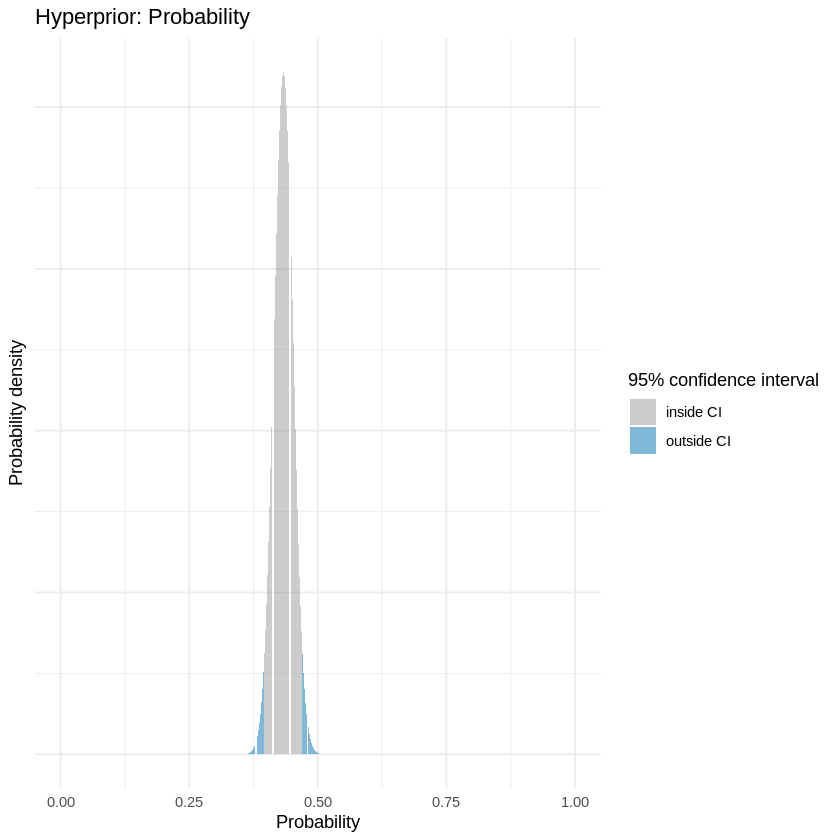

[1] "Age"


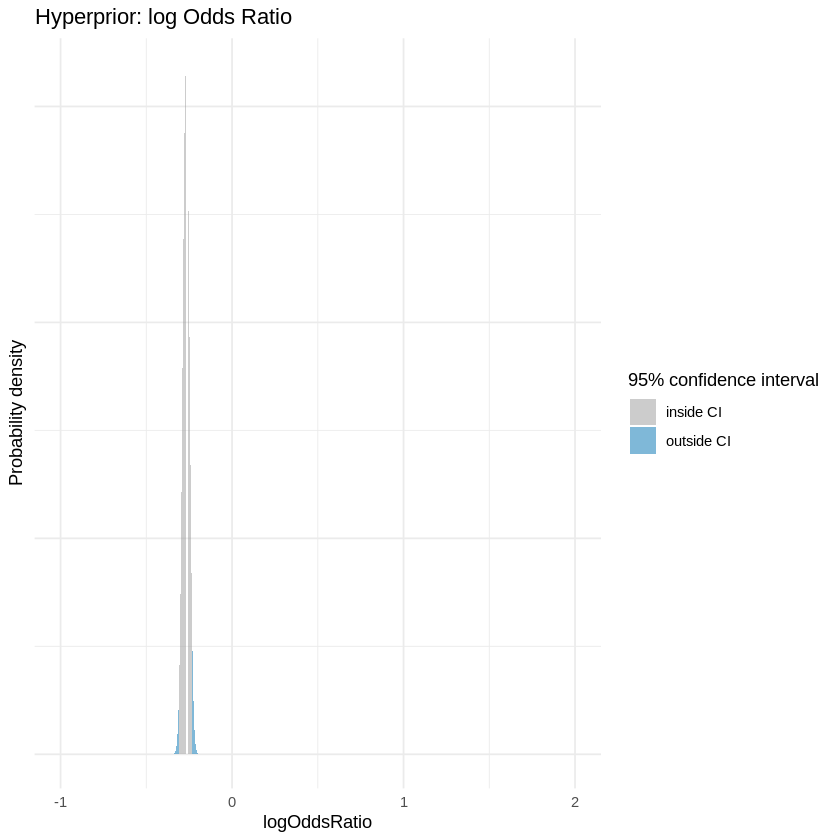

[1] "Age"


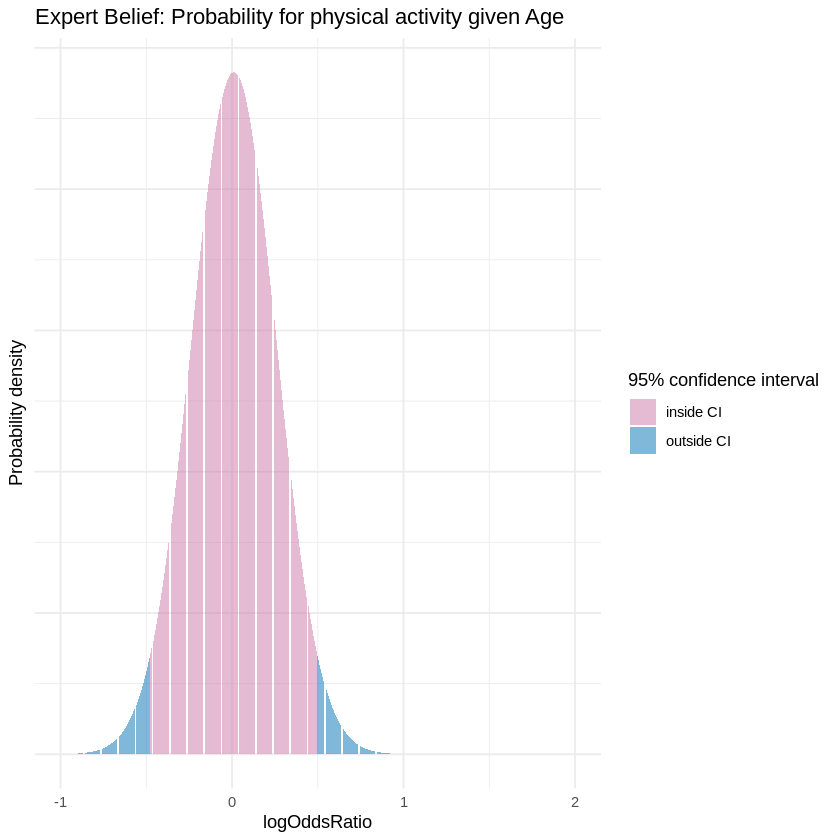

[1] "Age"


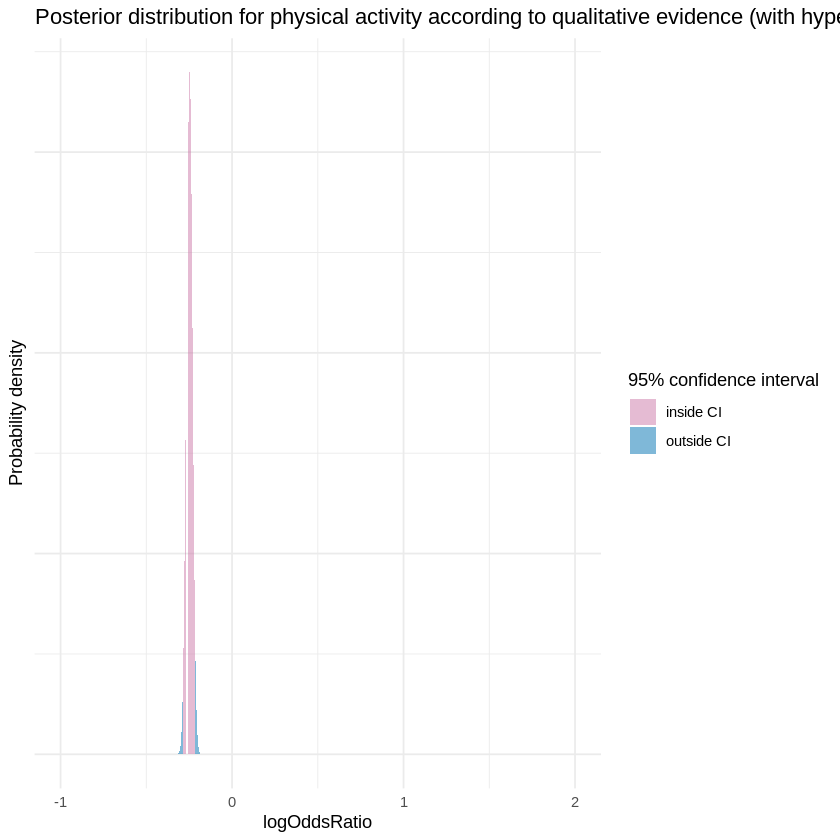

[1] "Age"


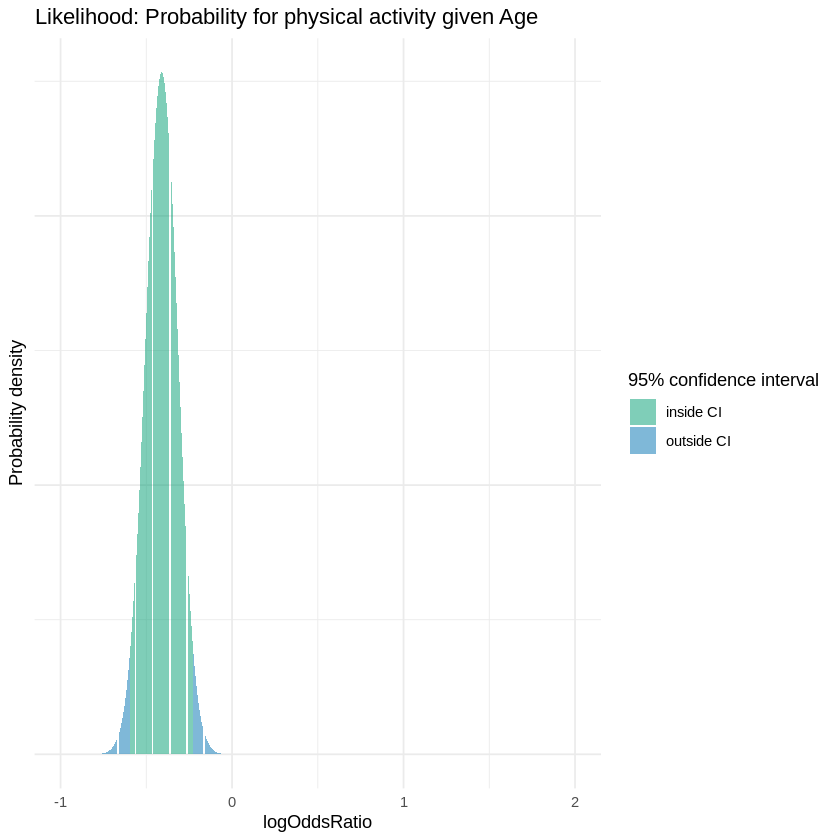

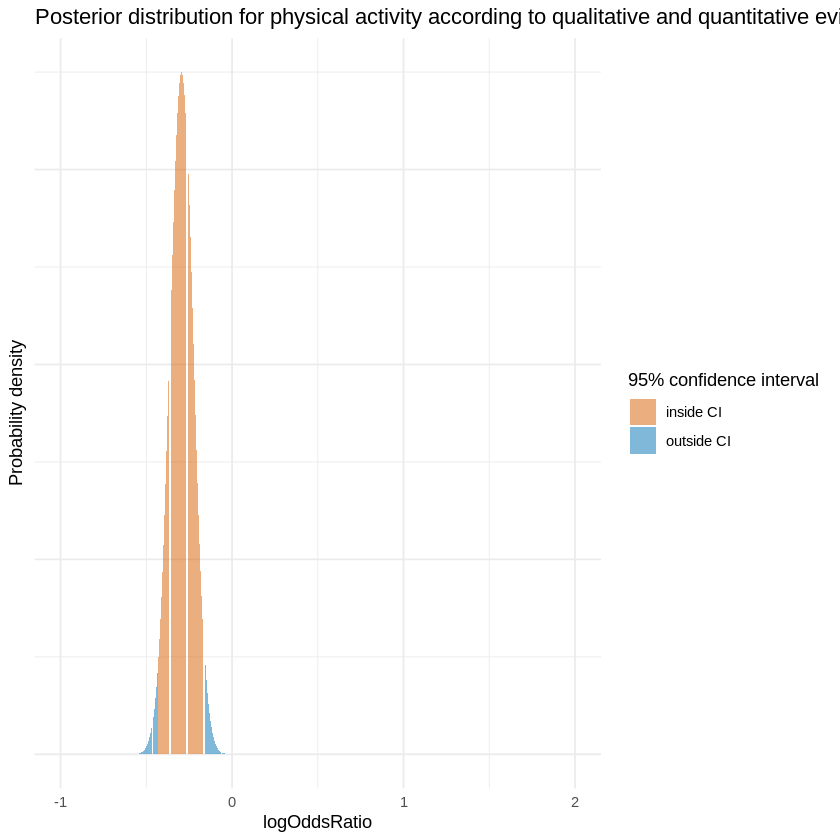

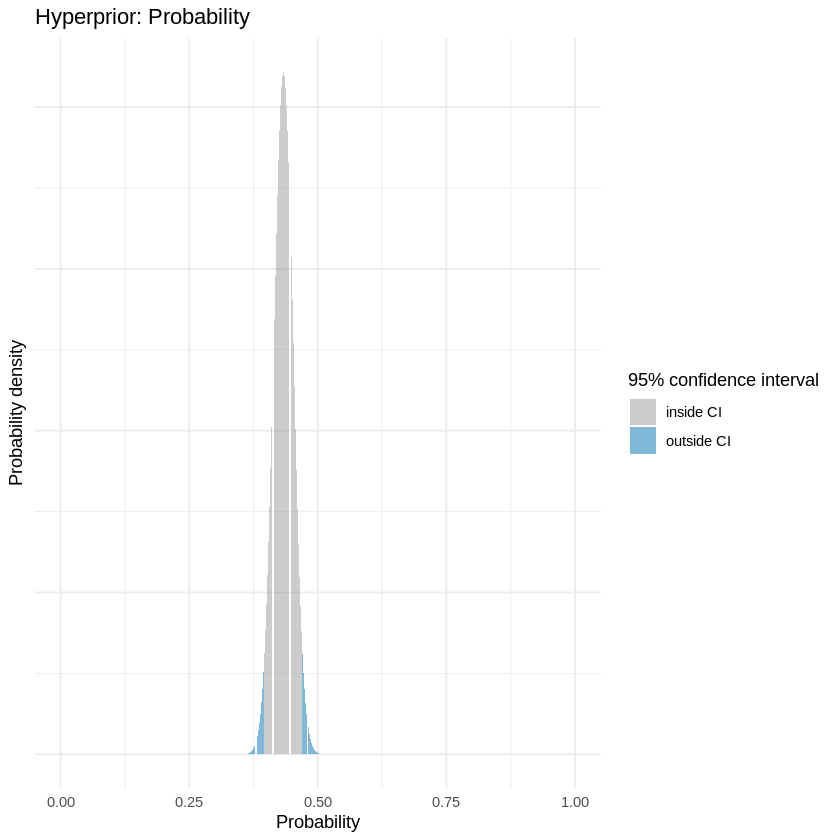

[1] "6MWT"


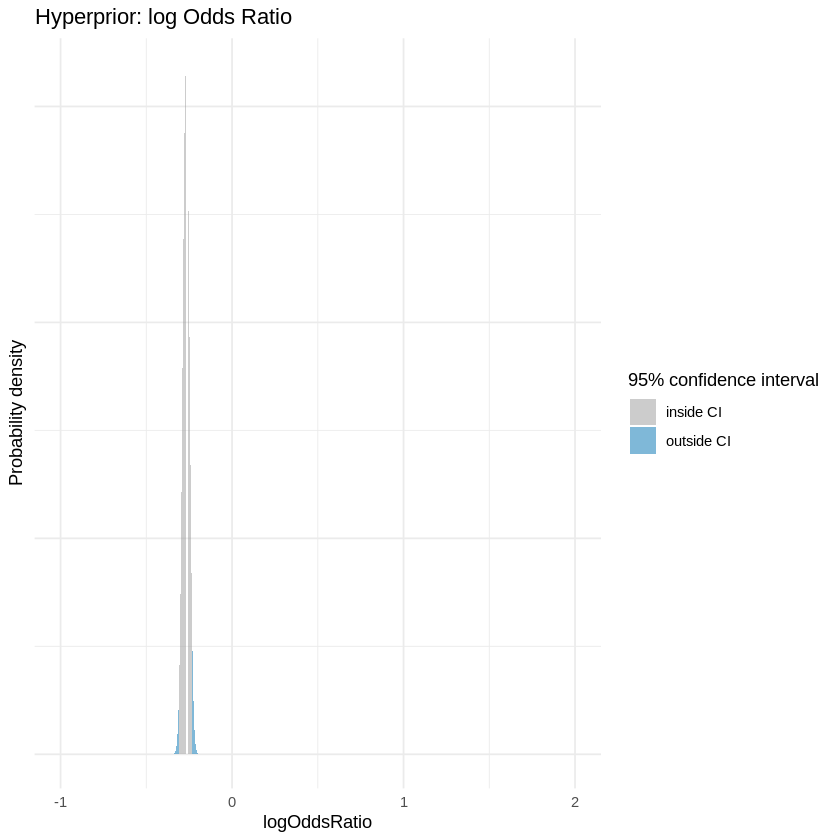

[1] "6MWT"


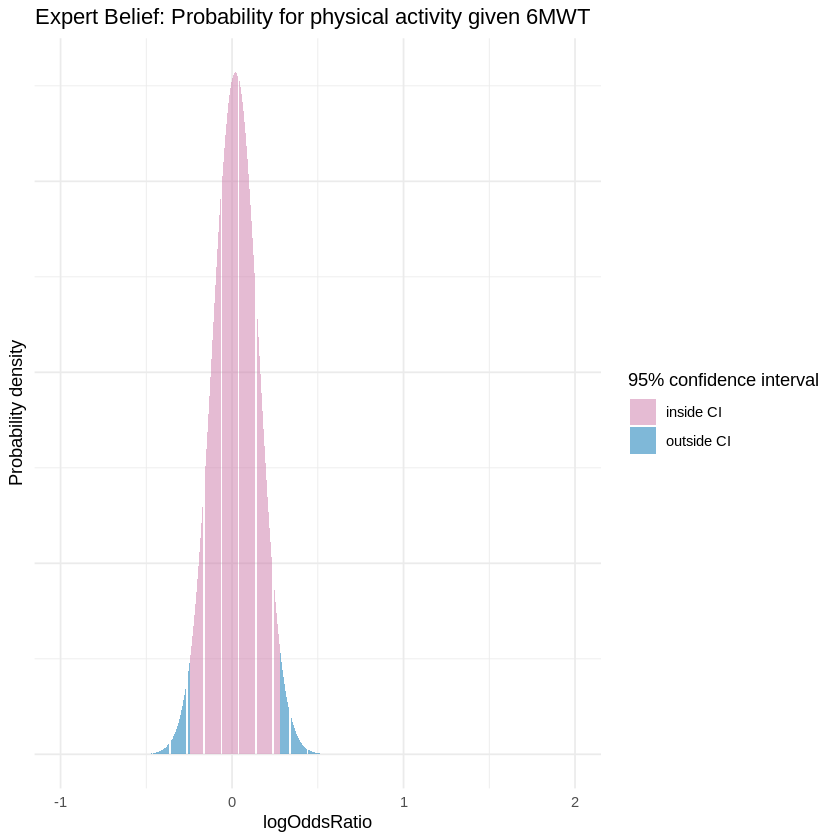

[1] "6MWT"


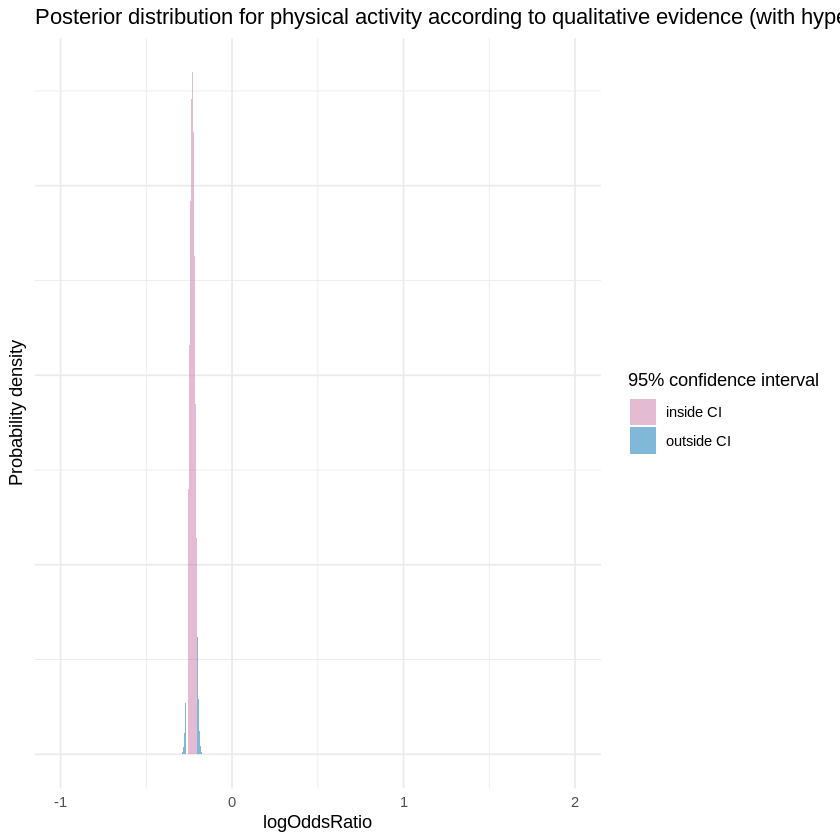

[1] "6MWT"


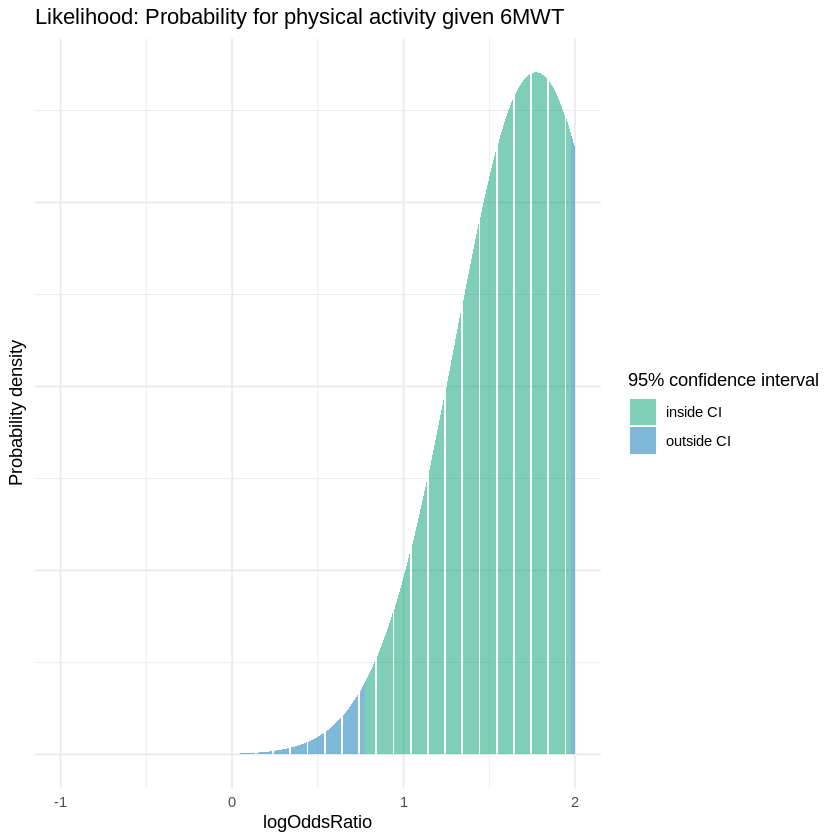

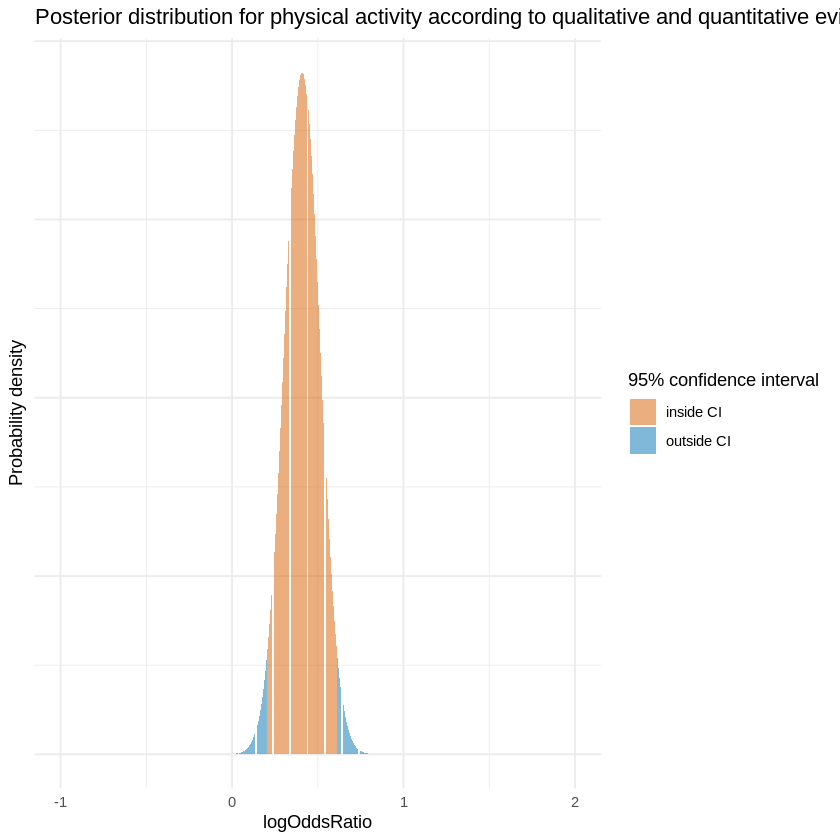

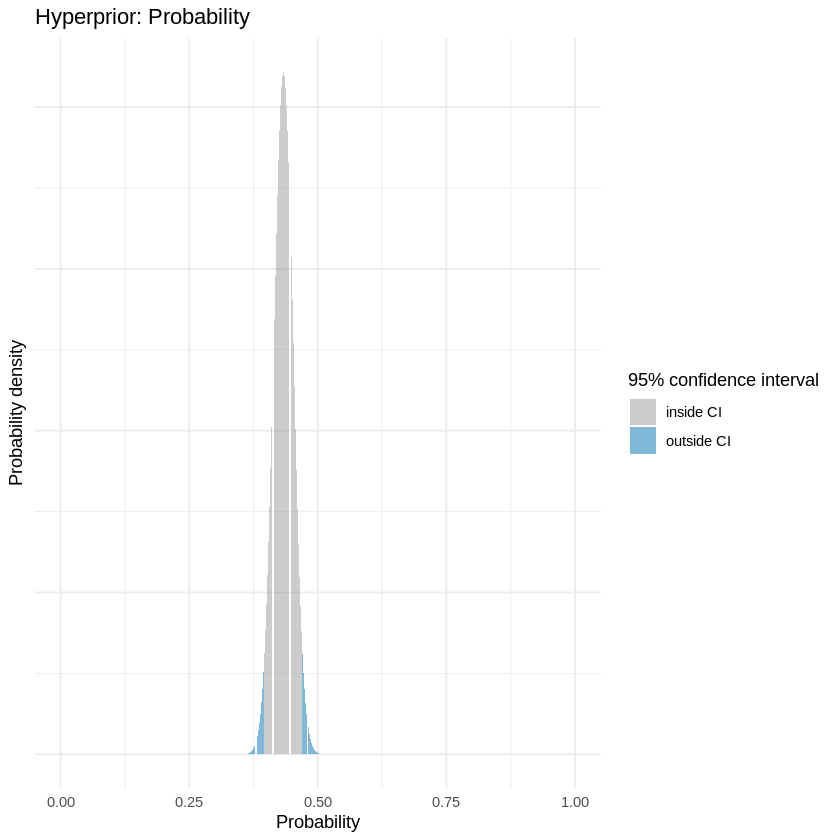

[1] "Symptoms"


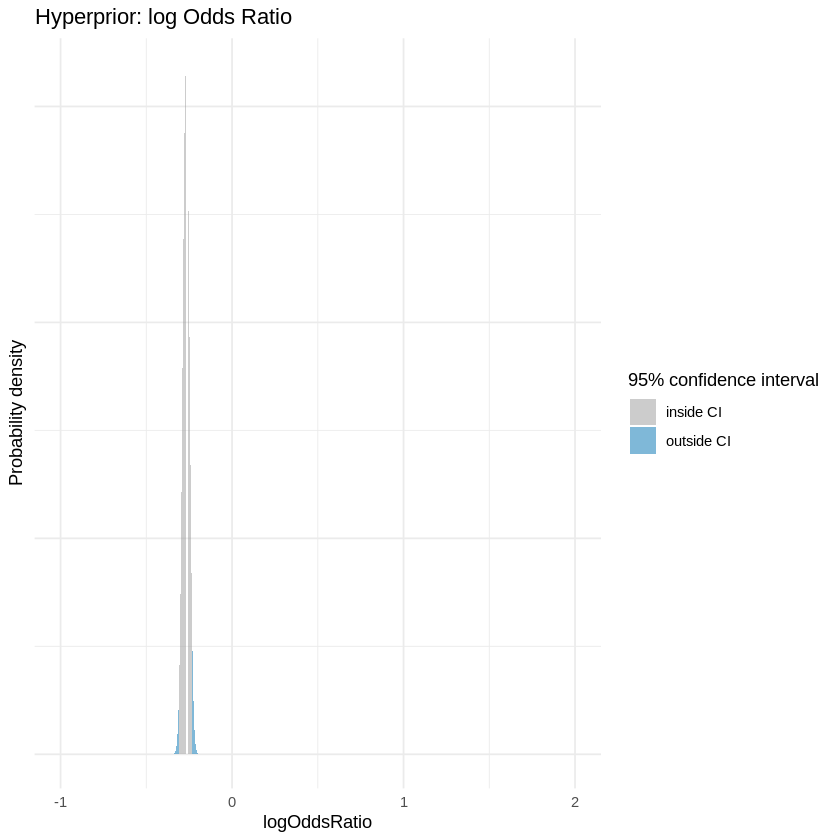

[1] "Symptoms"


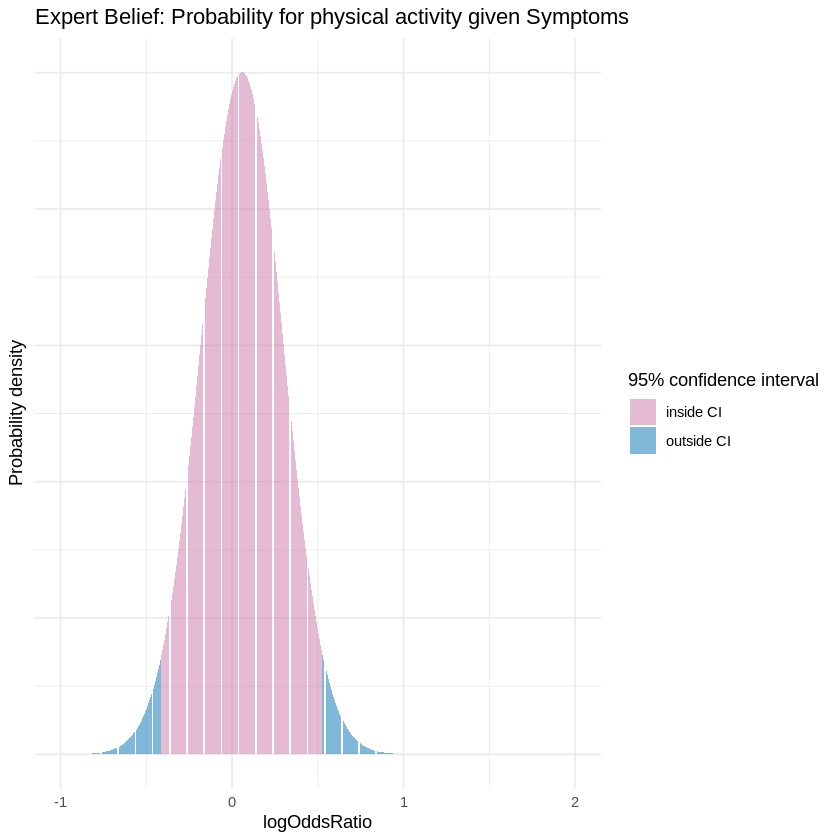

[1] "Symptoms"


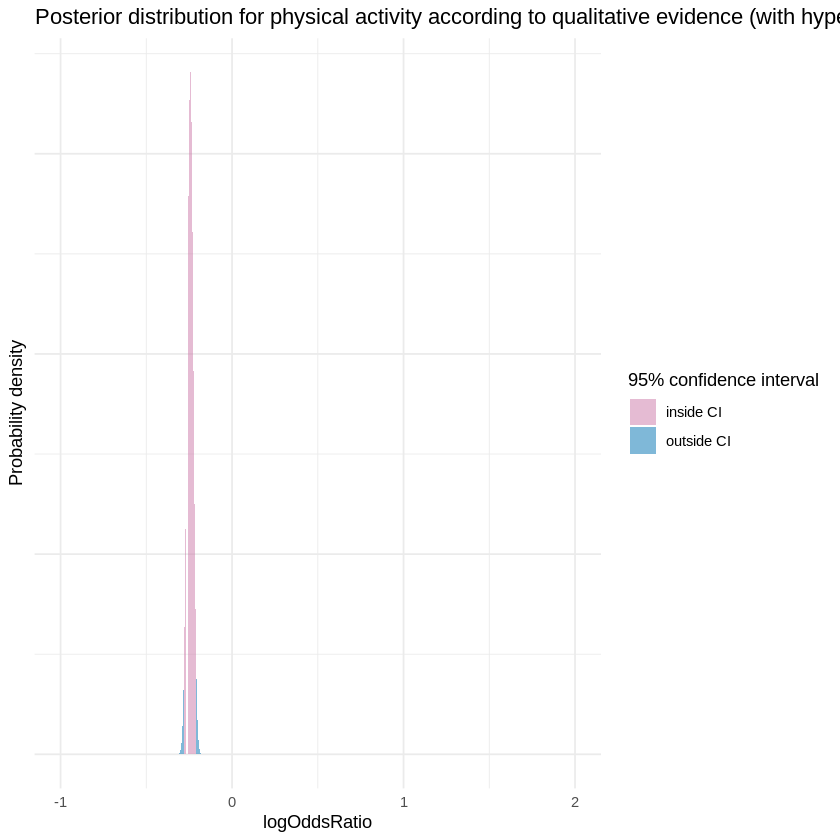

[1] "Symptoms"


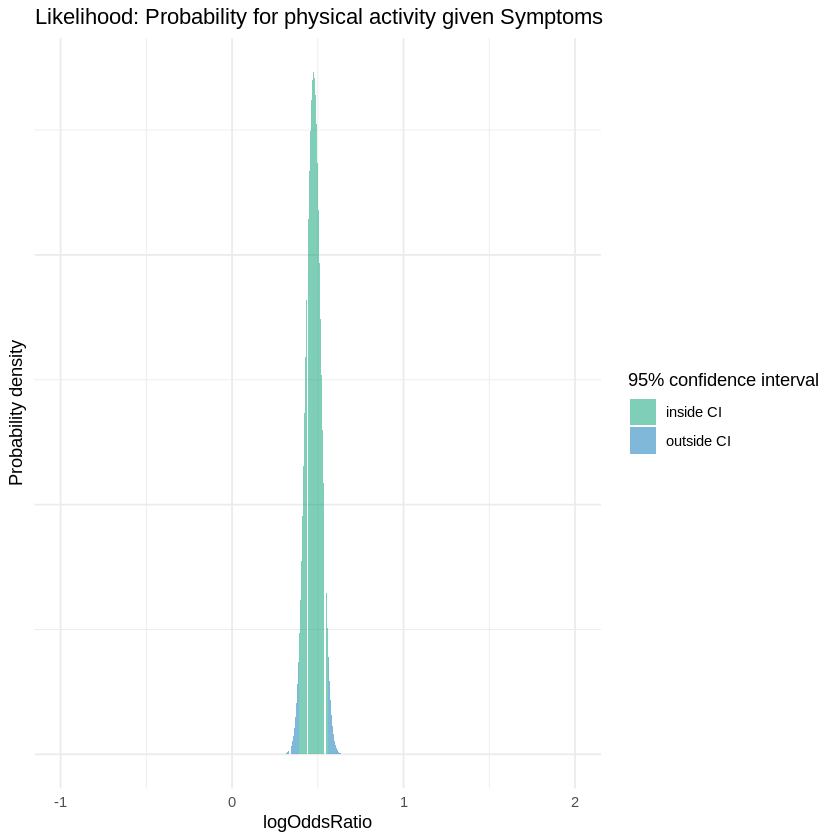

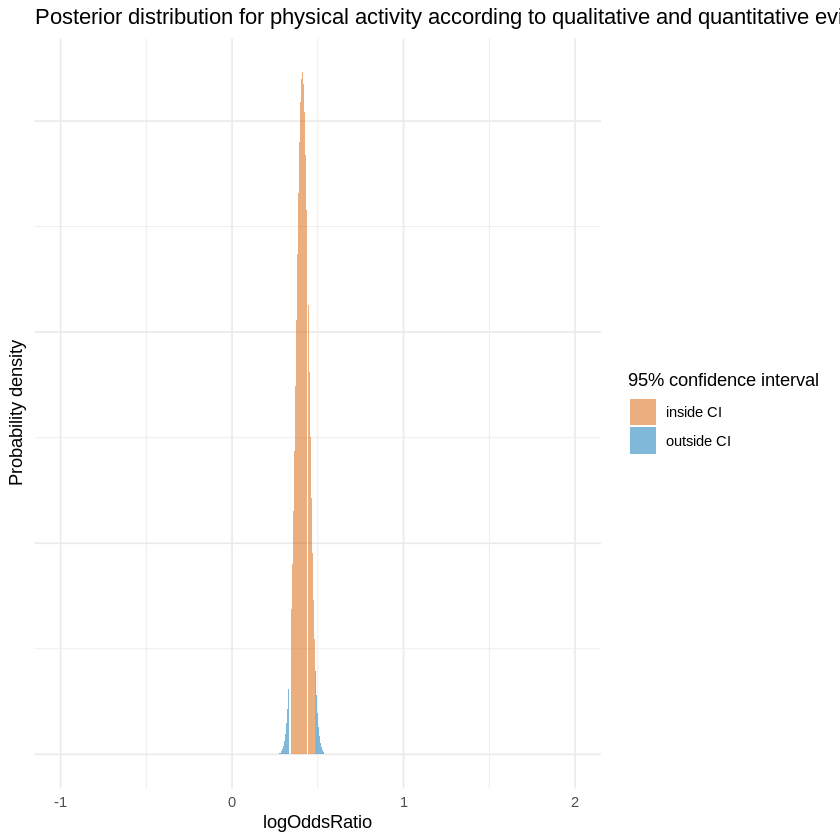

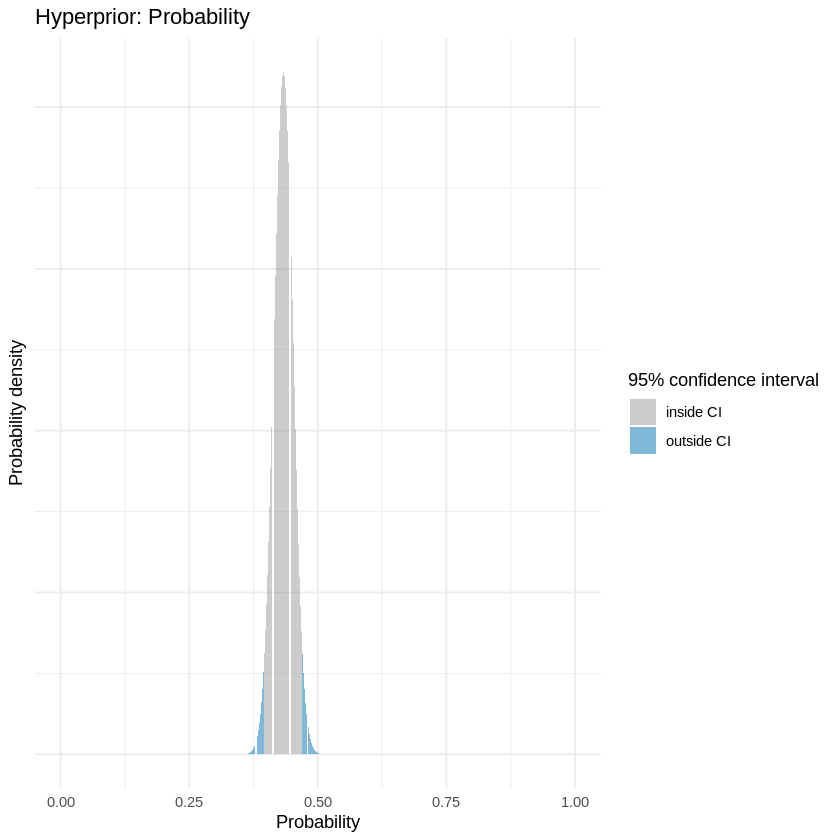

[1] "LVEF"


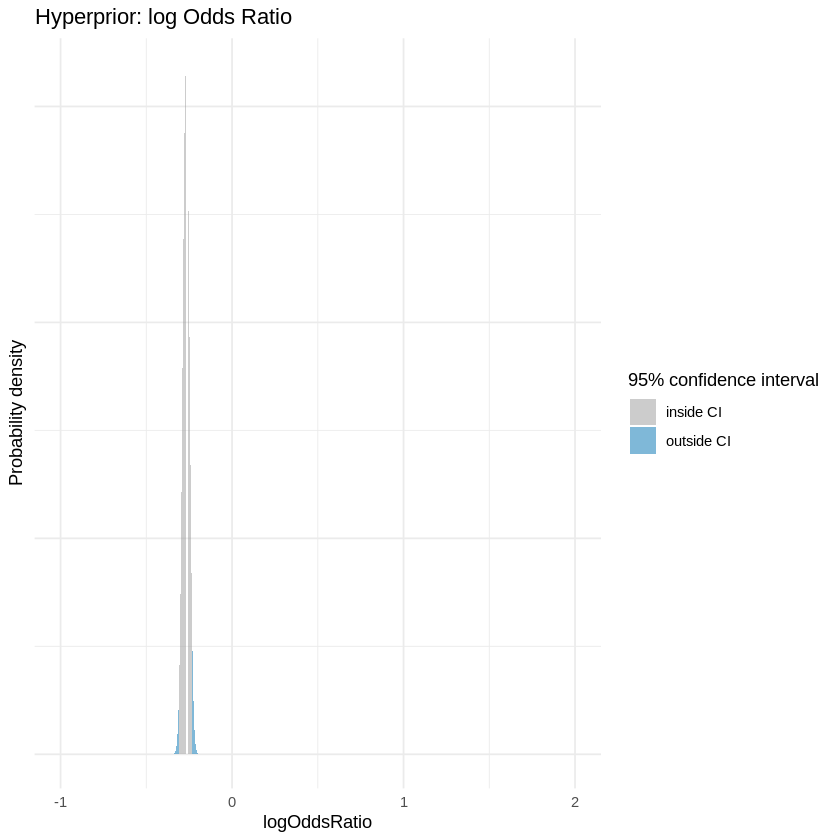

[1] "LVEF"


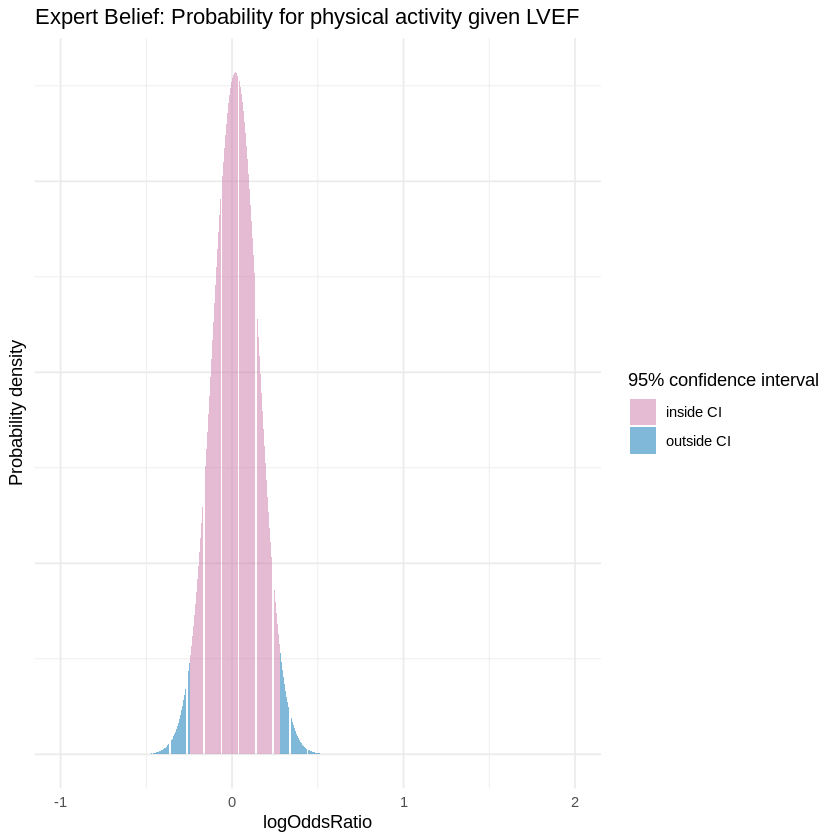

[1] "LVEF"


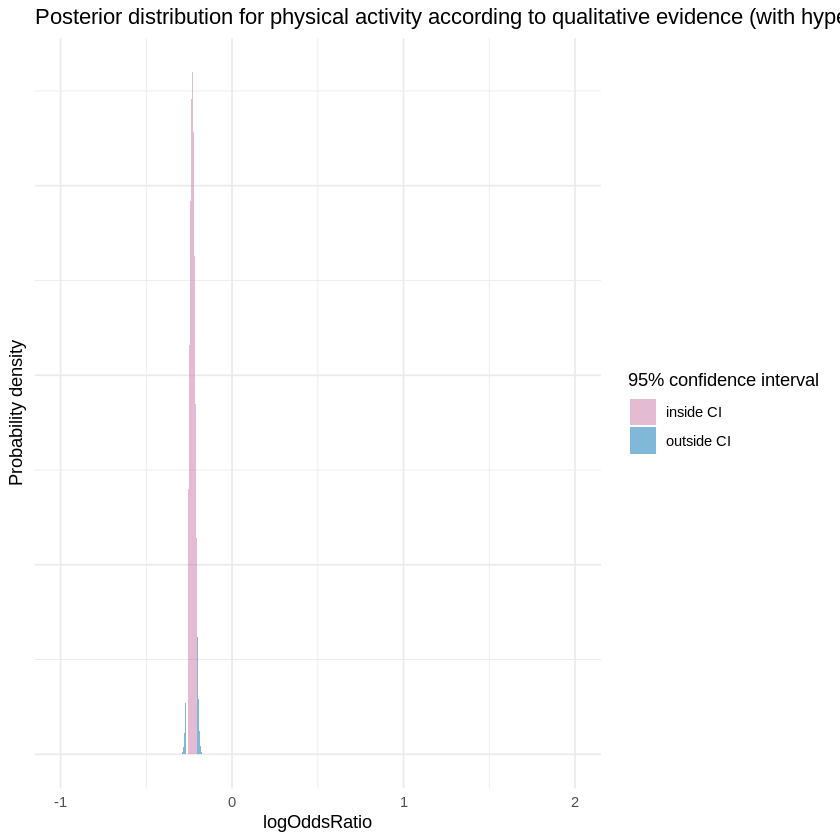

[1] "LVEF"


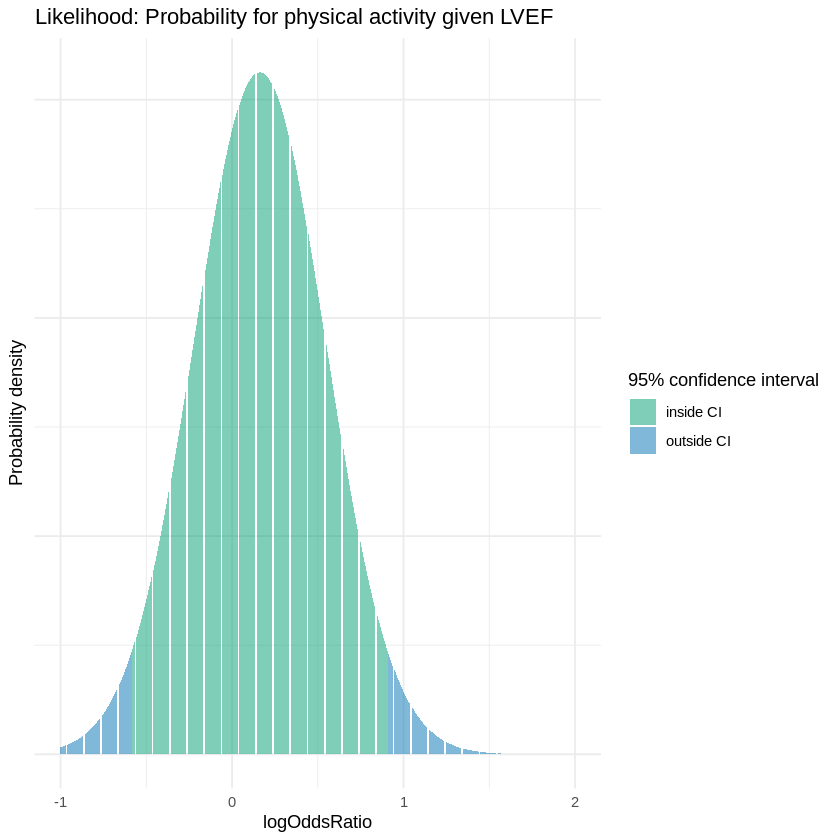

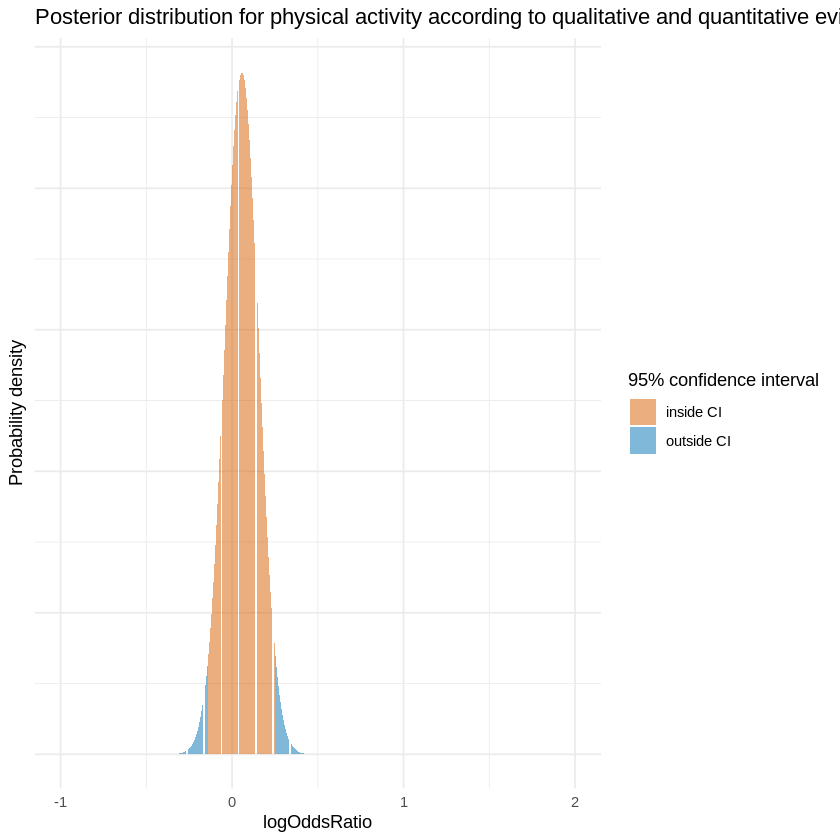

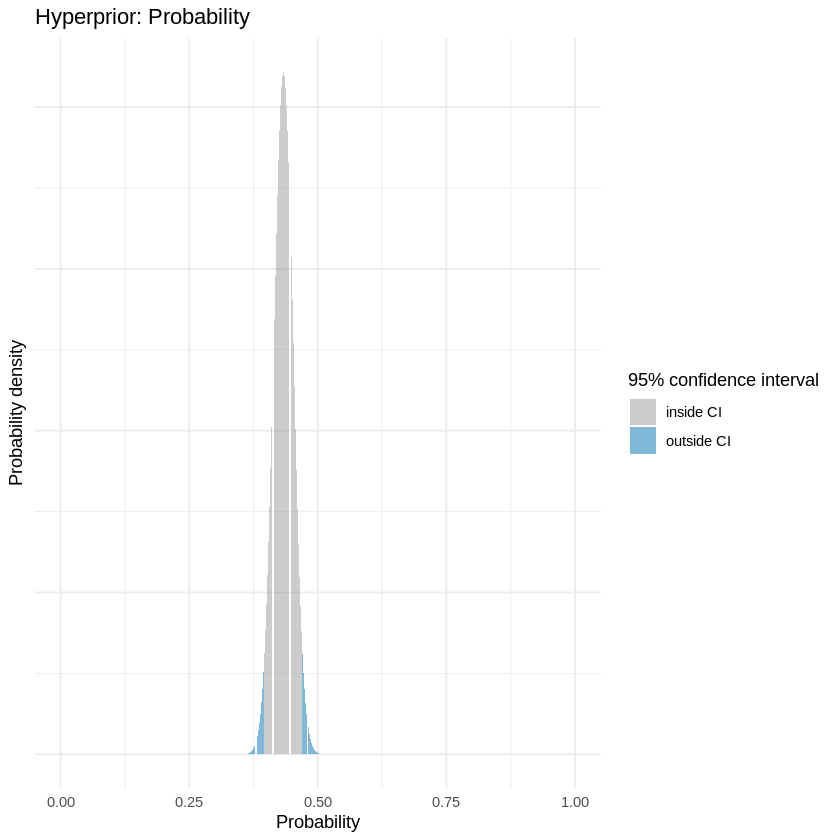

[1] "SelfEfficacy"


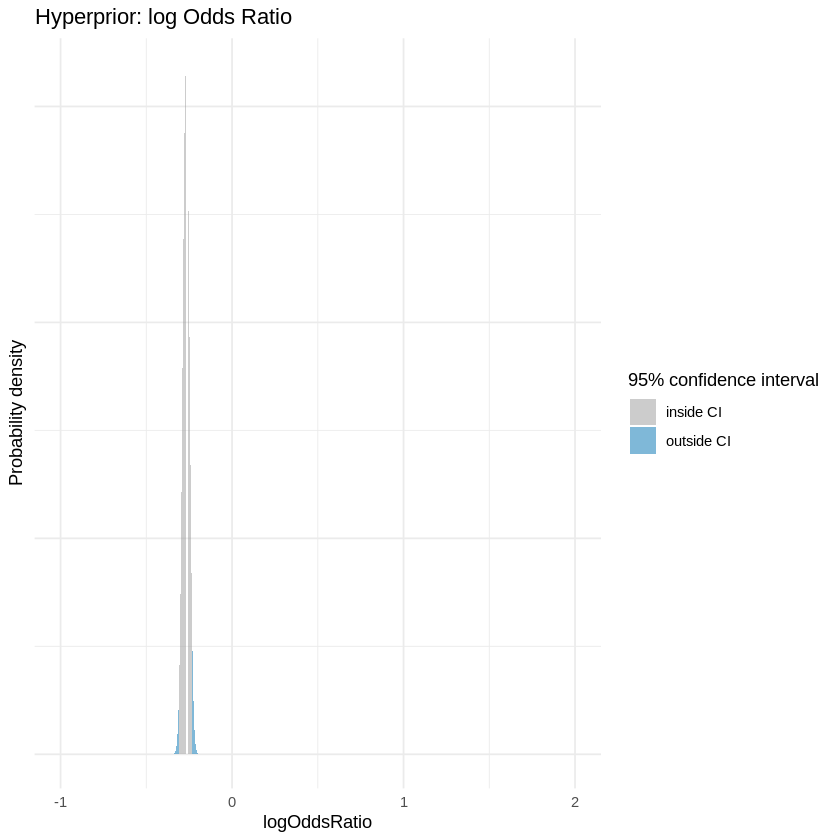

[1] "SelfEfficacy"


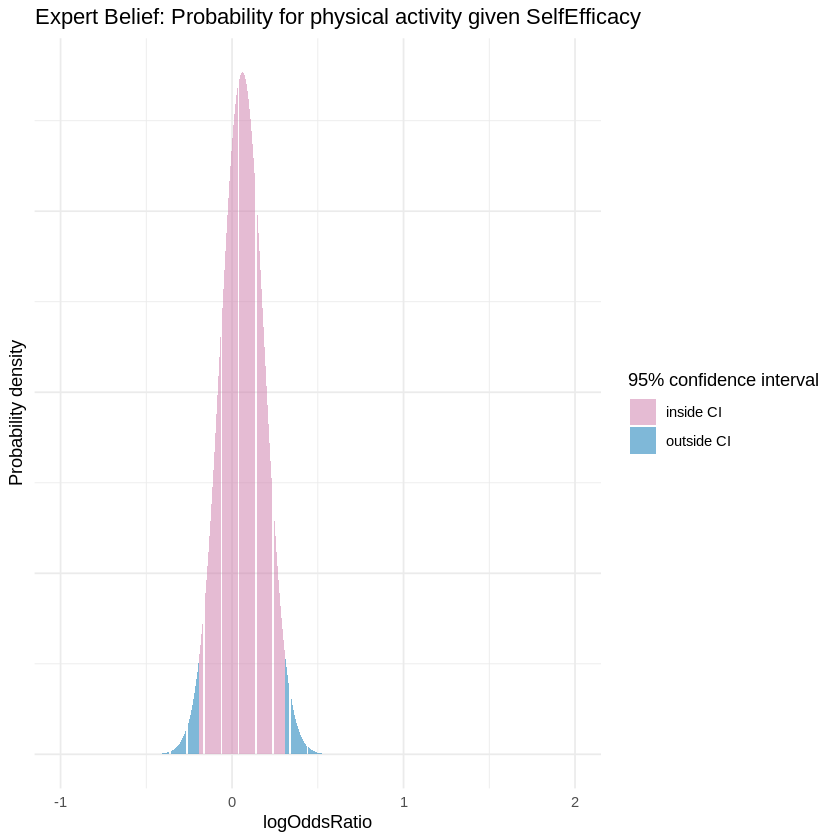

[1] "SelfEfficacy"


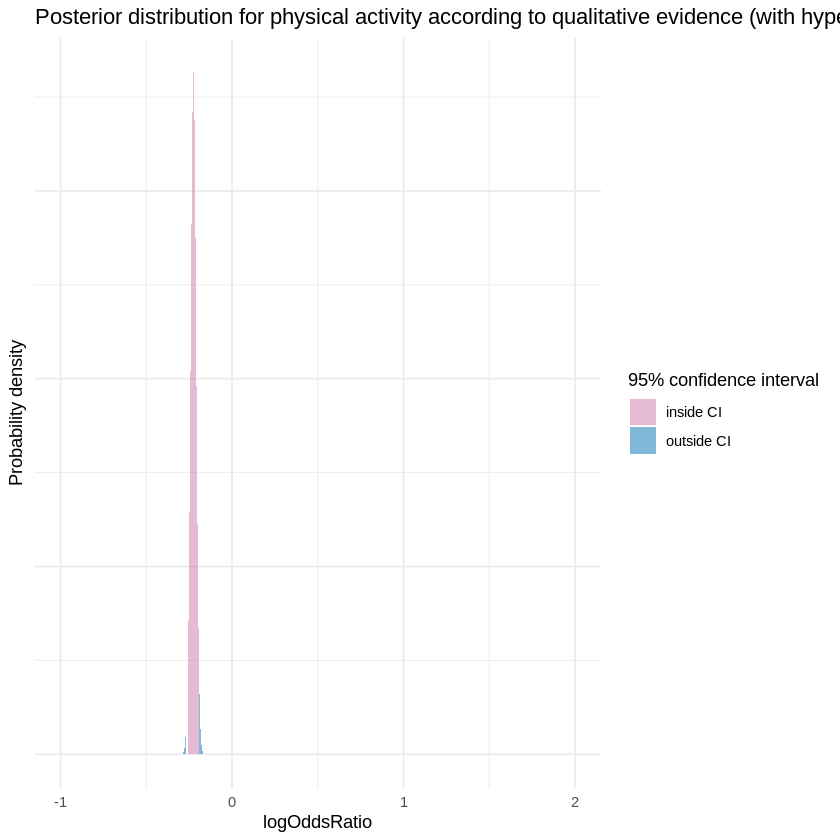

[1] "SelfEfficacy"


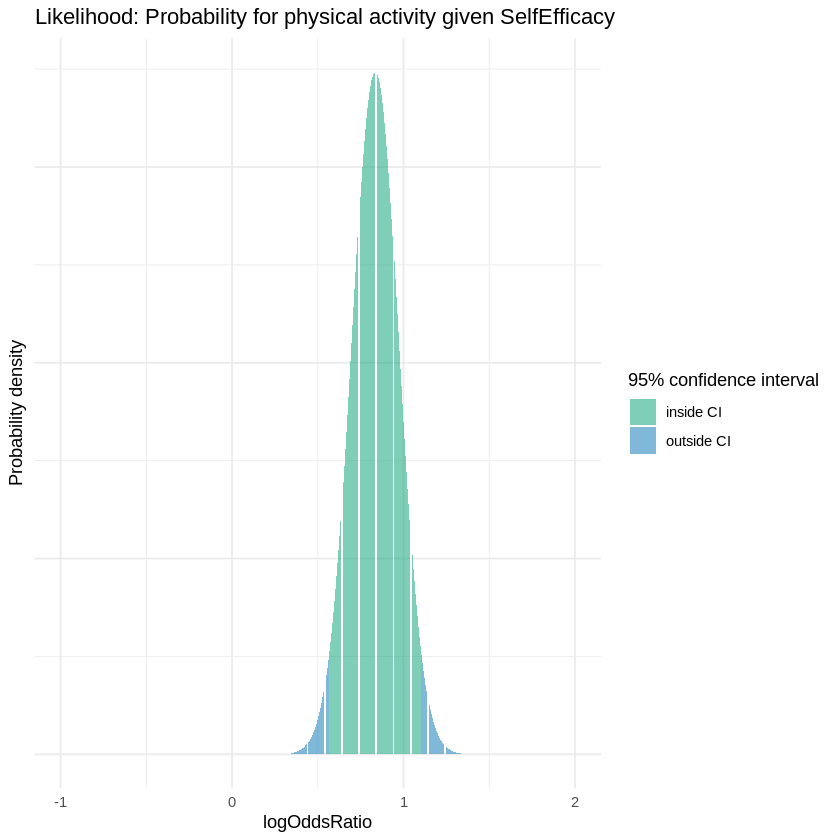

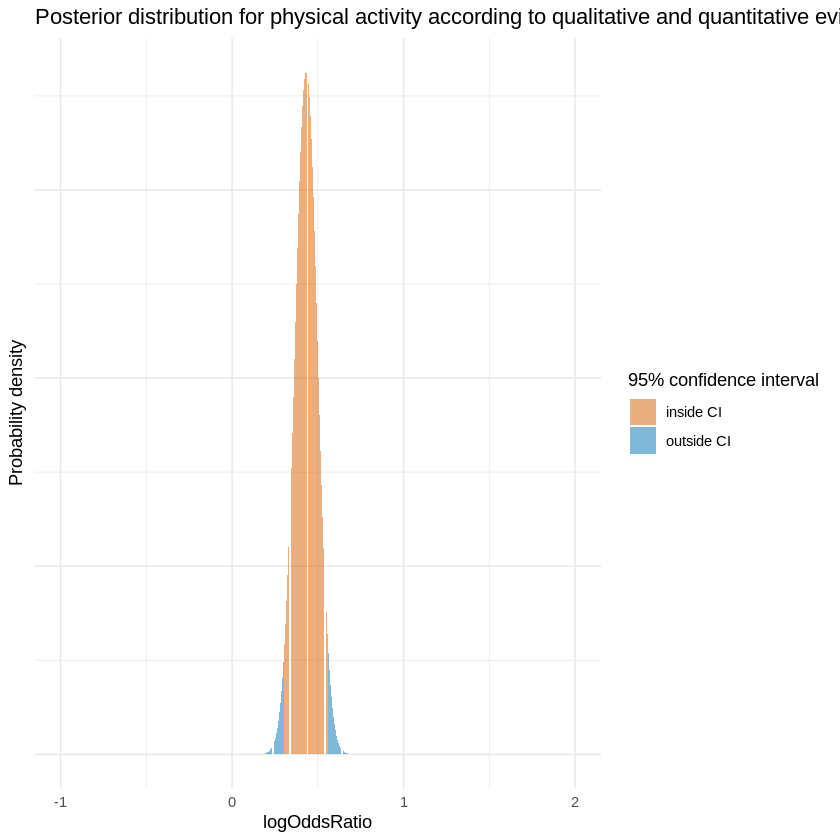

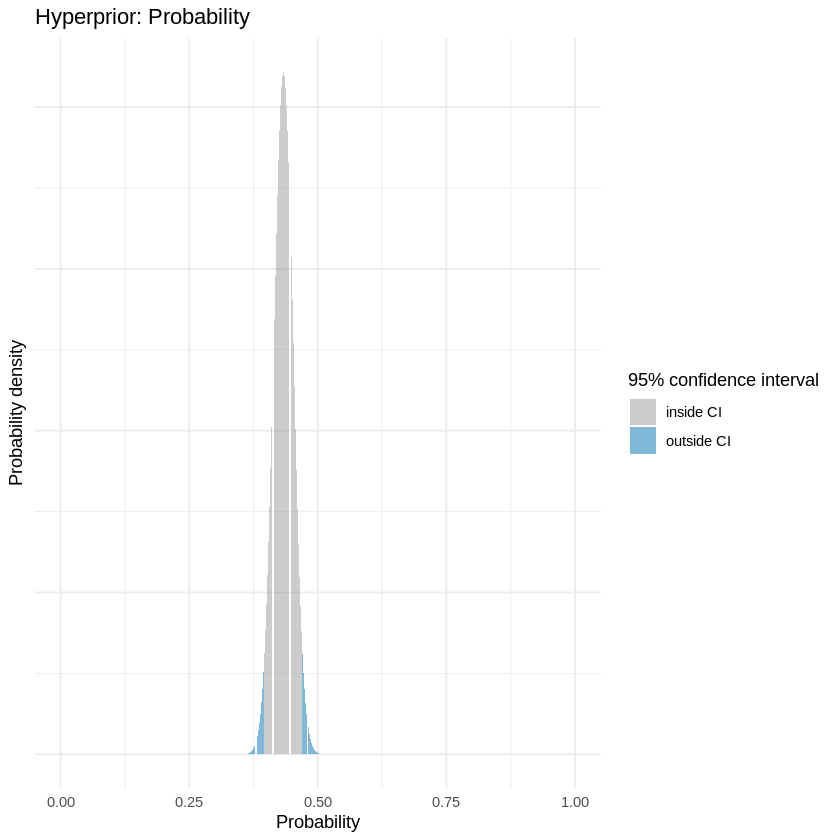

[1] "SocialSupport"


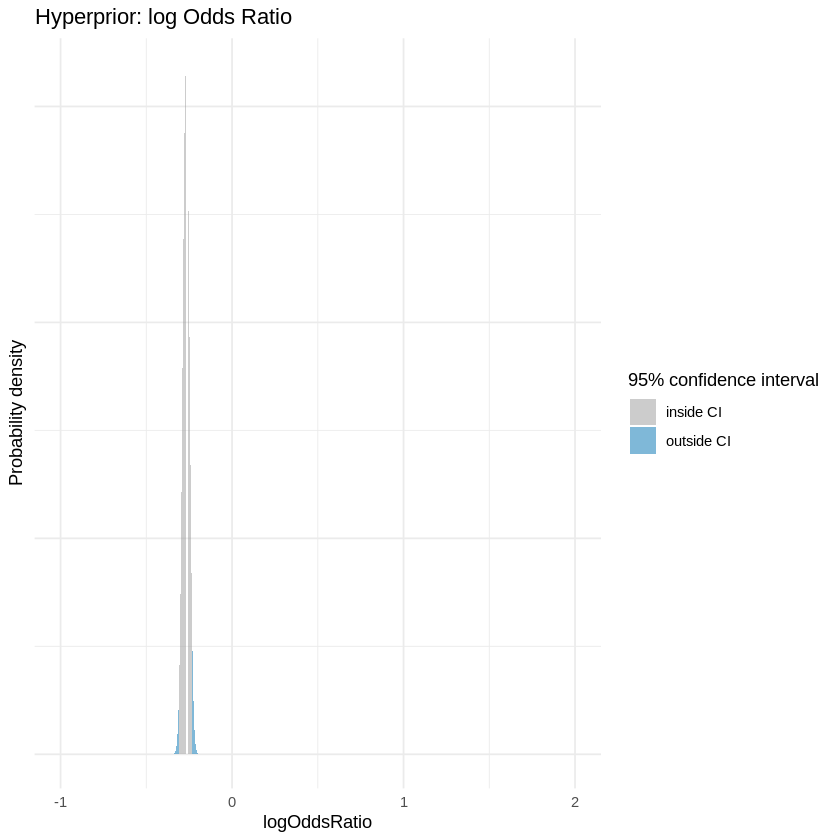

[1] "SocialSupport"


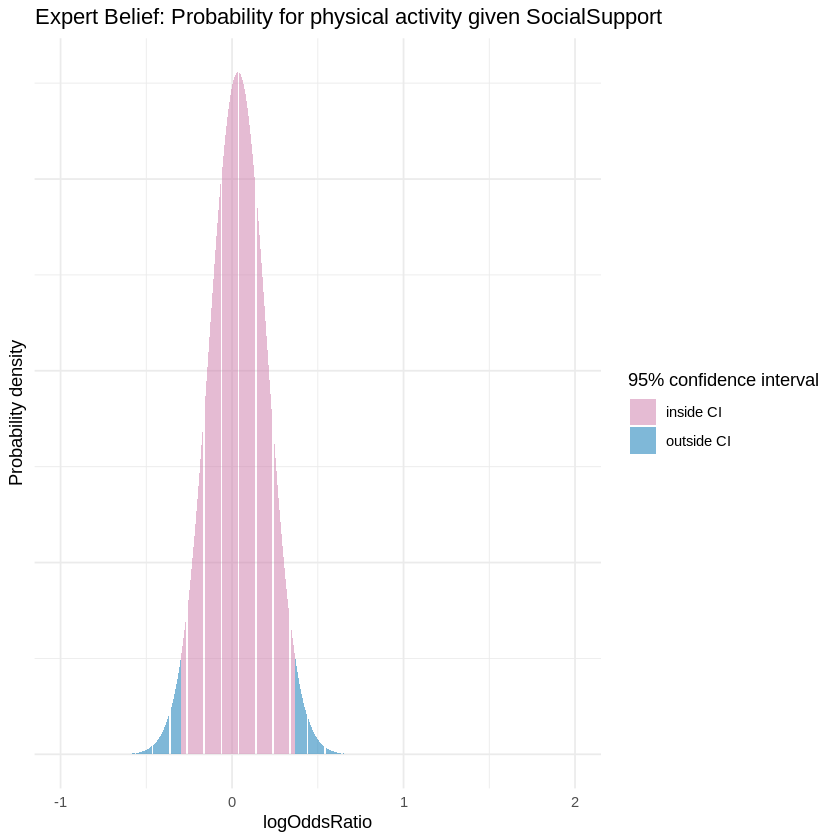

[1] "SocialSupport"


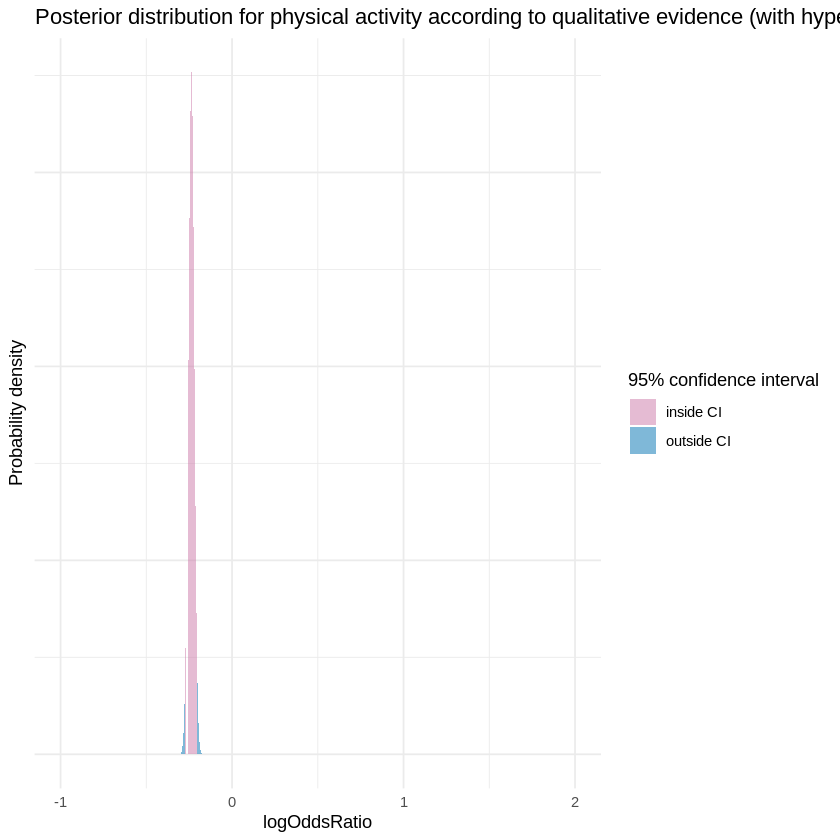

[1] "SocialSupport"


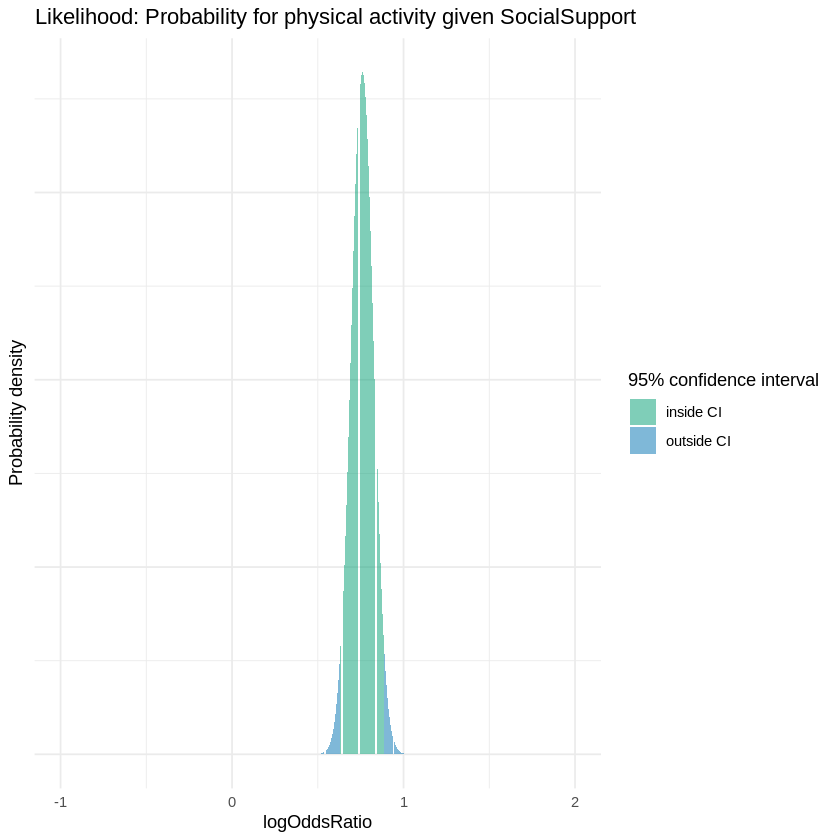

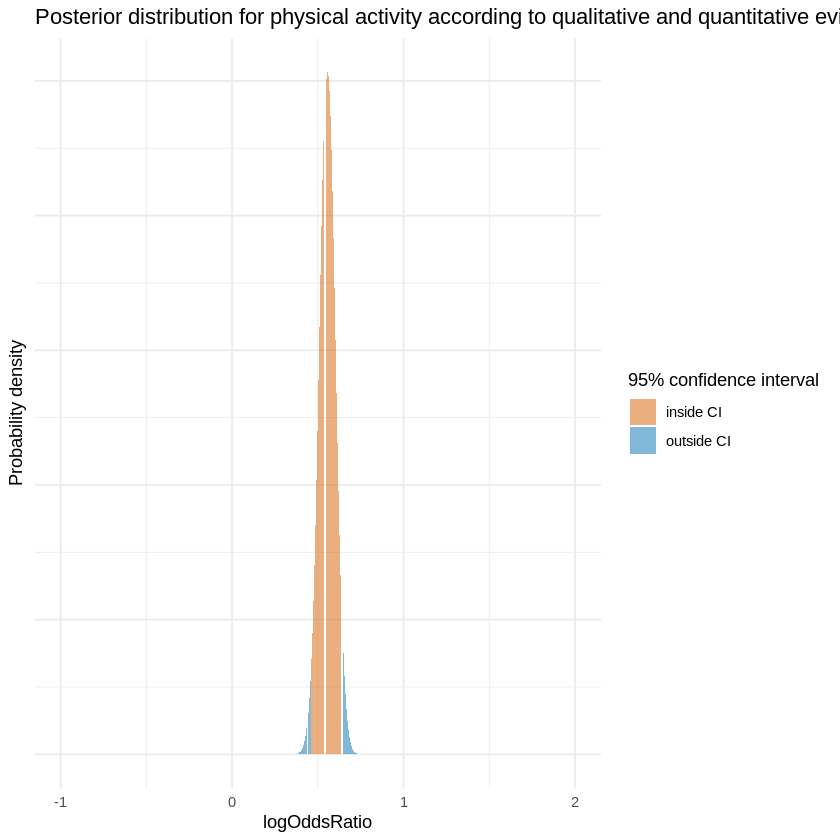

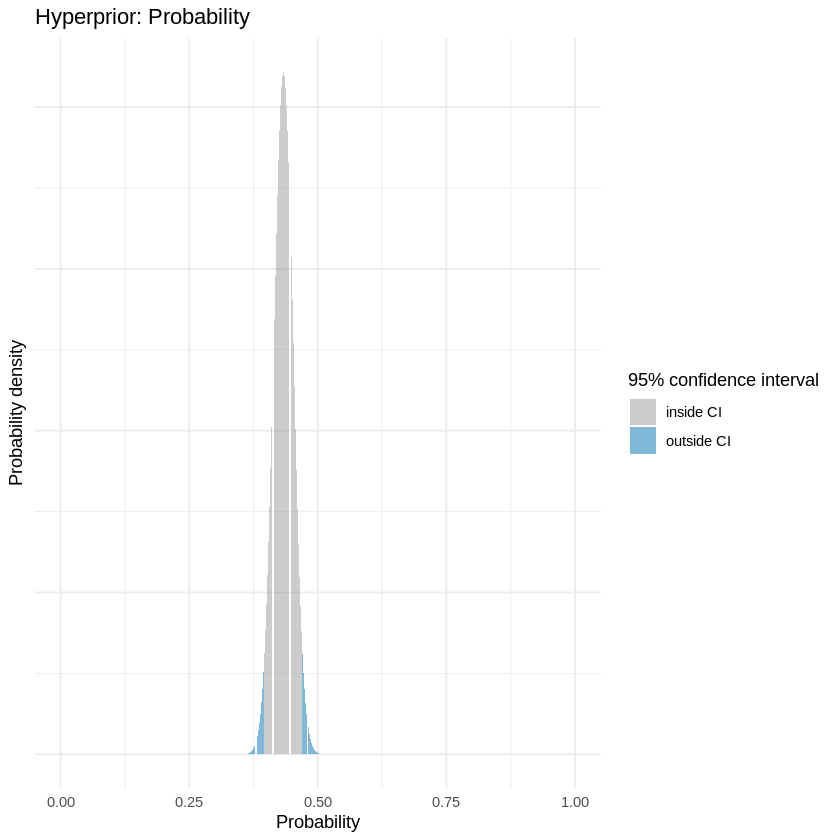

[1] "Comorbidity"


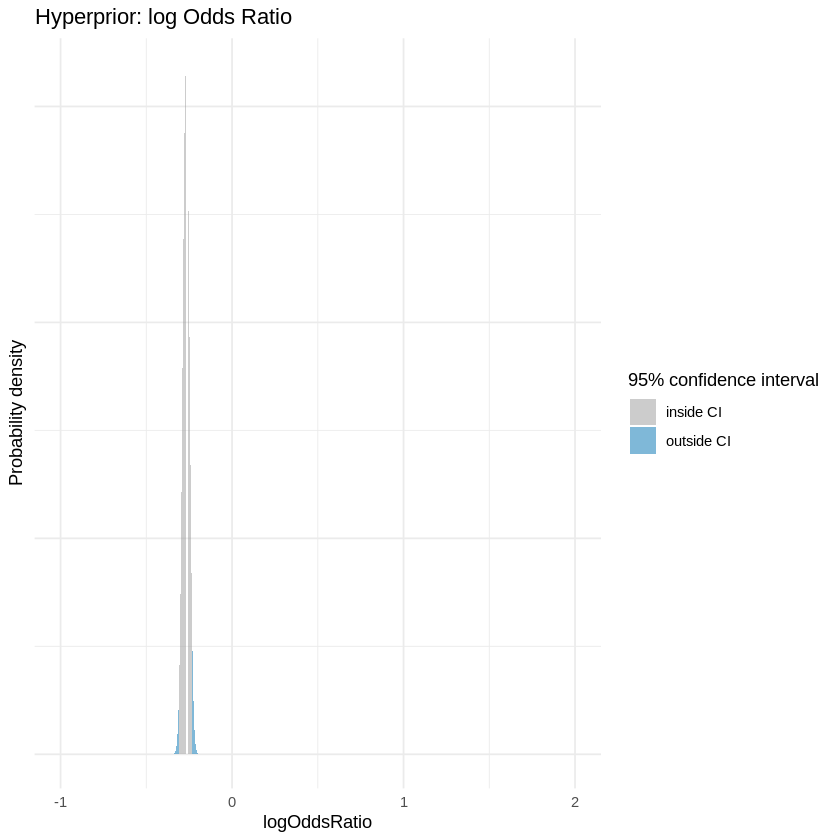

[1] "Comorbidity"


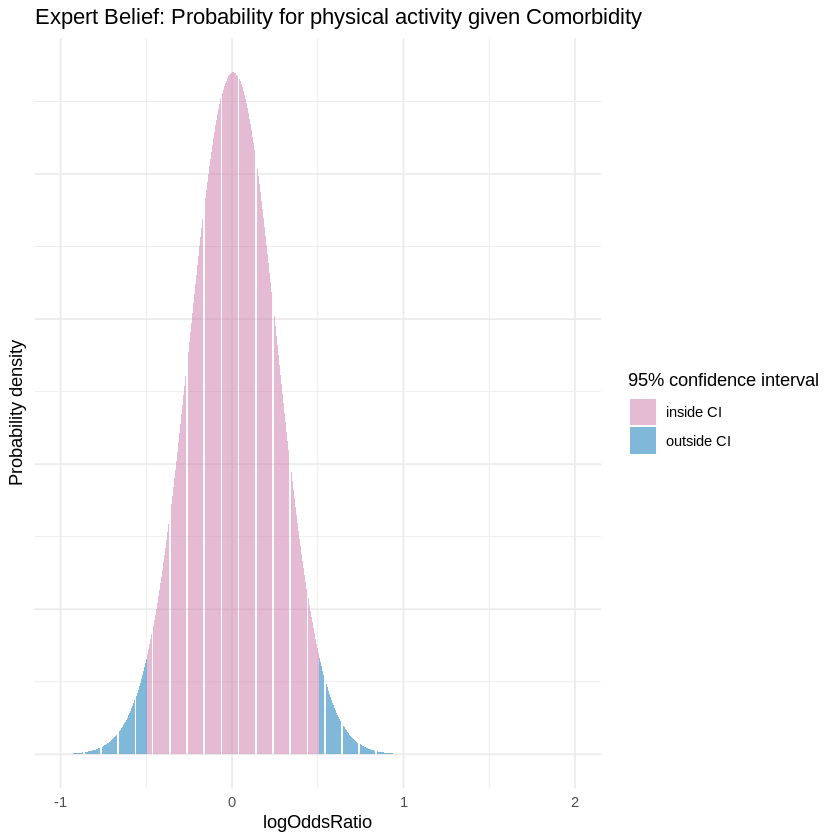

[1] "Comorbidity"


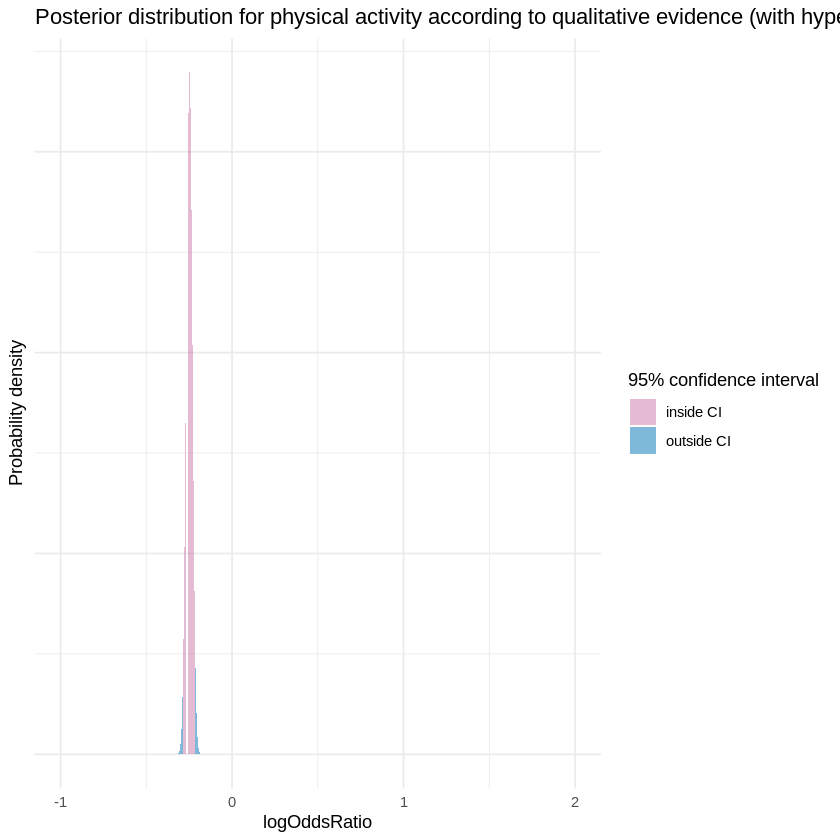

[1] "Comorbidity"


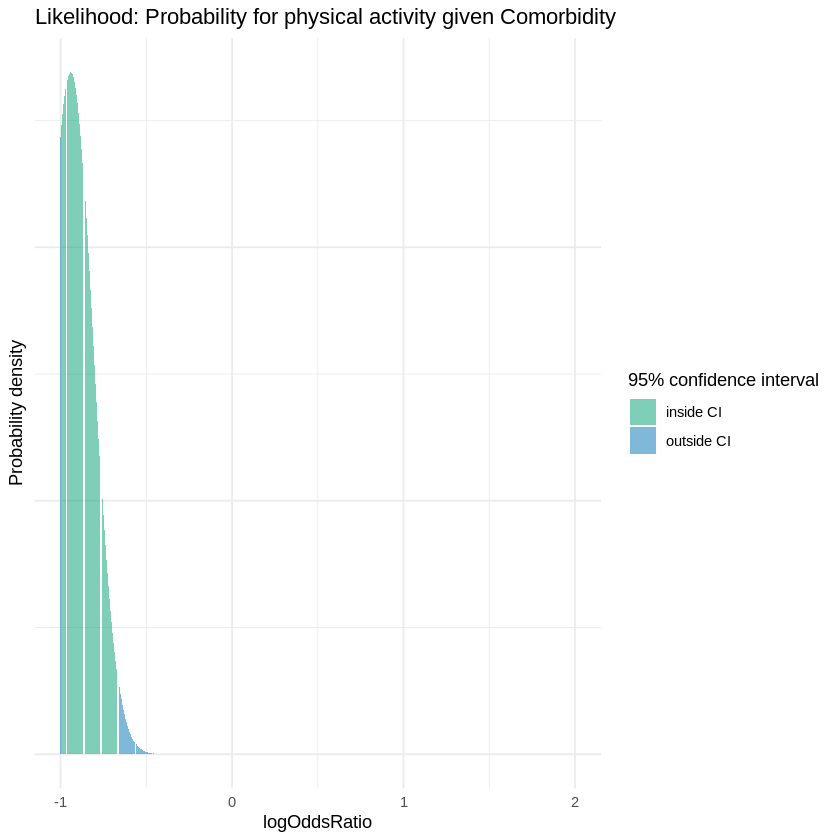

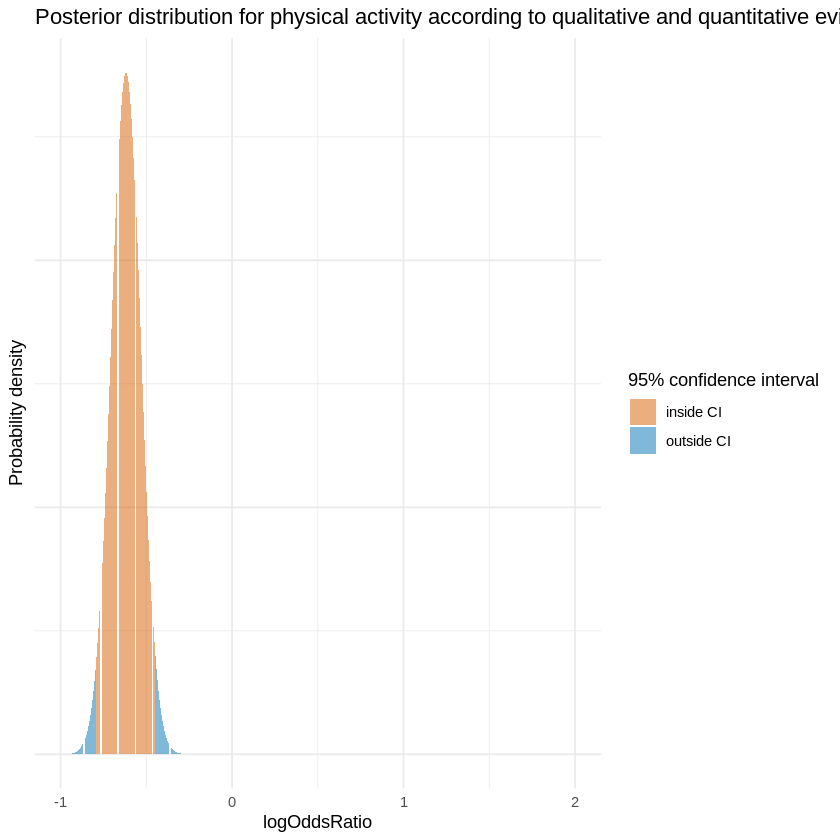

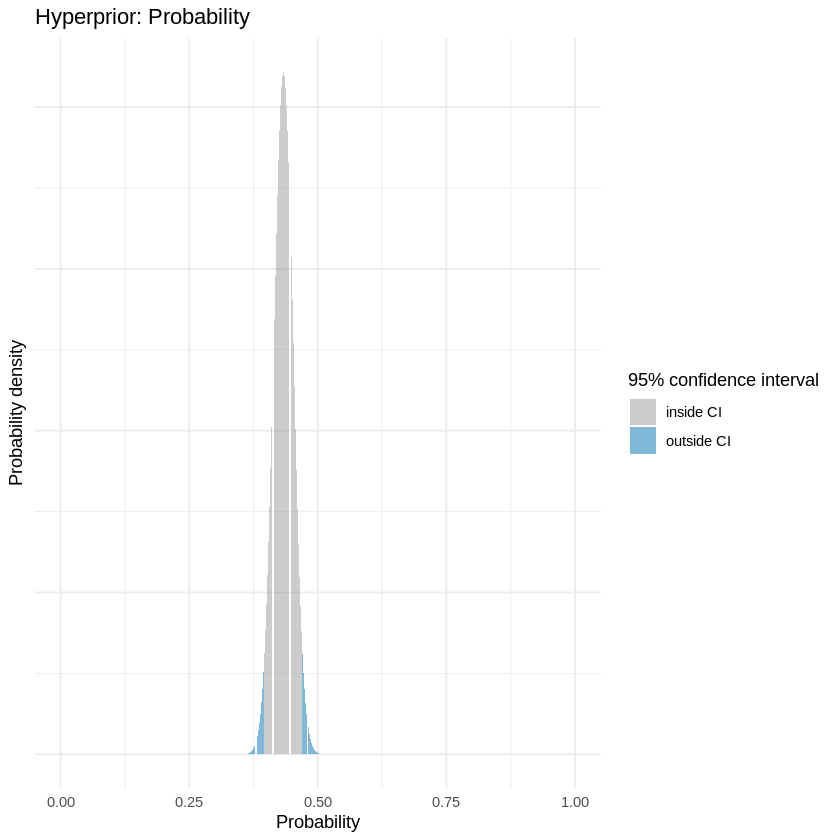

[1] "NegativeAttitude"


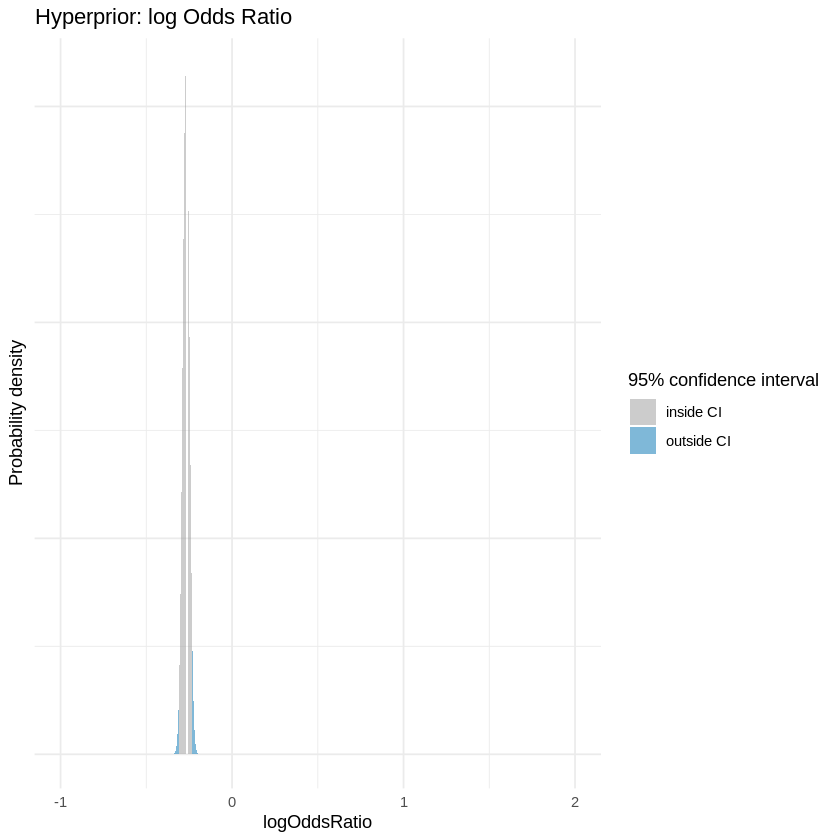

[1] "NegativeAttitude"


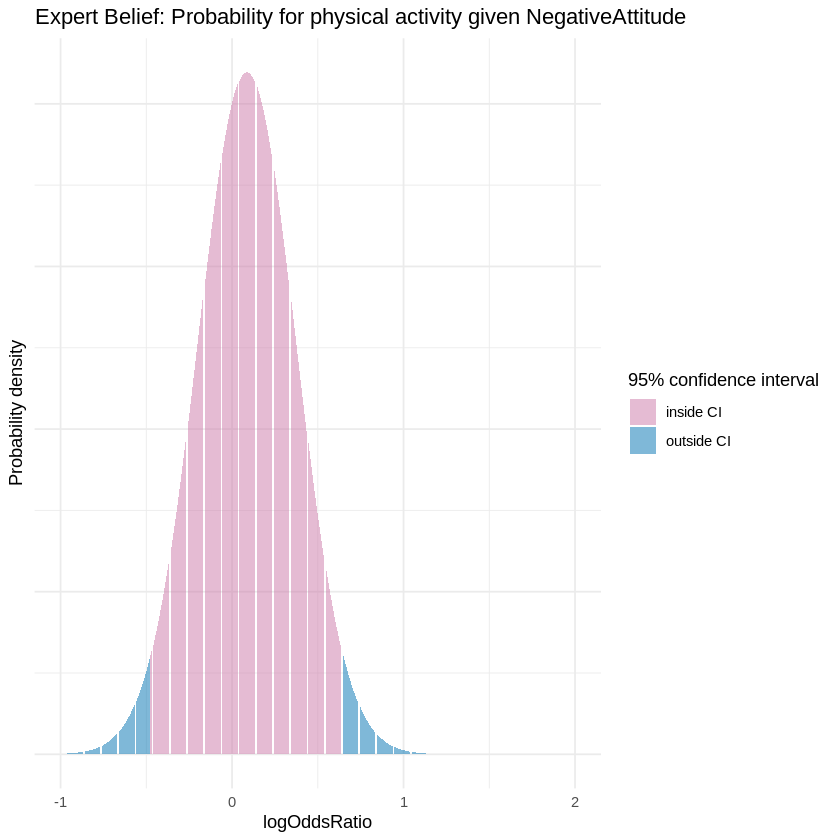

[1] "NegativeAttitude"


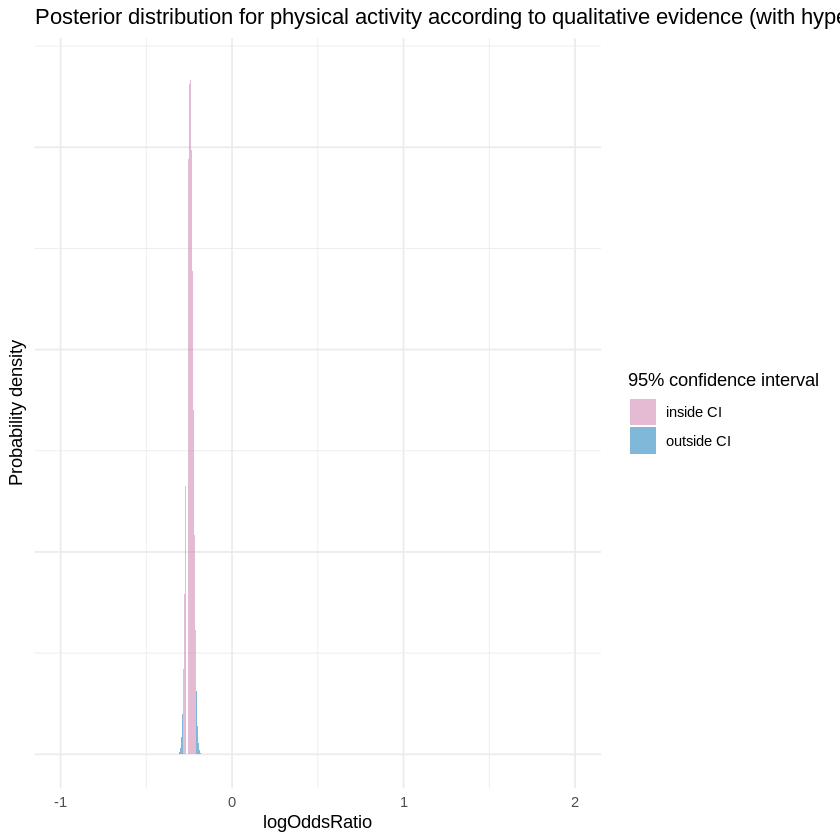

[1] "NegativeAttitude"


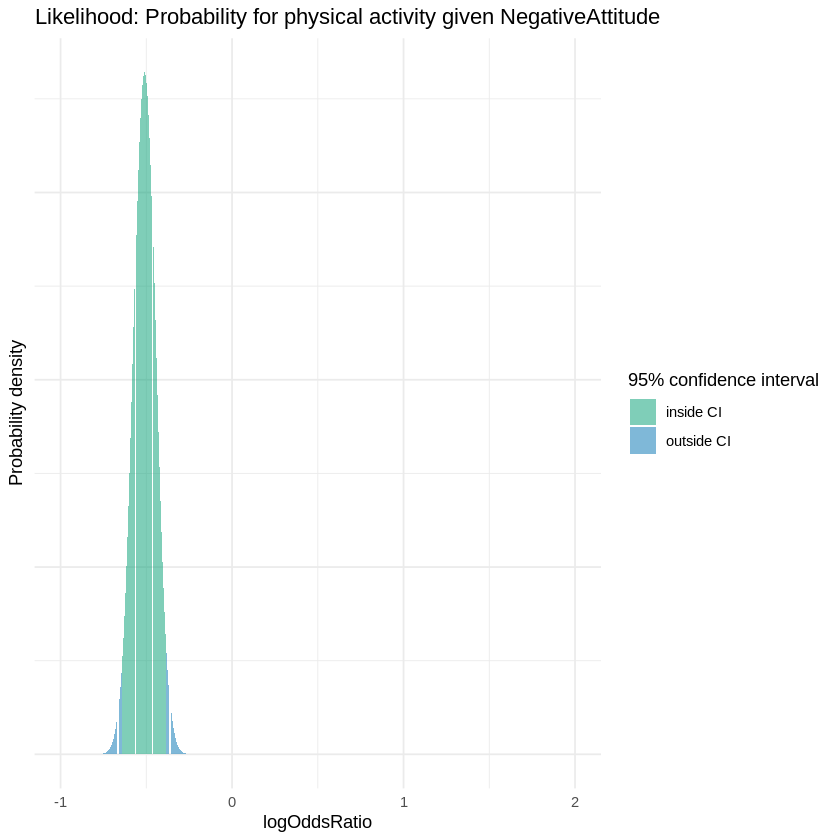

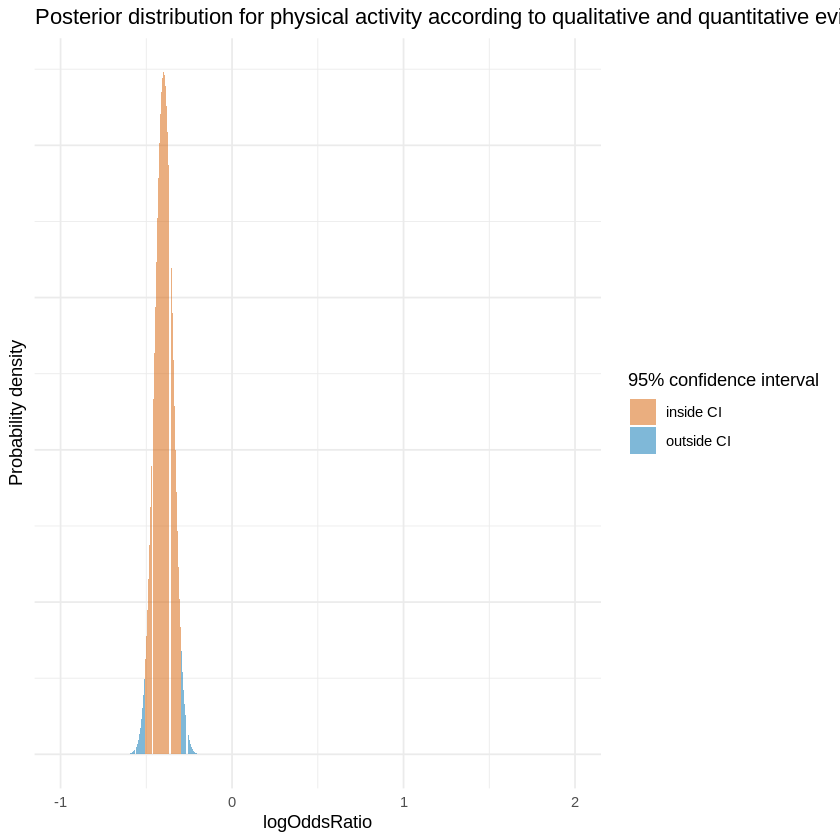

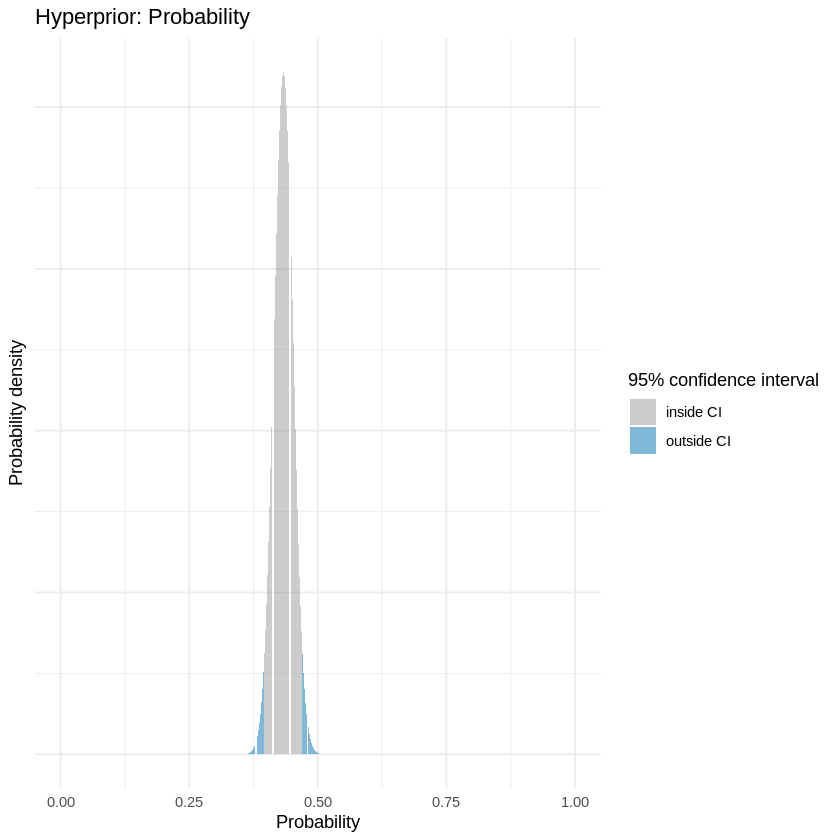

[1] "PhysicalFunctioning"


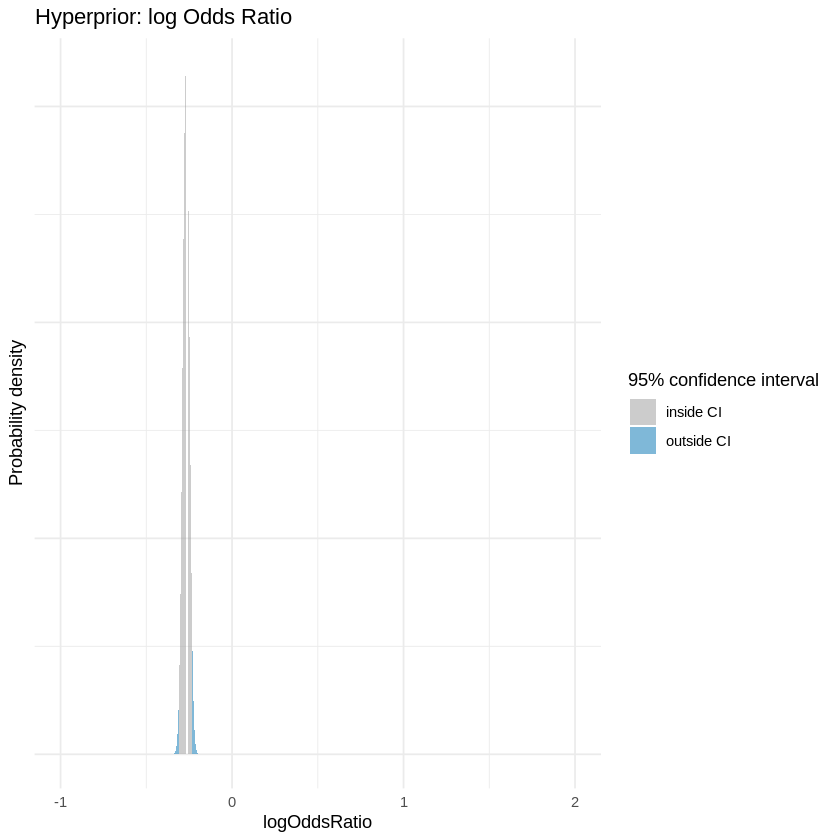

[1] "PhysicalFunctioning"


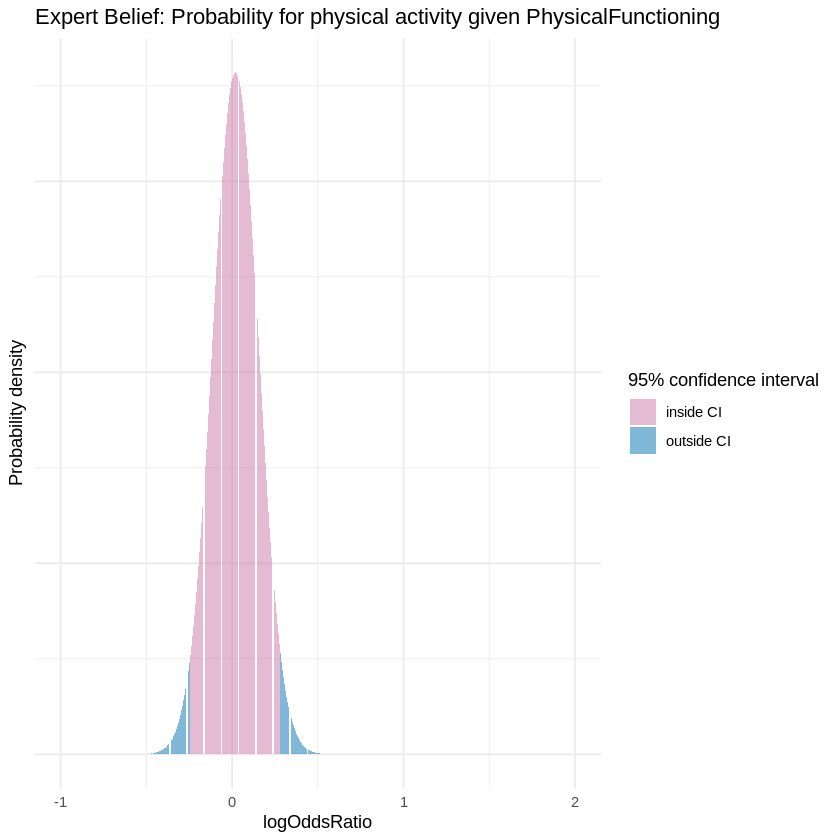

[1] "PhysicalFunctioning"


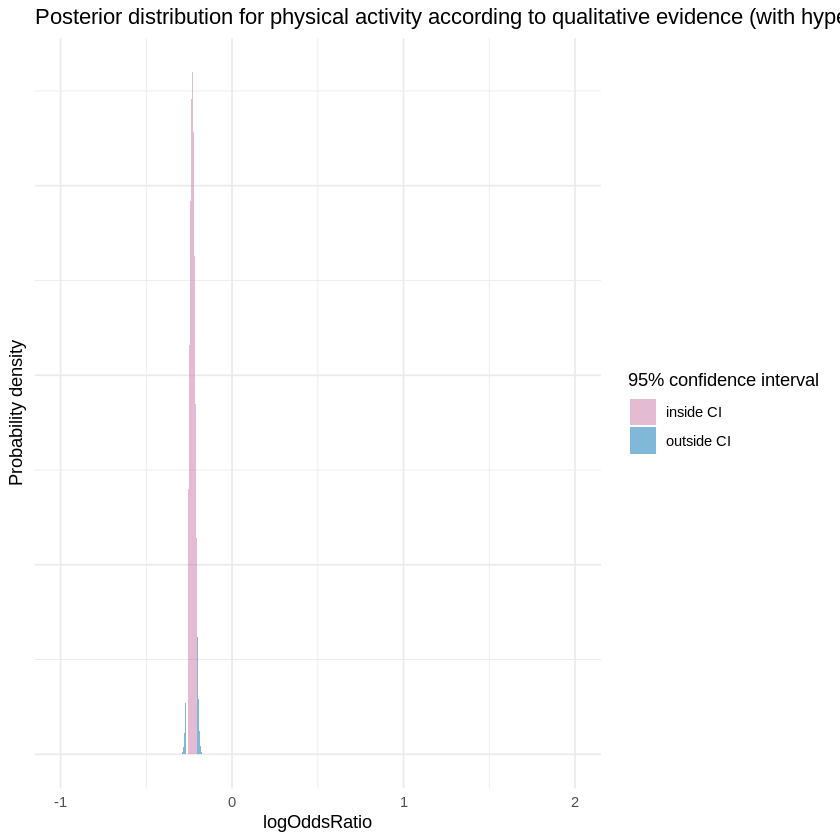

[1] "PhysicalFunctioning"


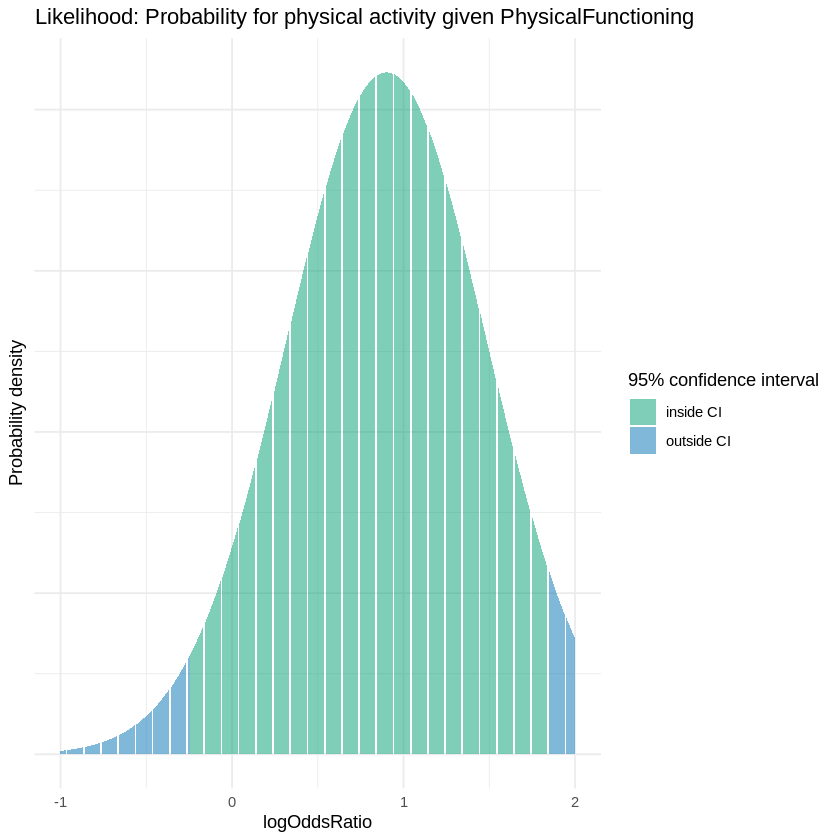

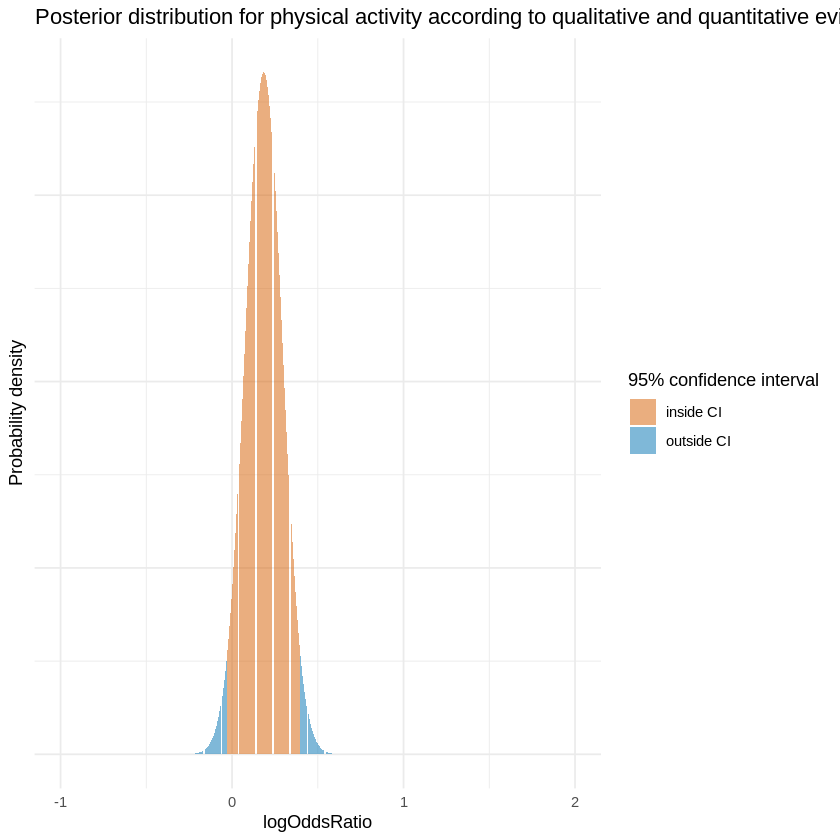

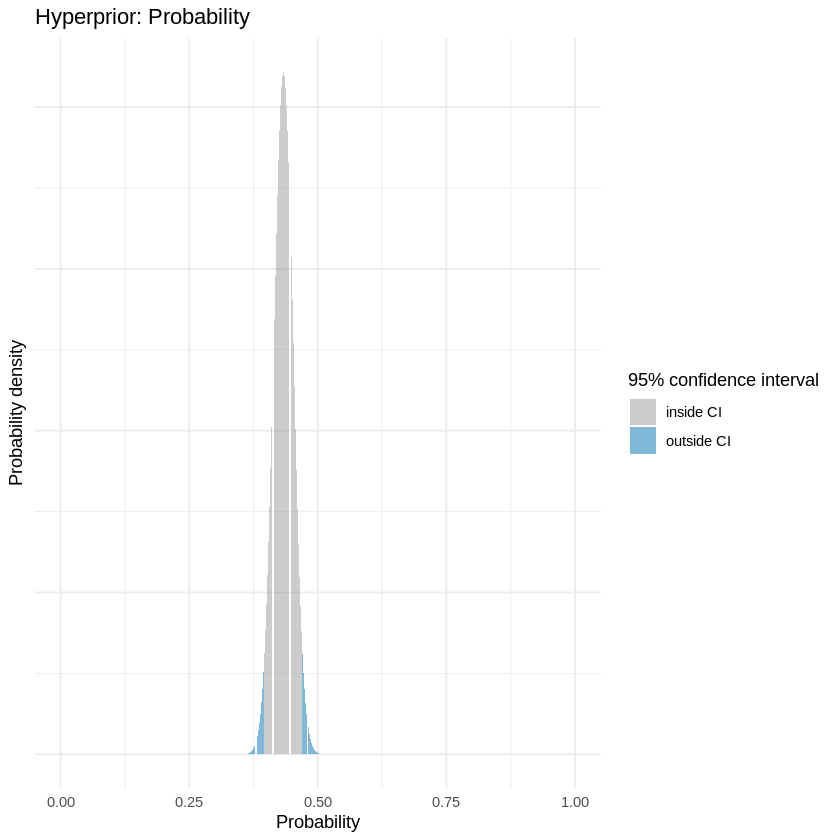

[1] "PositiveAttitude"


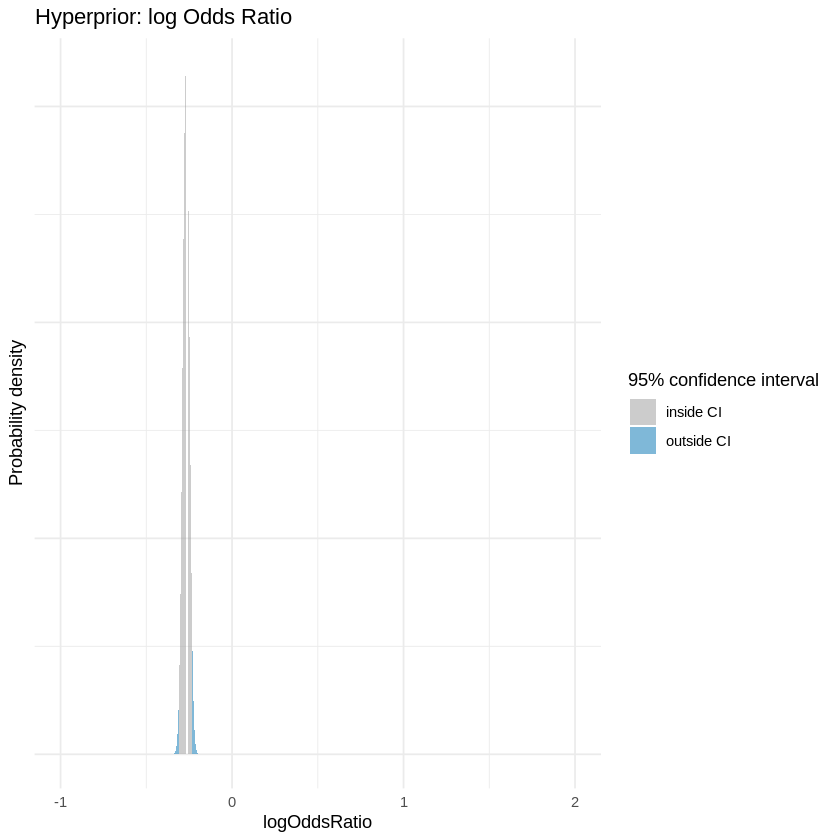

[1] "PositiveAttitude"


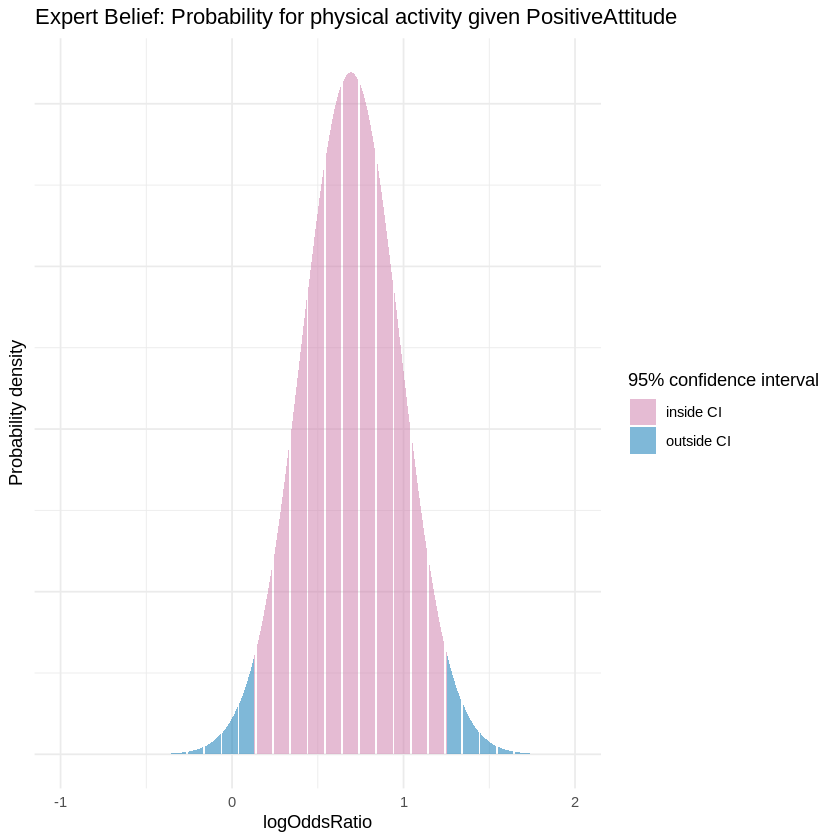

[1] "PositiveAttitude"


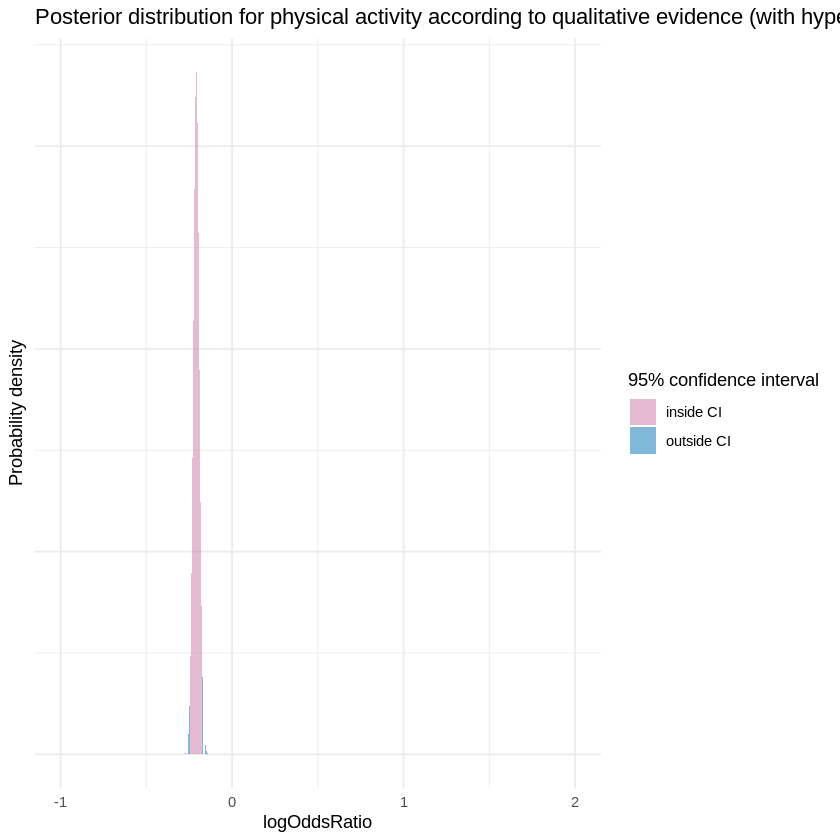

[1] "PositiveAttitude"


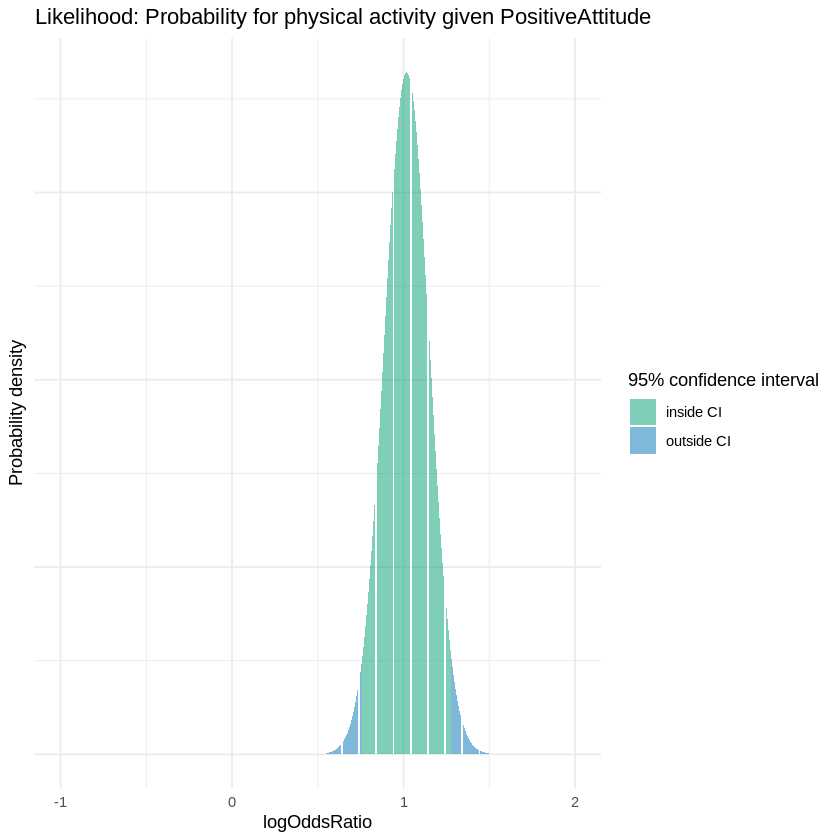

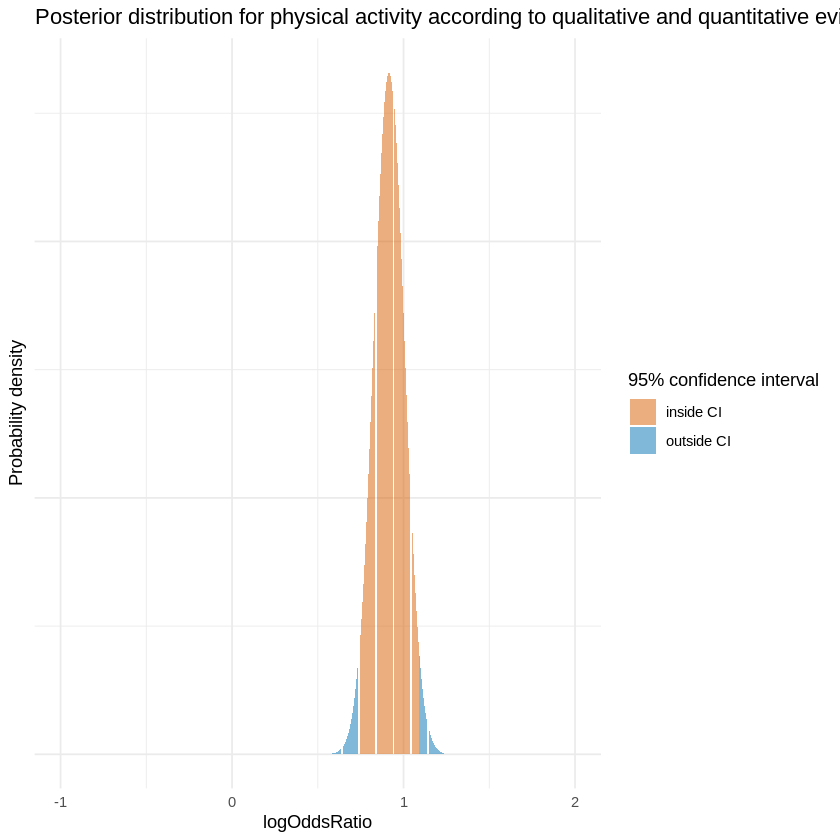

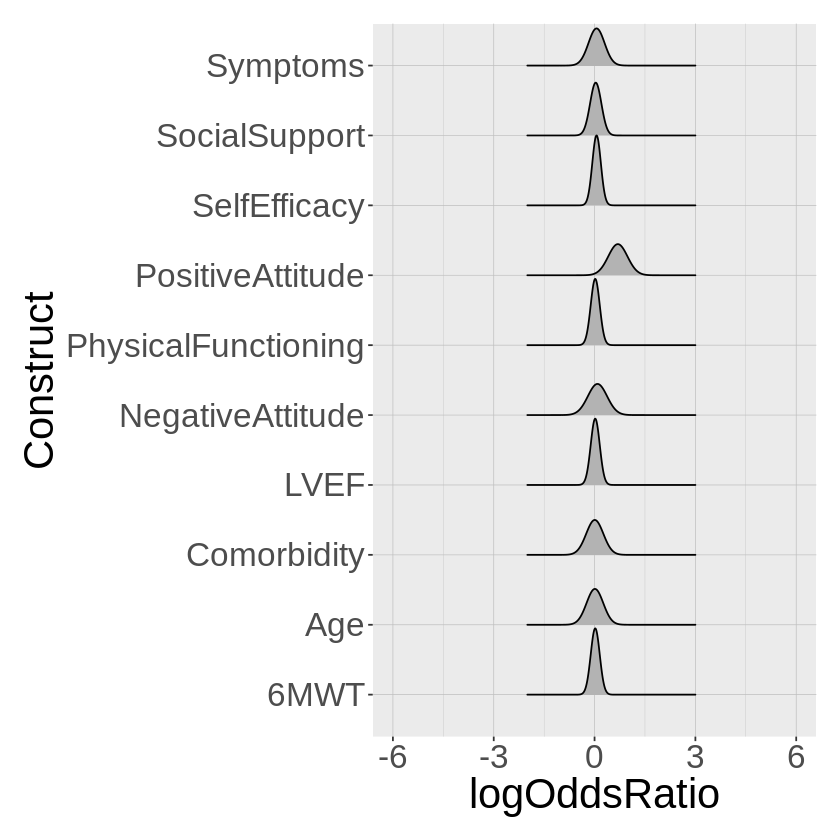

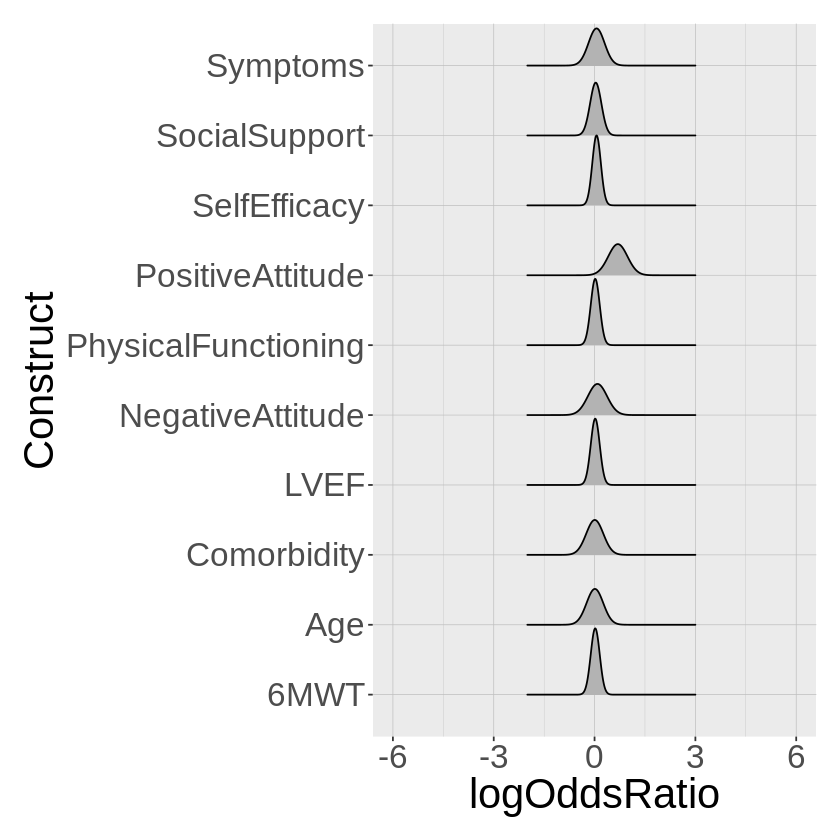

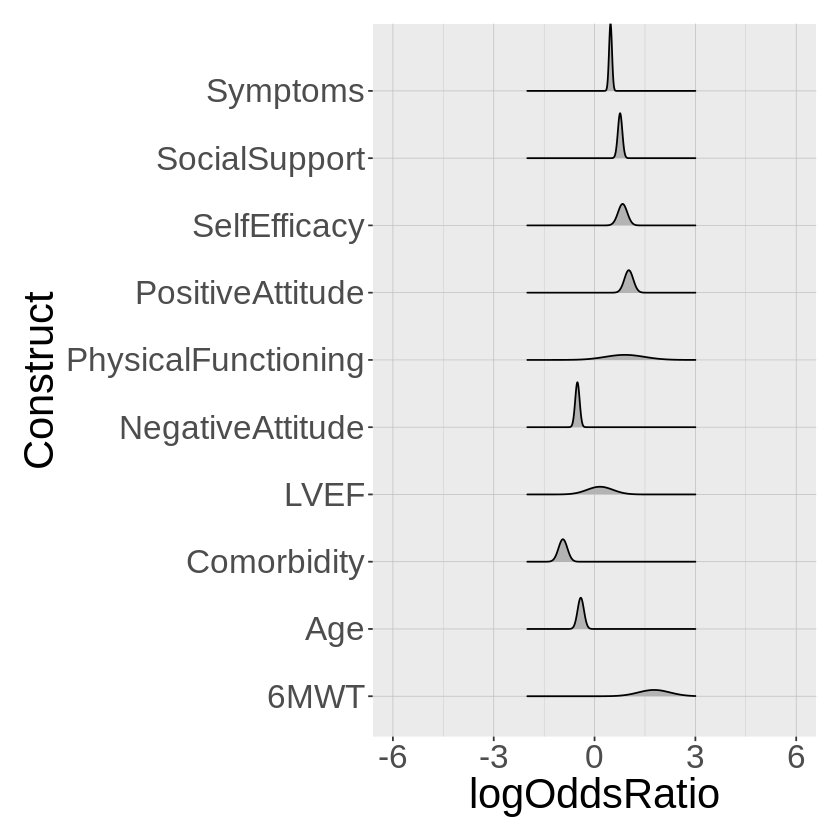

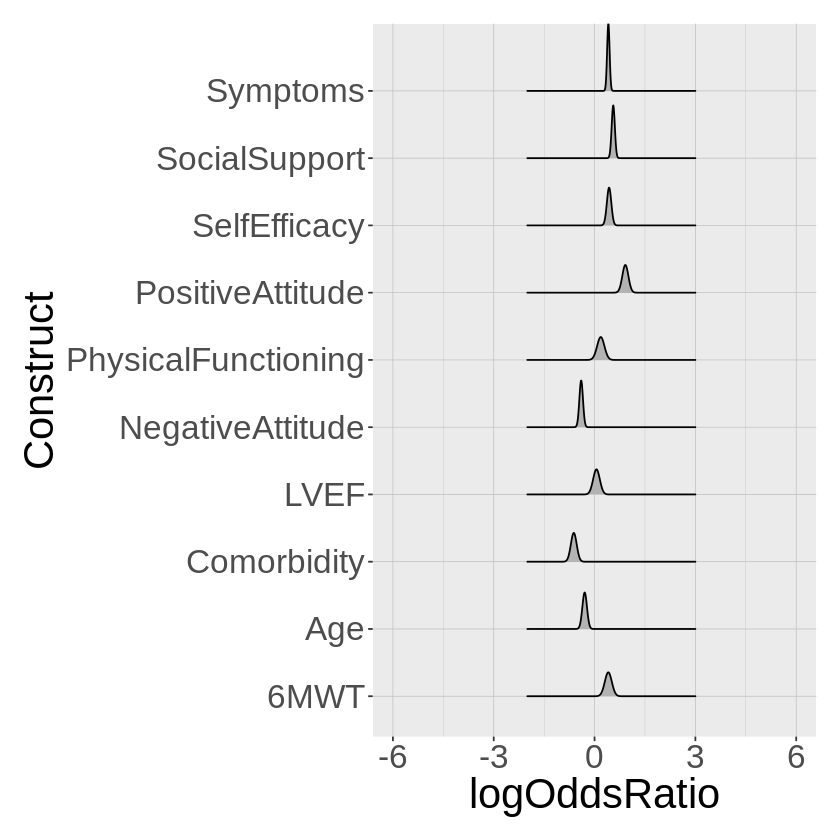

In [ ]:
## Combining qualitative and quantitative evidence using Bayesian Update. First hyperprior was updated with prior, the resultant posterior was updated with quantitative evidence
source(paste(SOURCE_ROOT, "Bayesian_MA_Quant_and_Qual.R", sep=""))

#in the output below prior (pink), likelihood (green) and posterior (amber) is plotted for each construct separately. 

Bayesian meta-analysis including quantitative evidence only

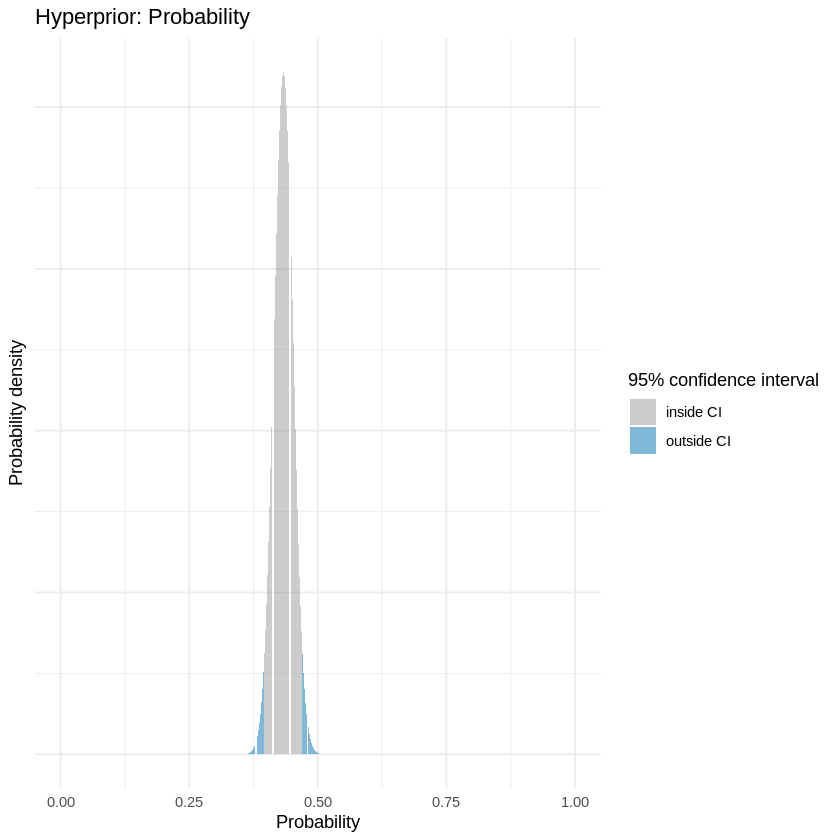

[1] "Age"


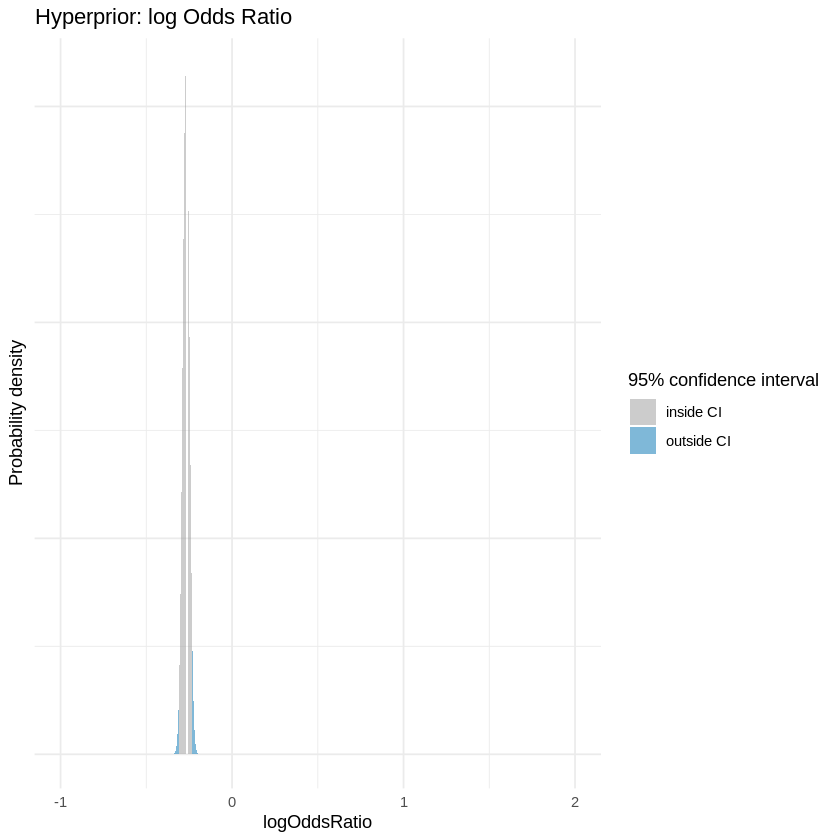

[1] "Age"


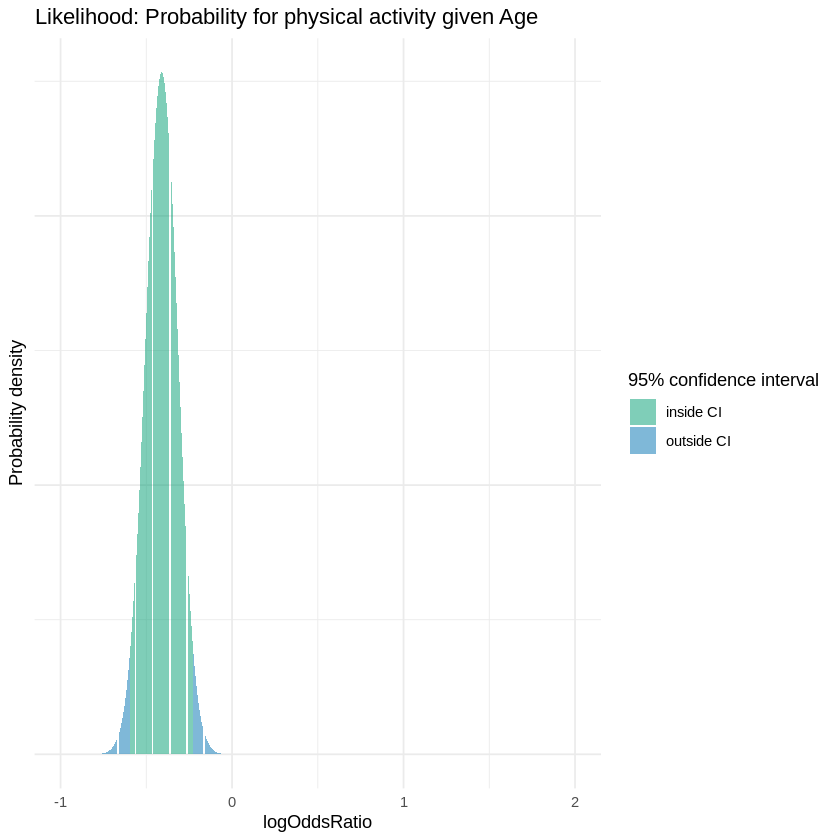

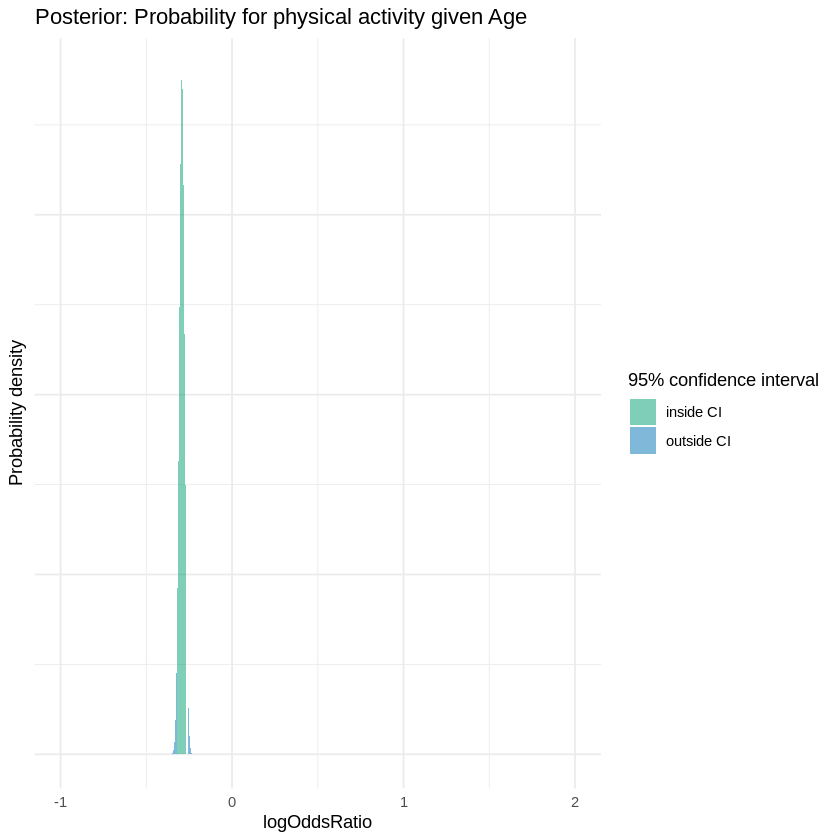

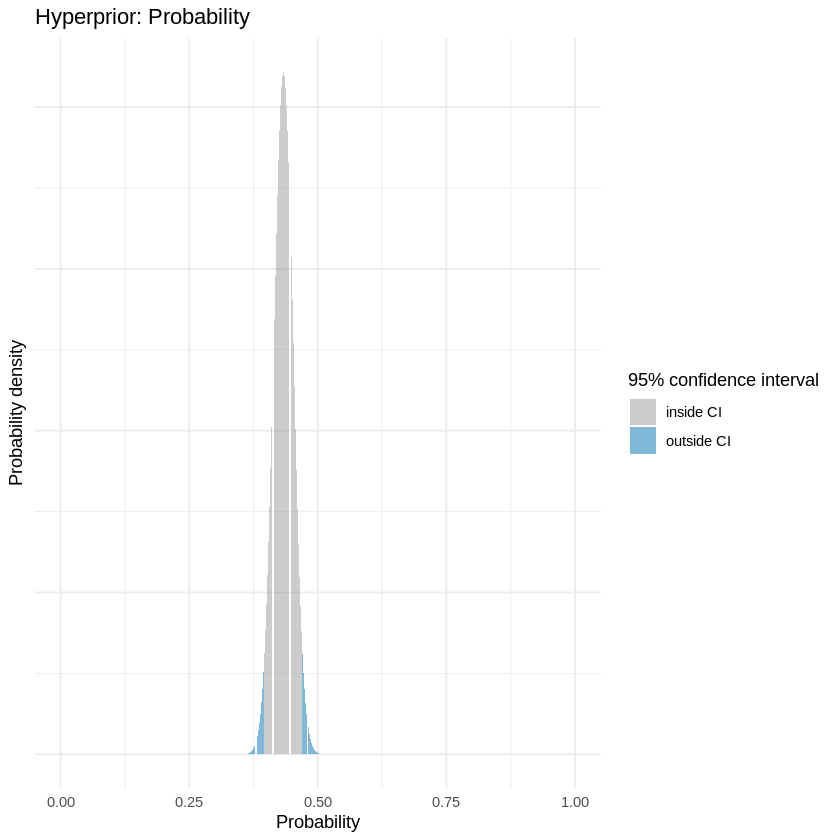

[1] "Comorbidity"


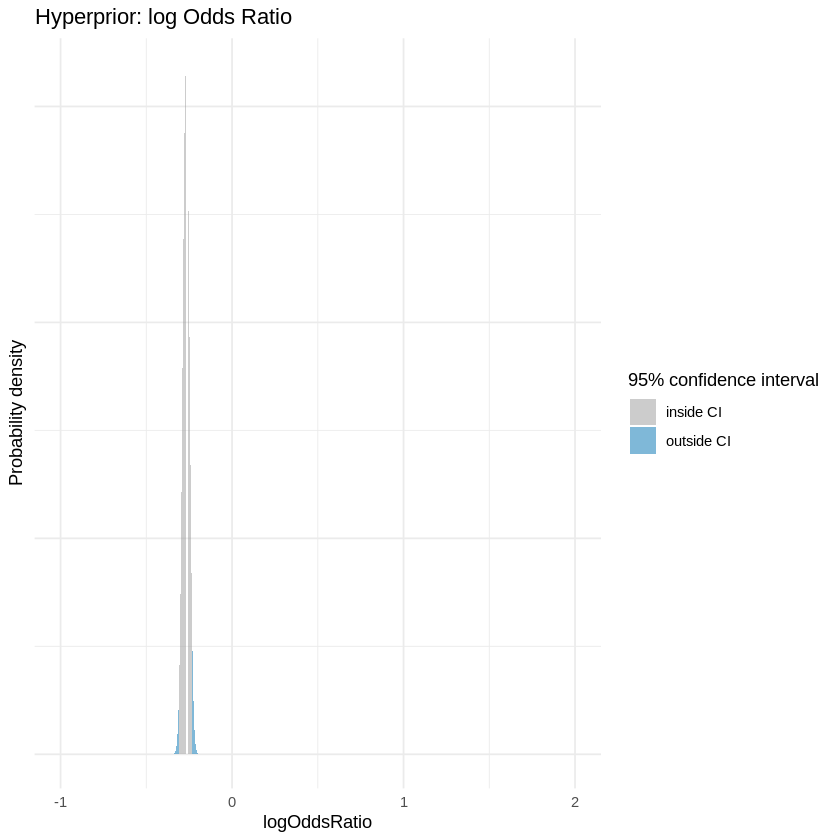

[1] "Comorbidity"


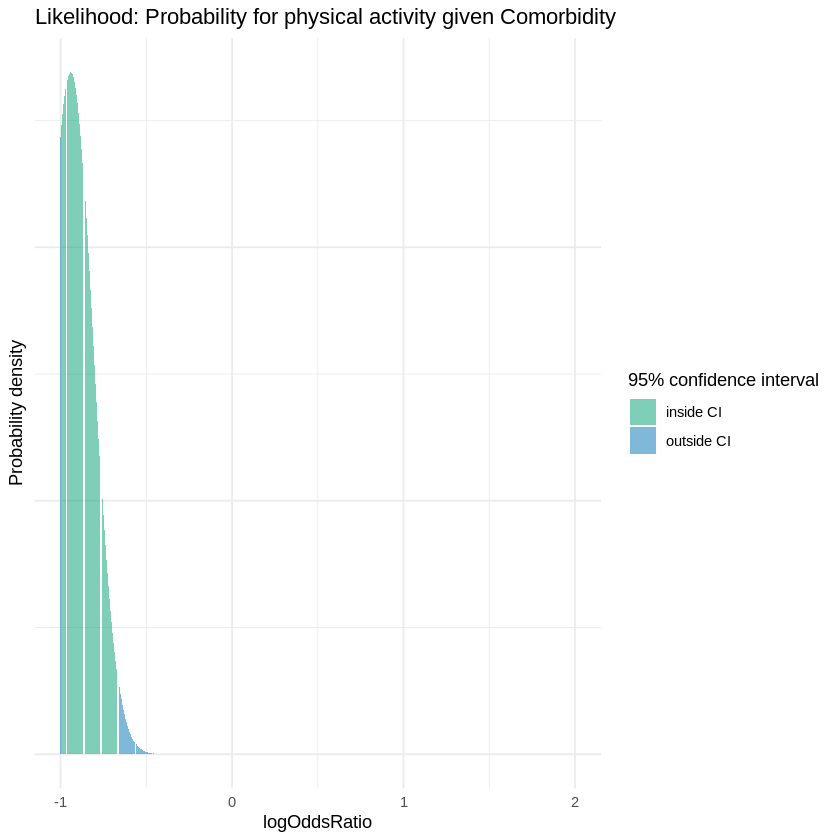

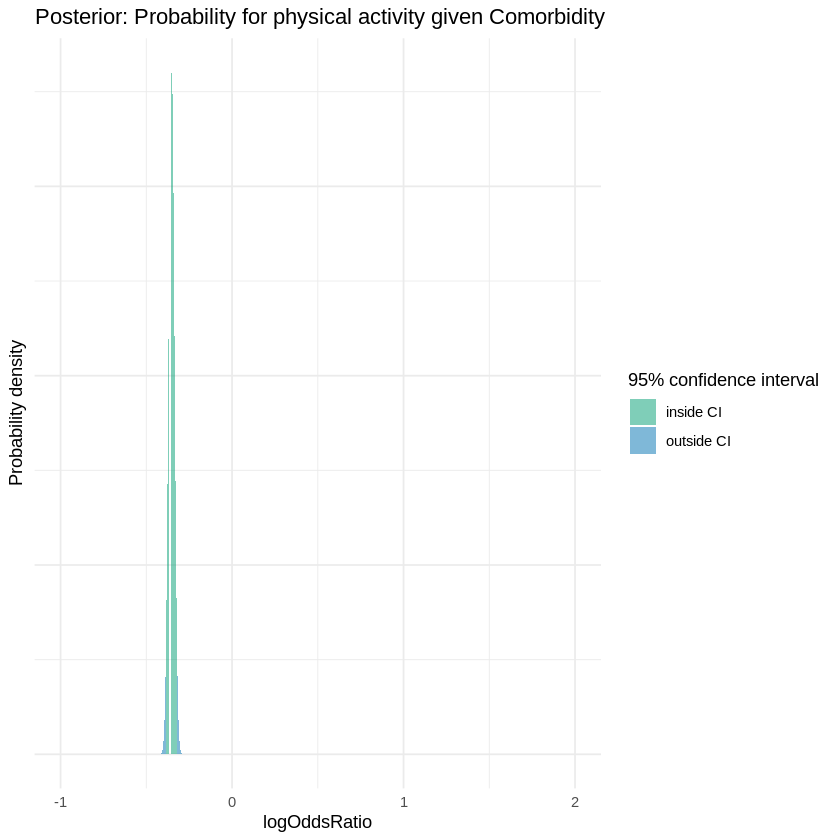

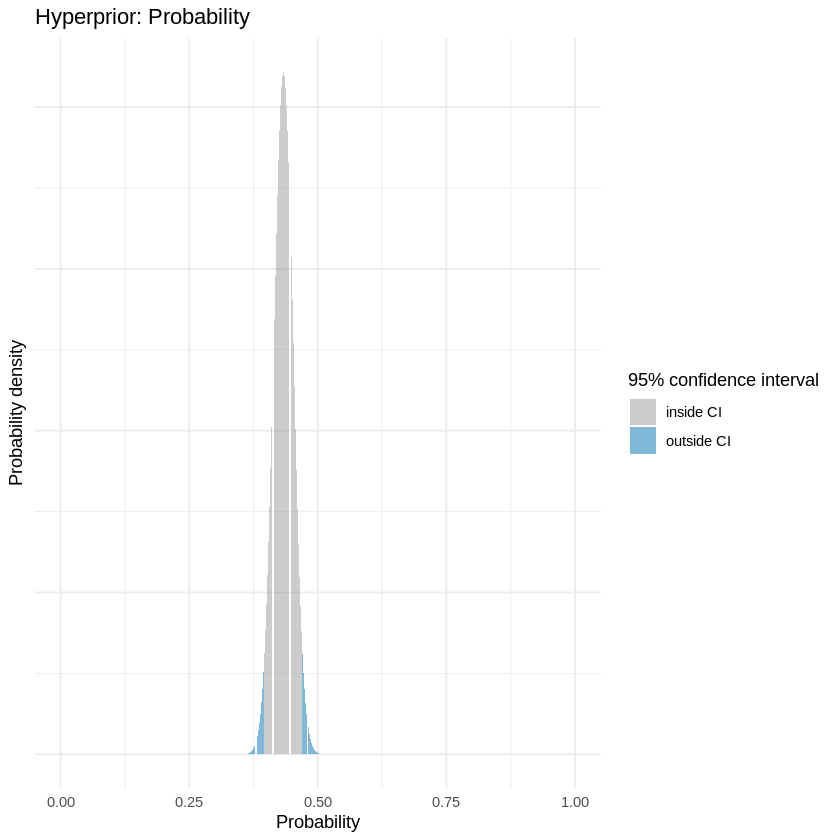

[1] "SocialSupport"


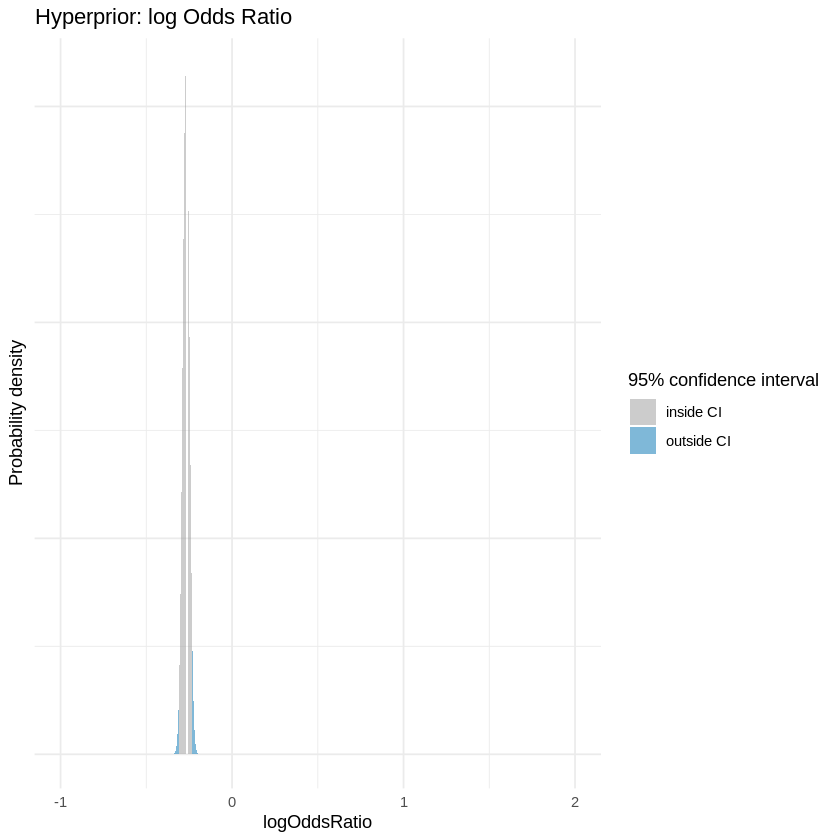

[1] "SocialSupport"


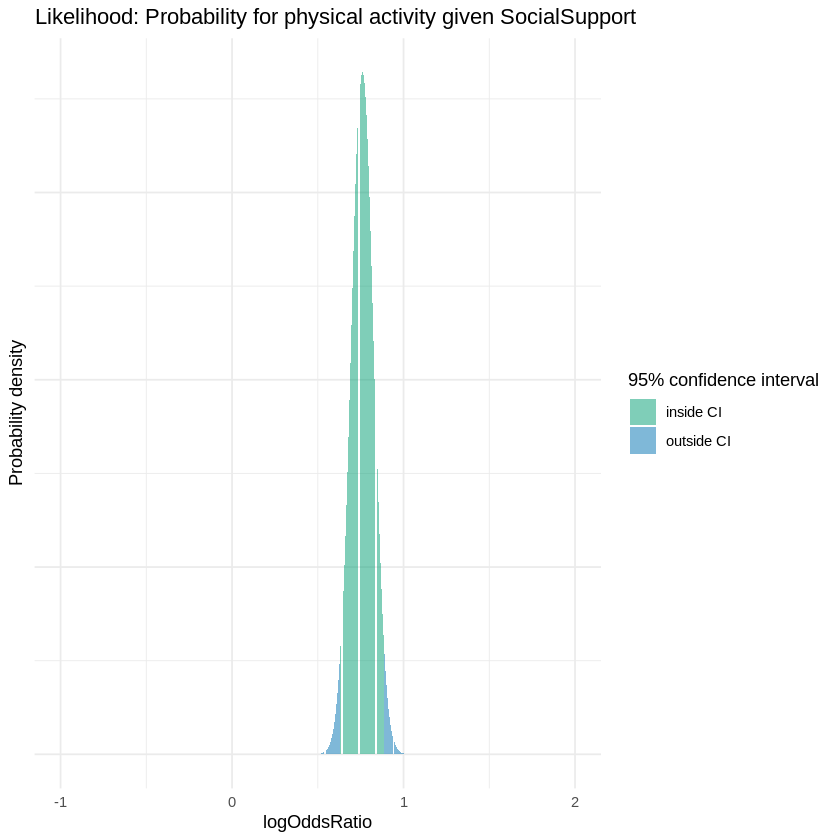

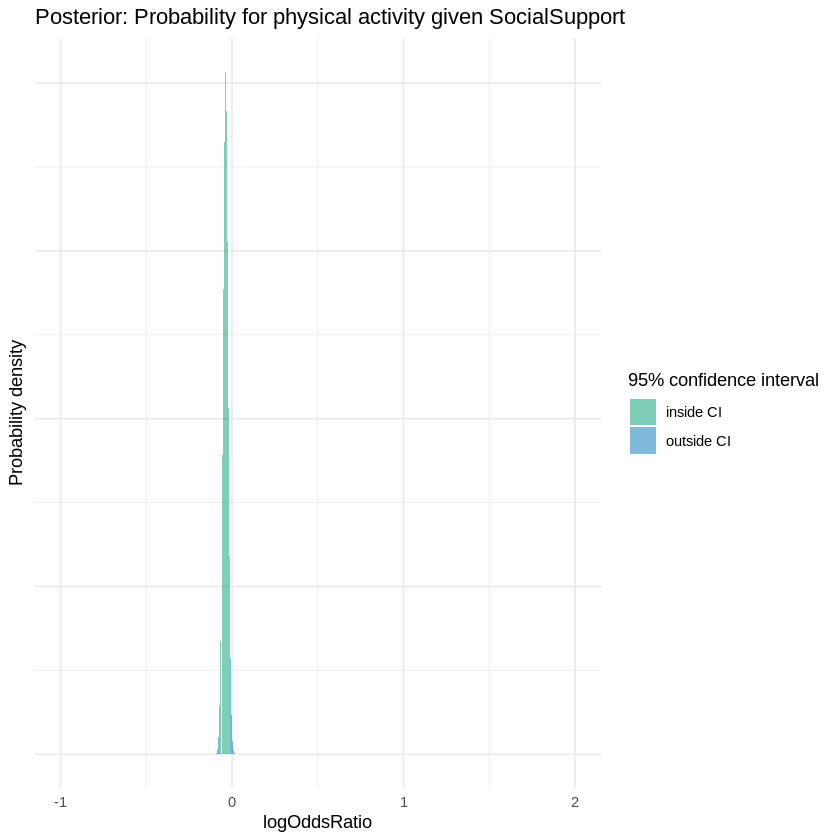

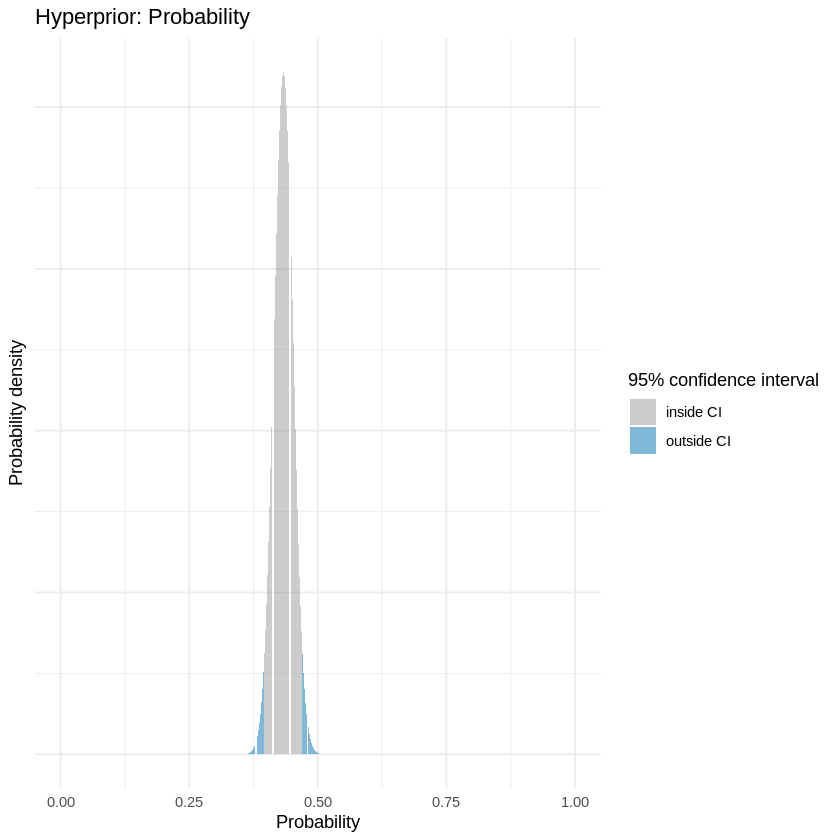

[1] "NegativeAttitude"


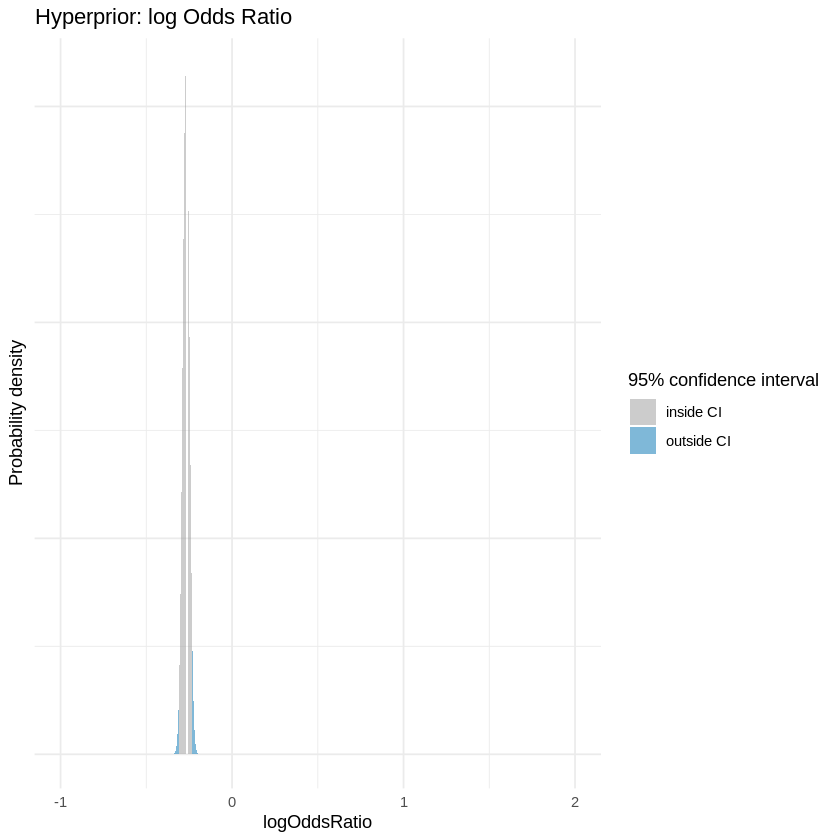

[1] "NegativeAttitude"


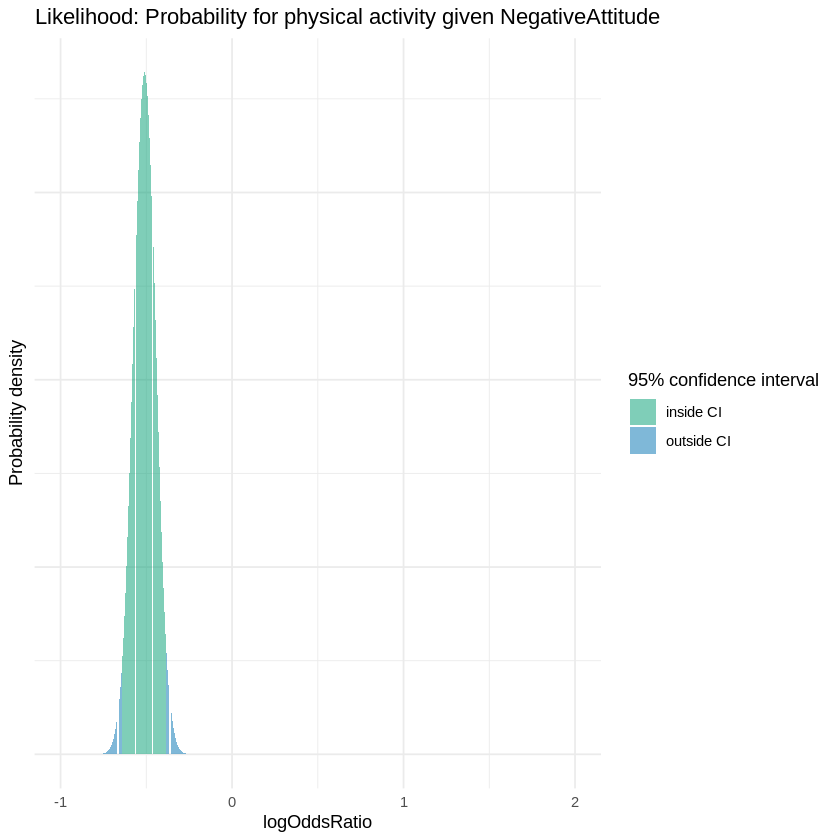

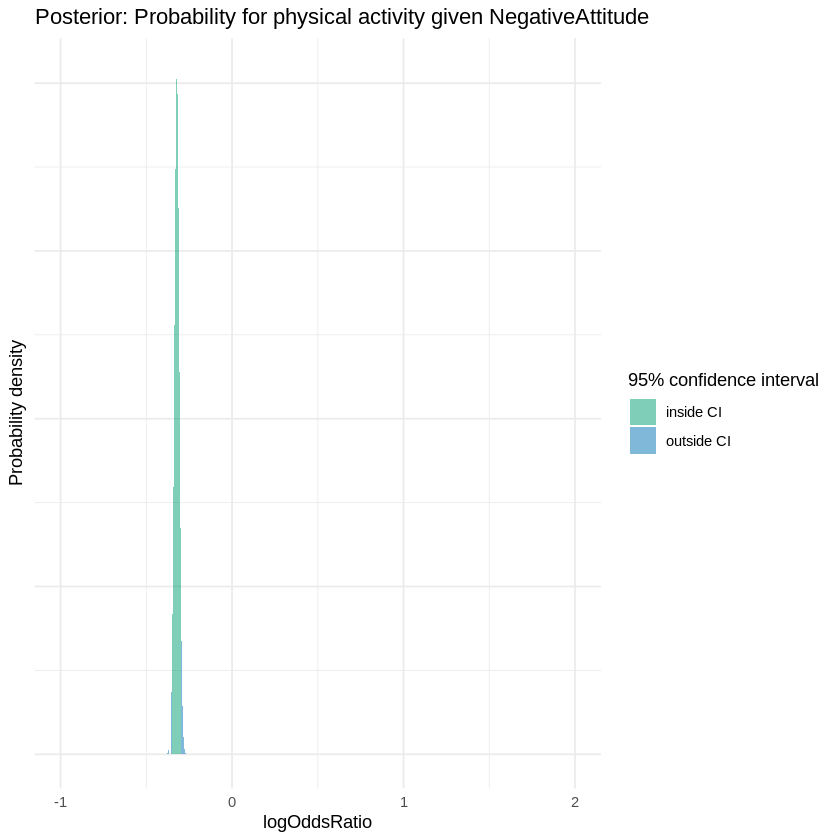

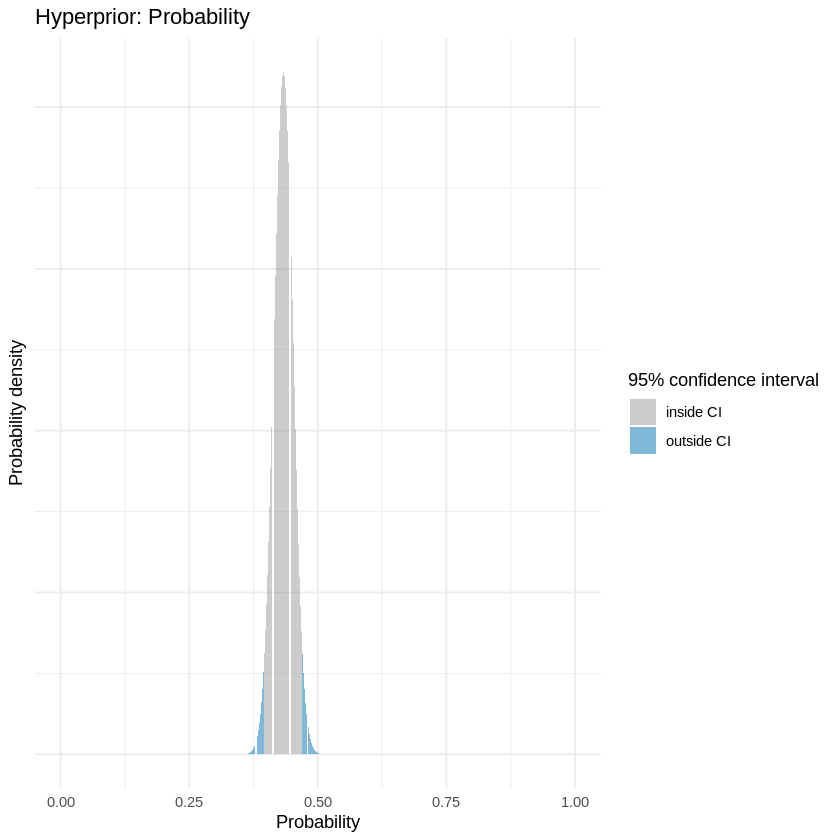

[1] "PositiveAttitude"


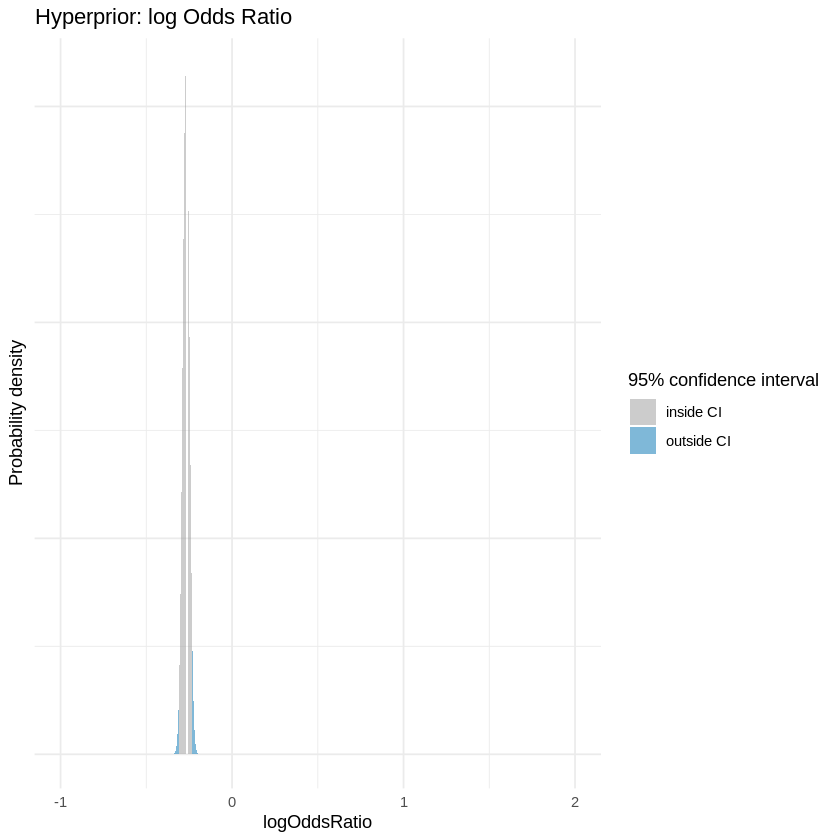

[1] "PositiveAttitude"


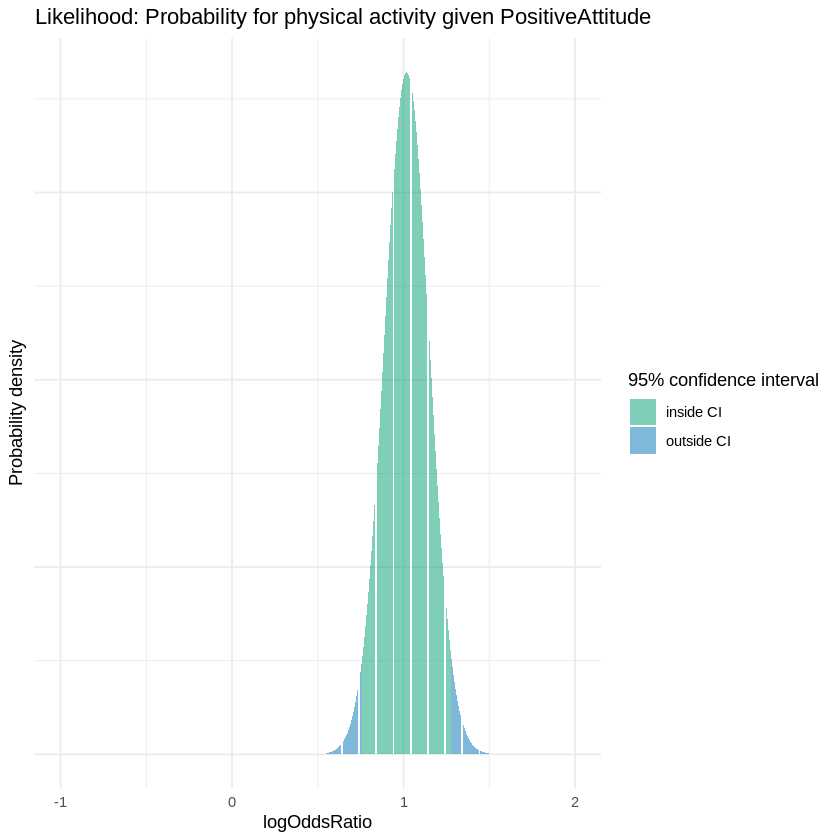

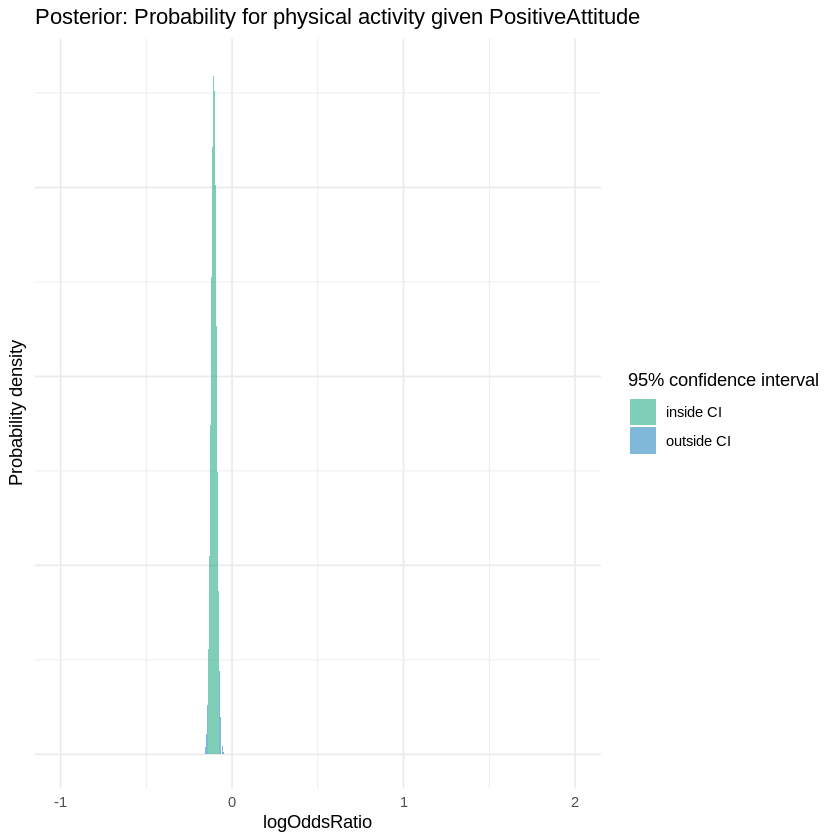

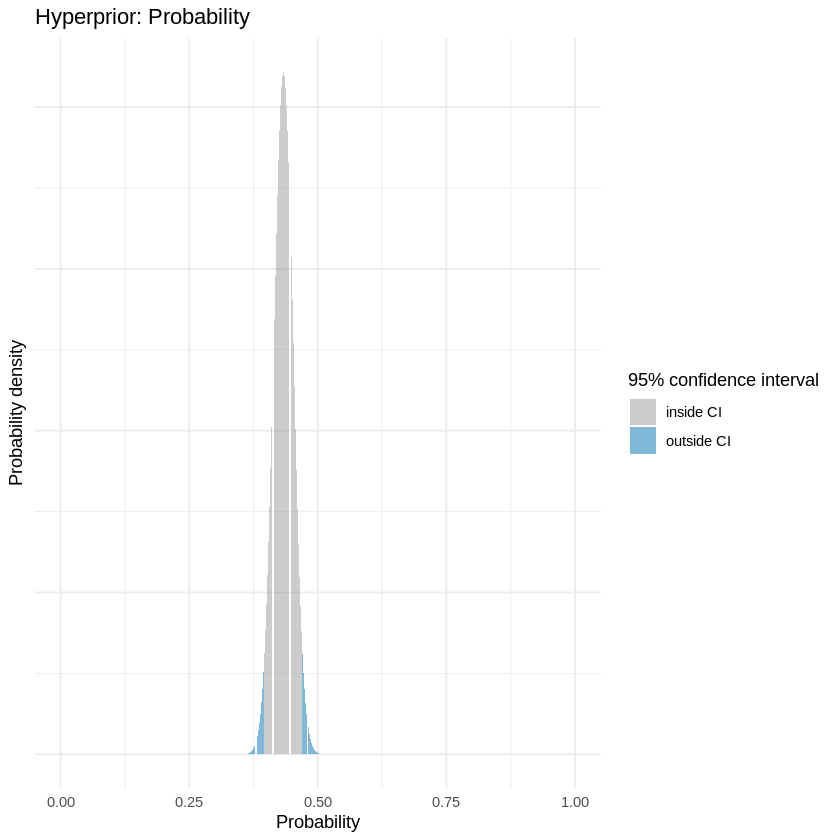

[1] "6MWT"


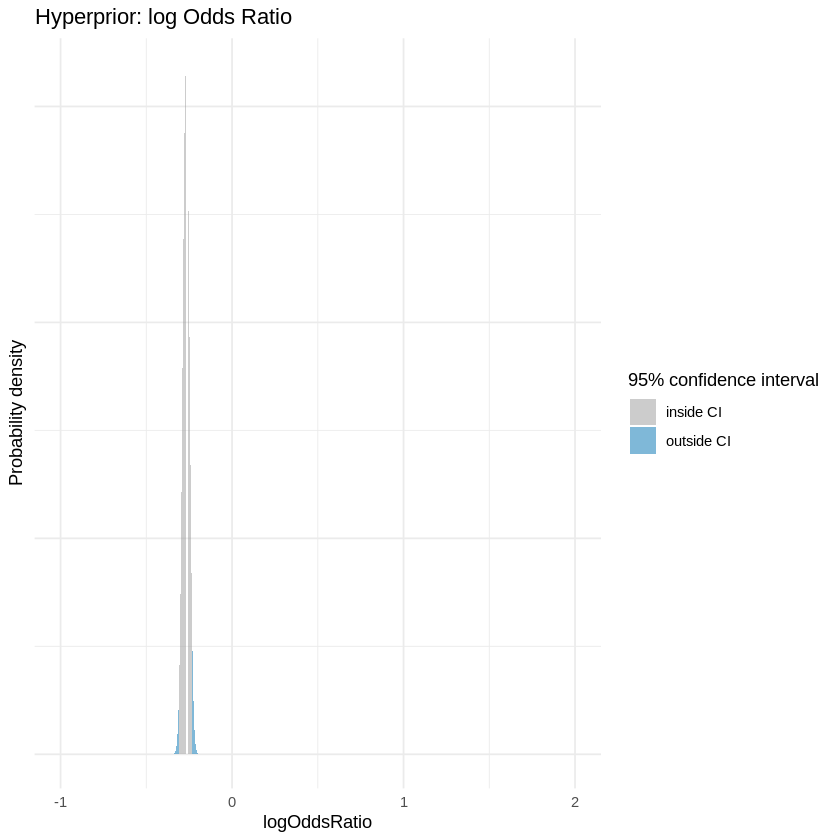

[1] "6MWT"


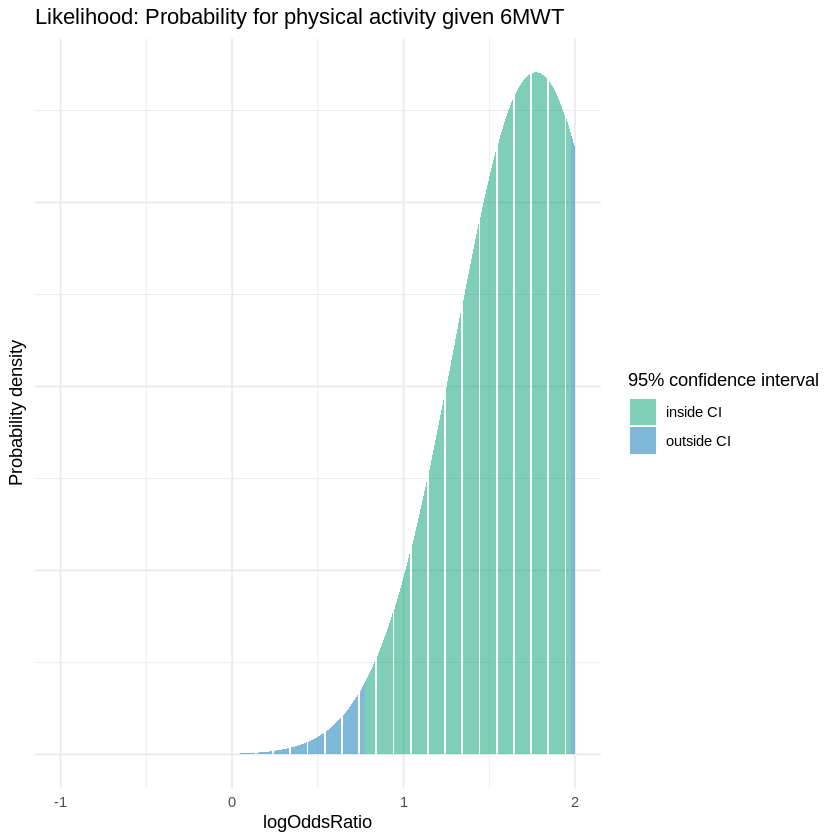

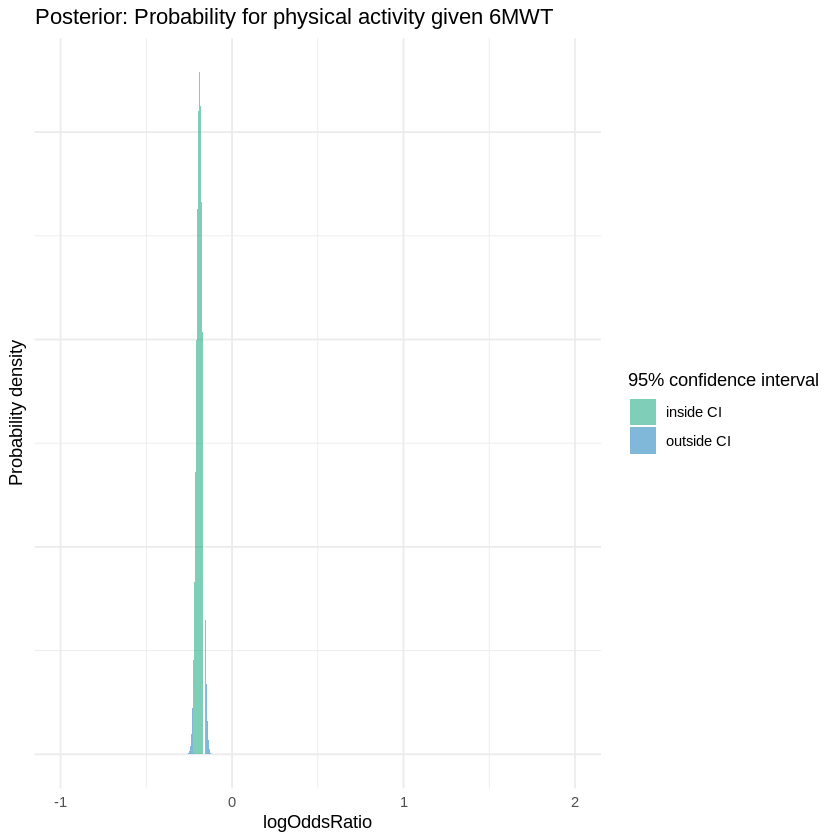

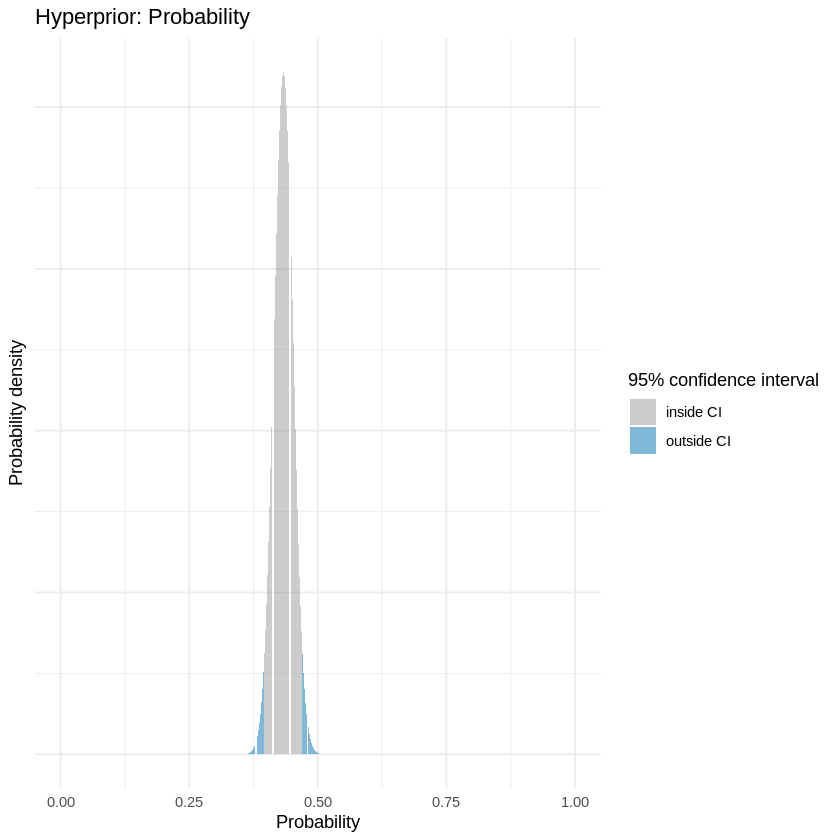

[1] "PhysicalFunctioning"


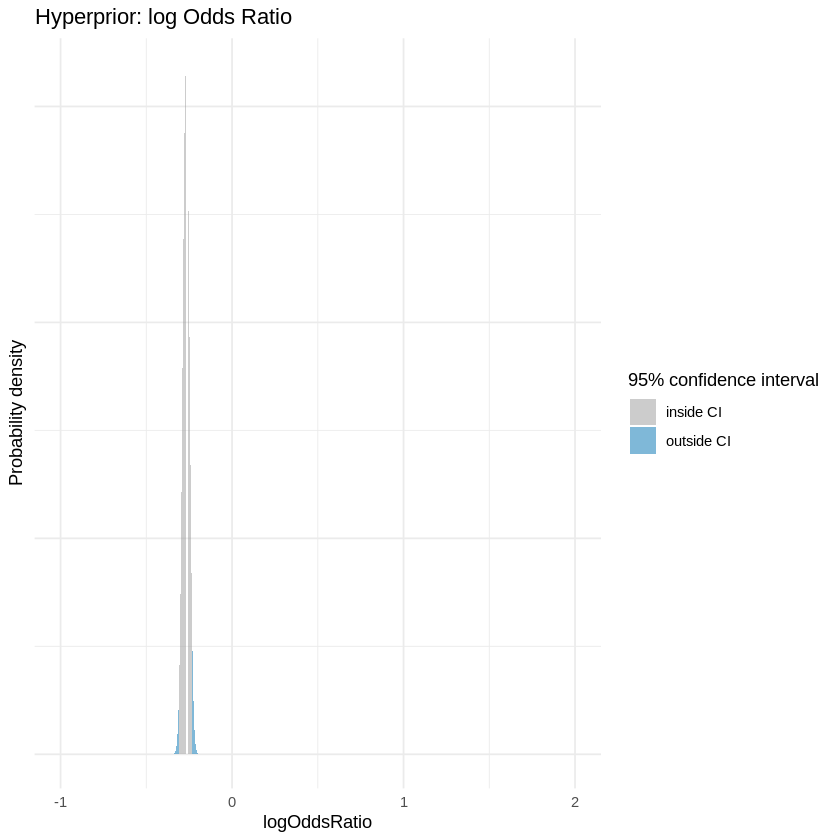

[1] "PhysicalFunctioning"


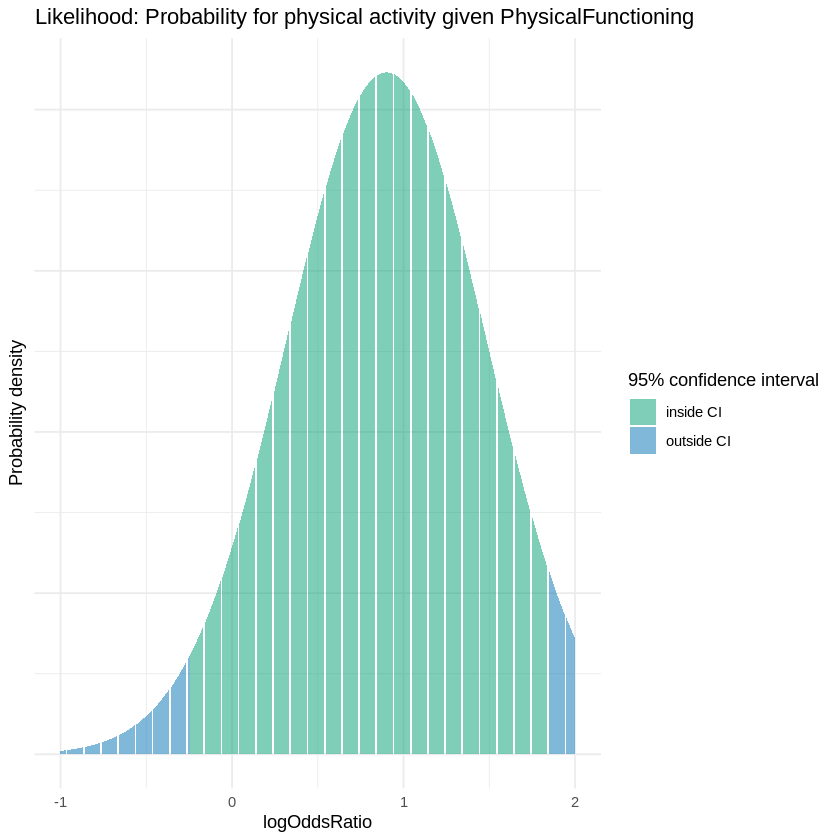

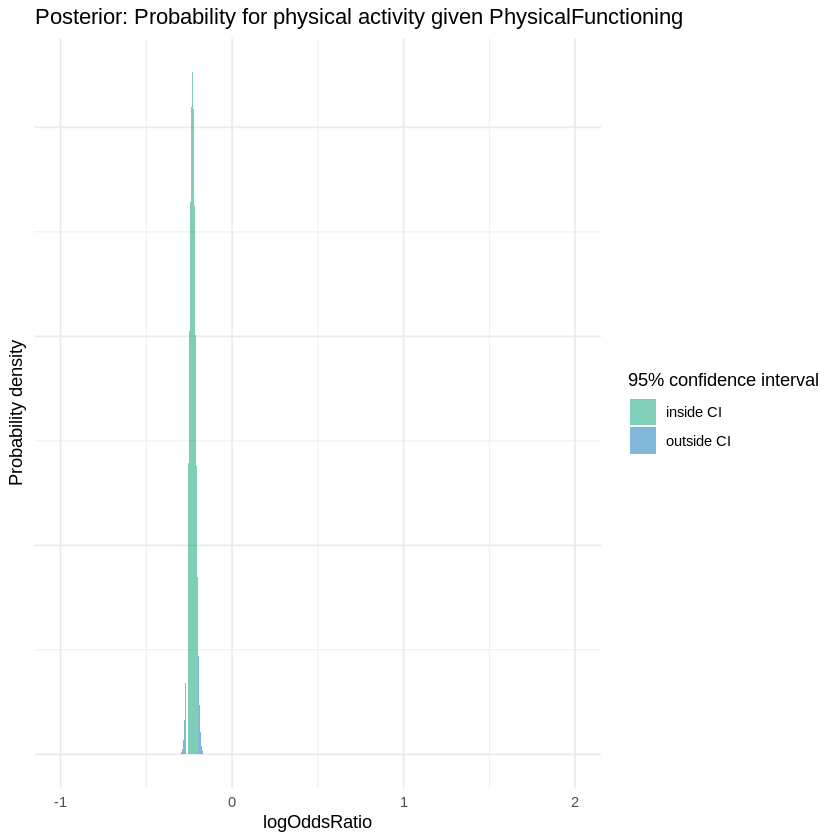

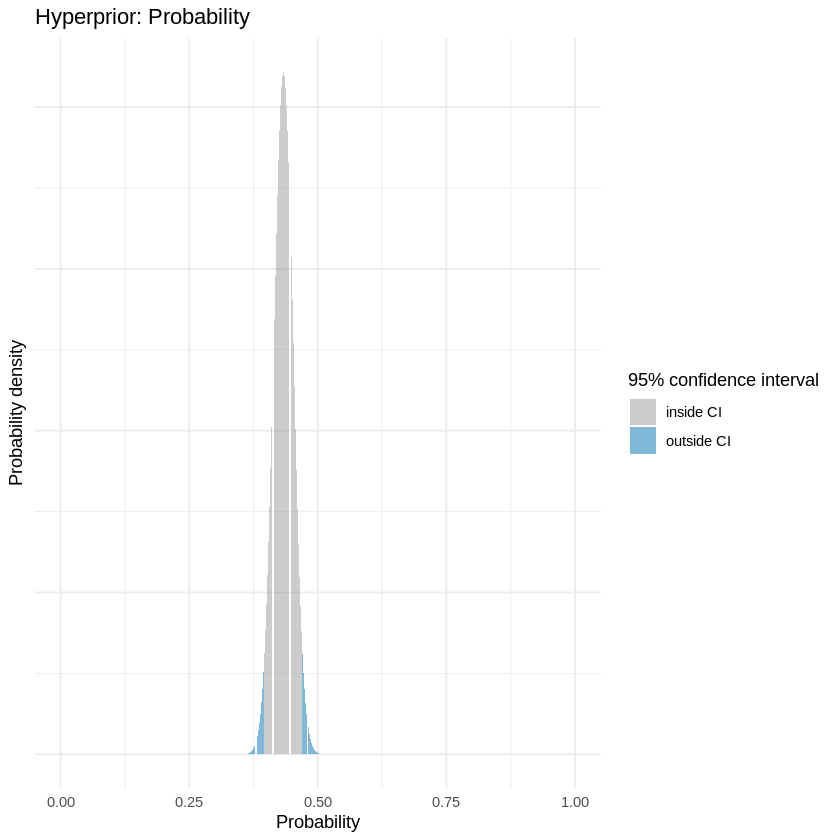

[1] "Symptoms"


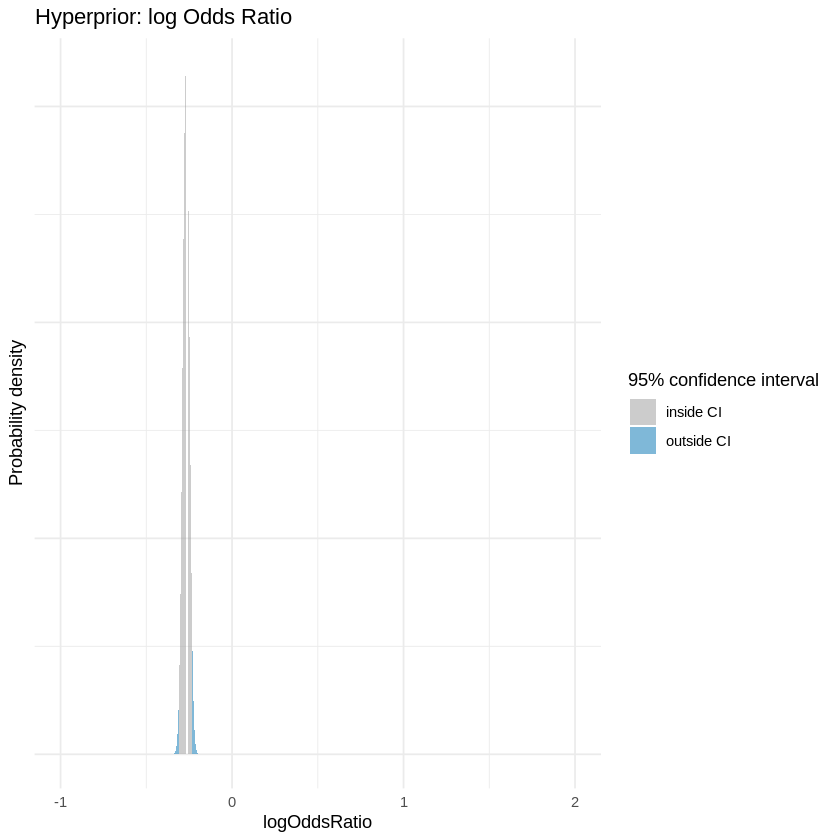

[1] "Symptoms"


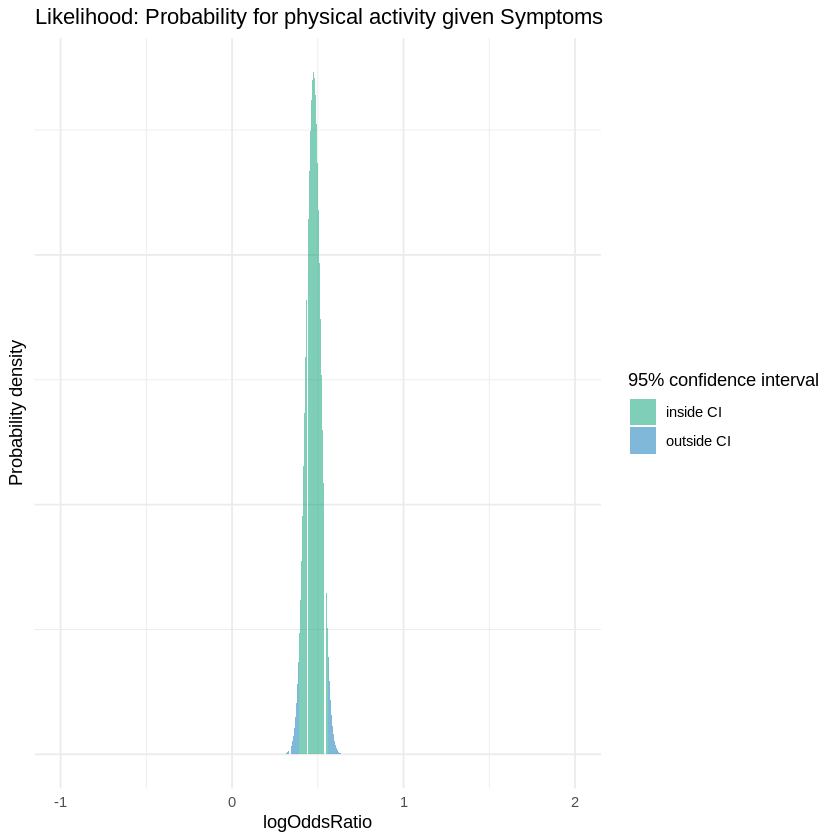

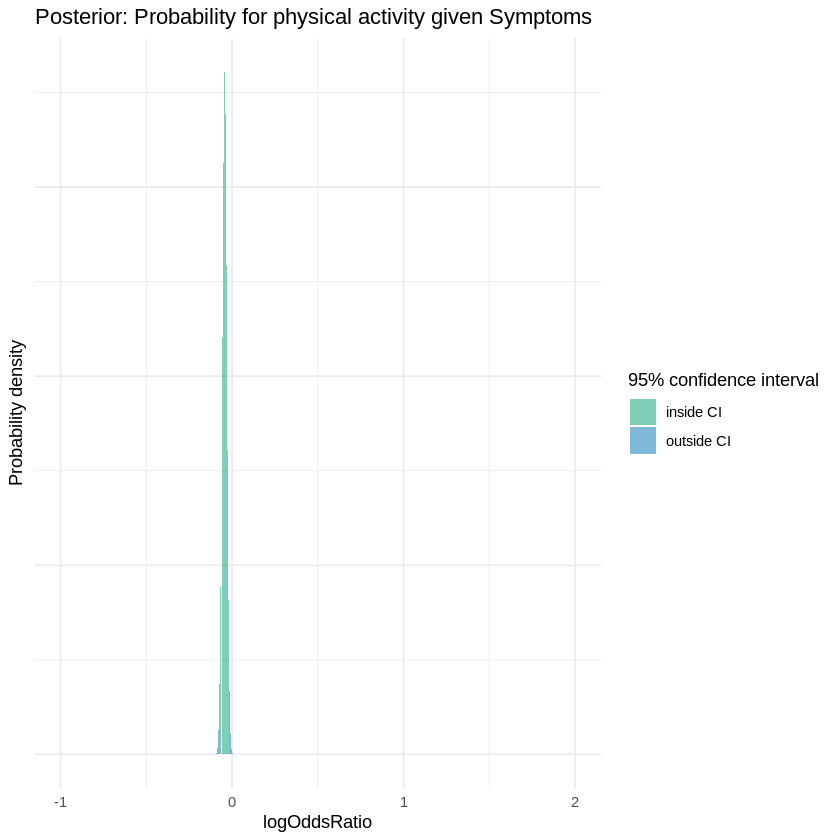

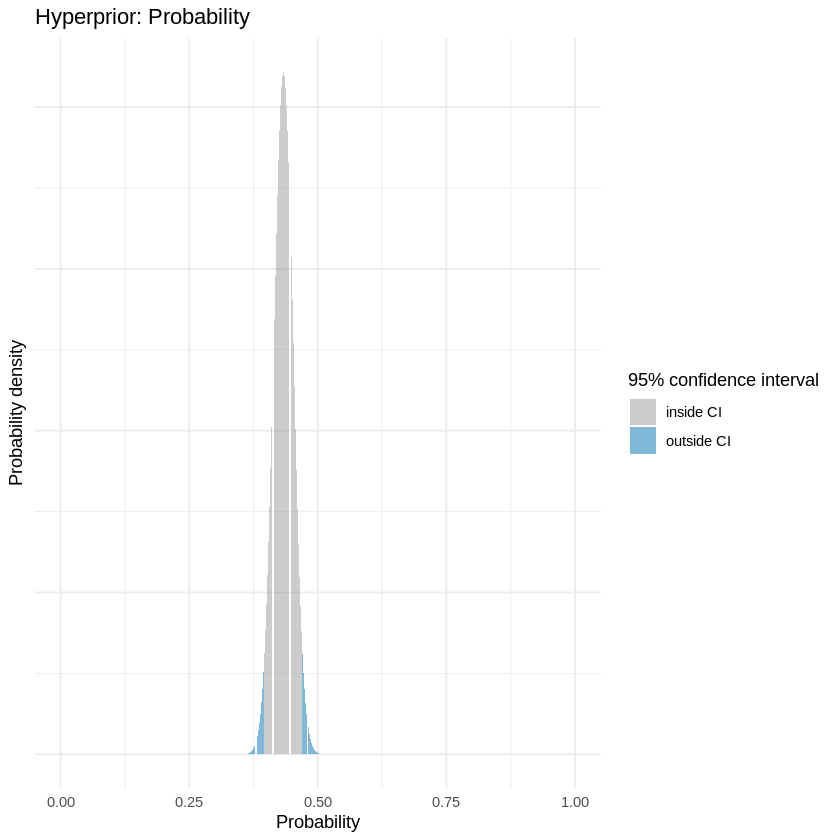

[1] "LVEF"


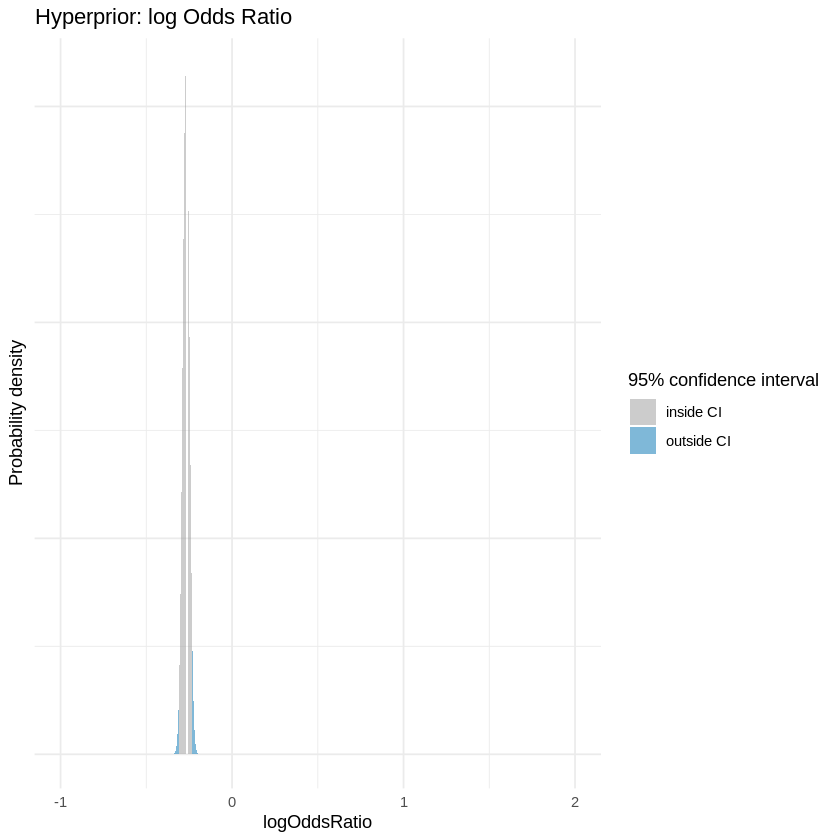

[1] "LVEF"


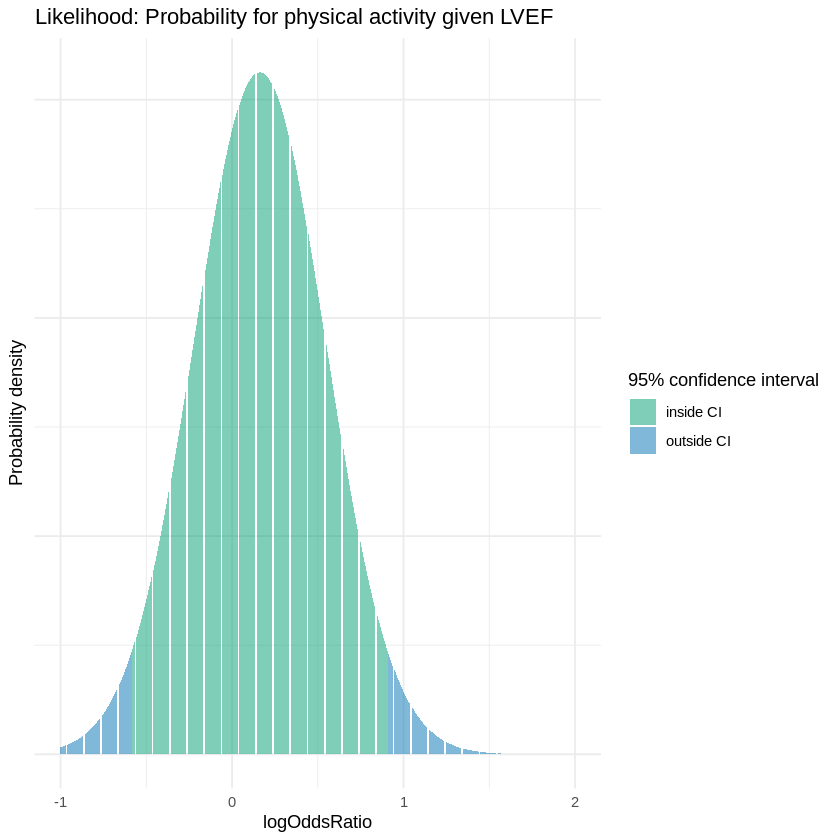

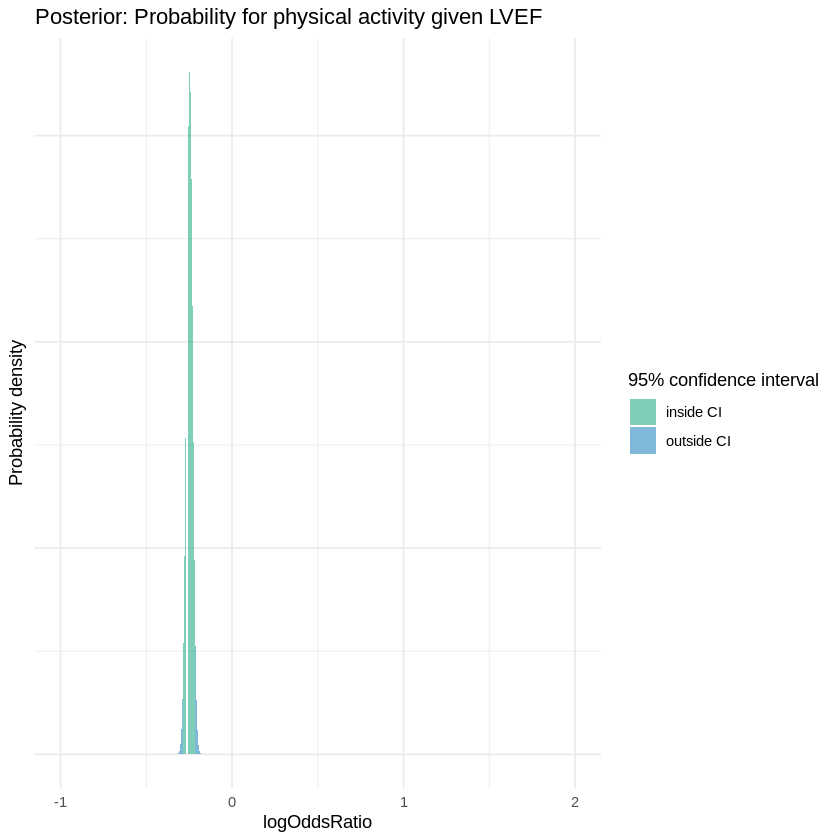

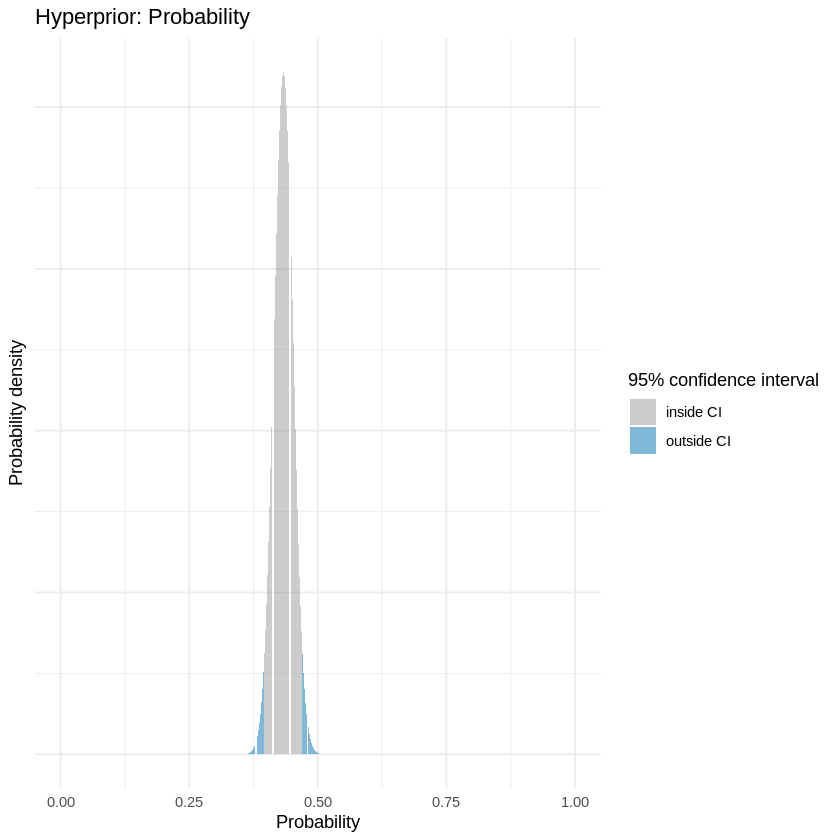

[1] "SelfEfficacy"


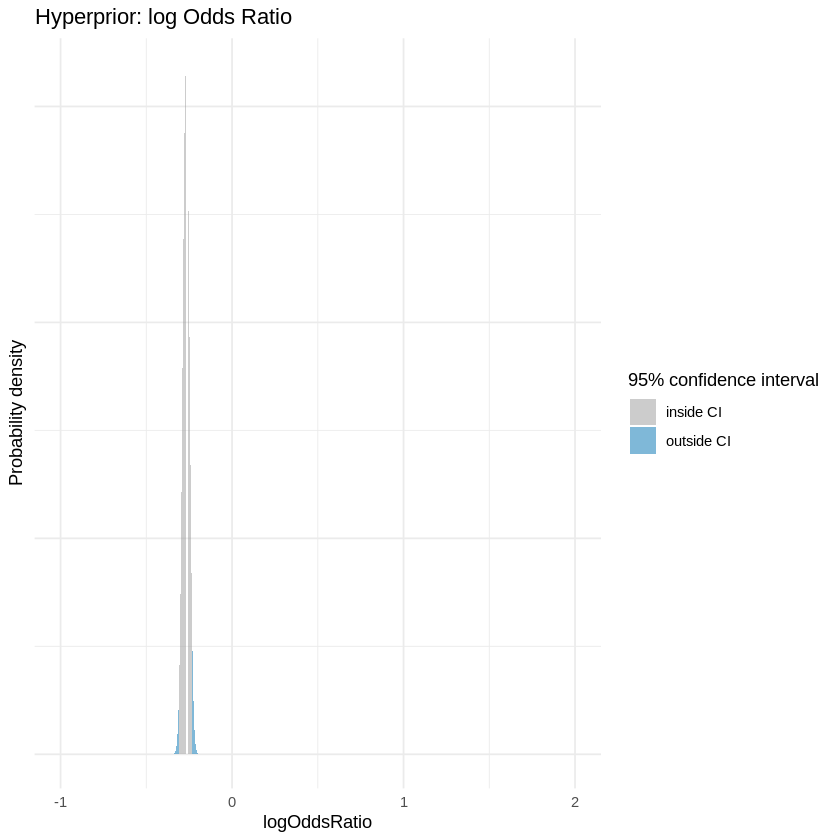

[1] "SelfEfficacy"


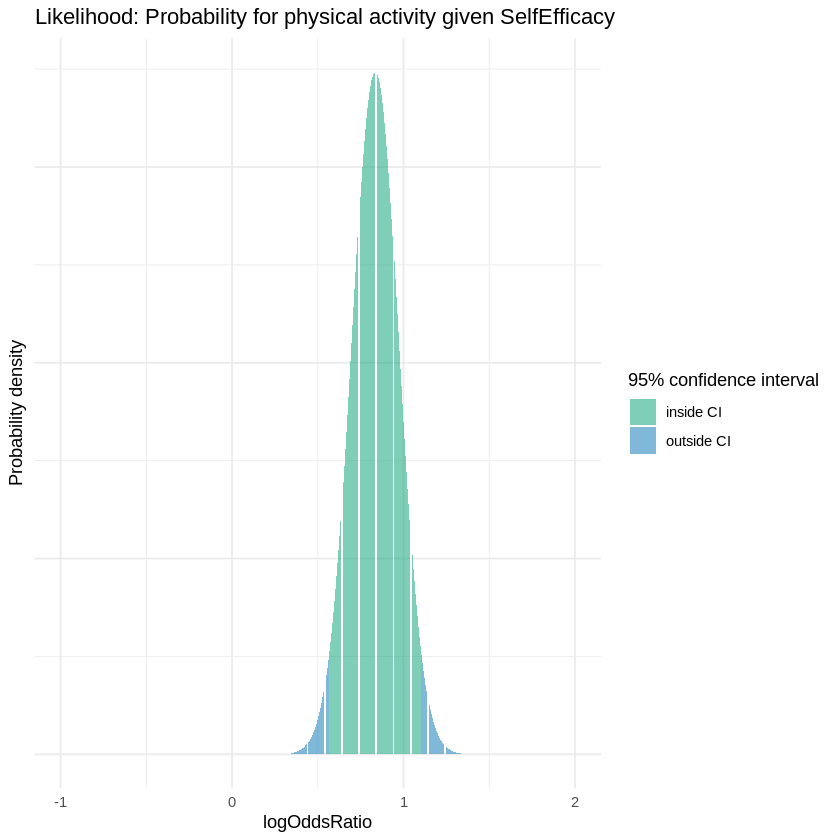

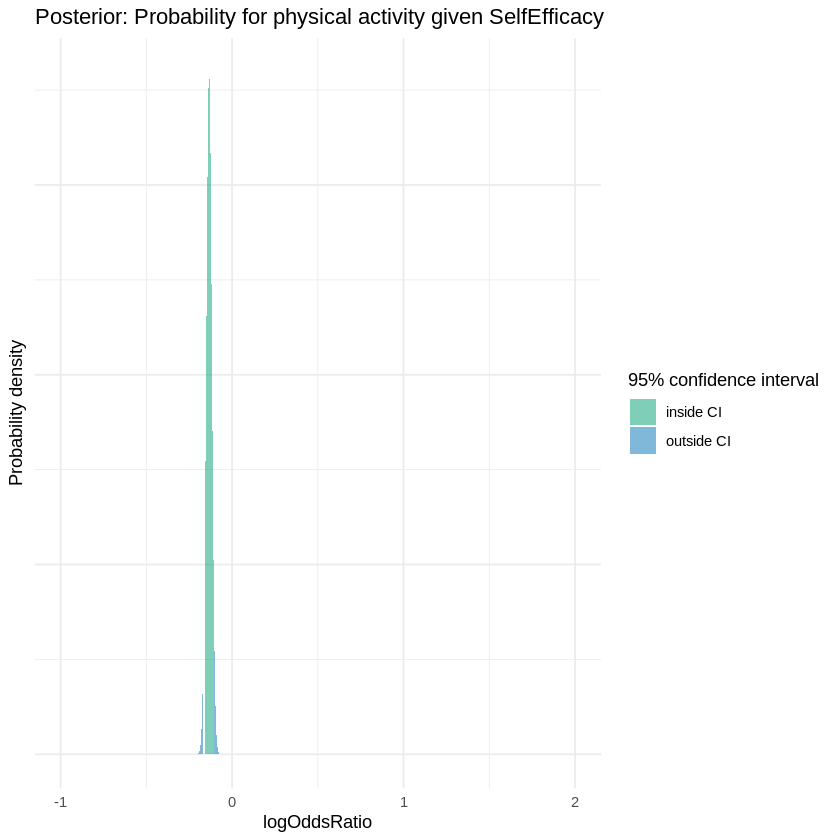

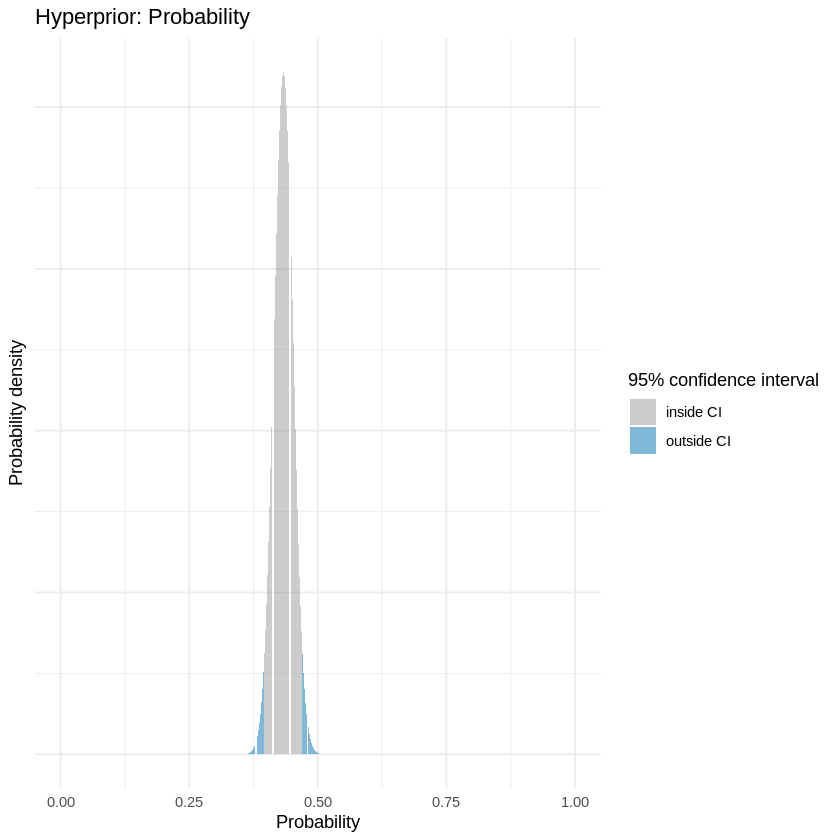

[1] "Depression"


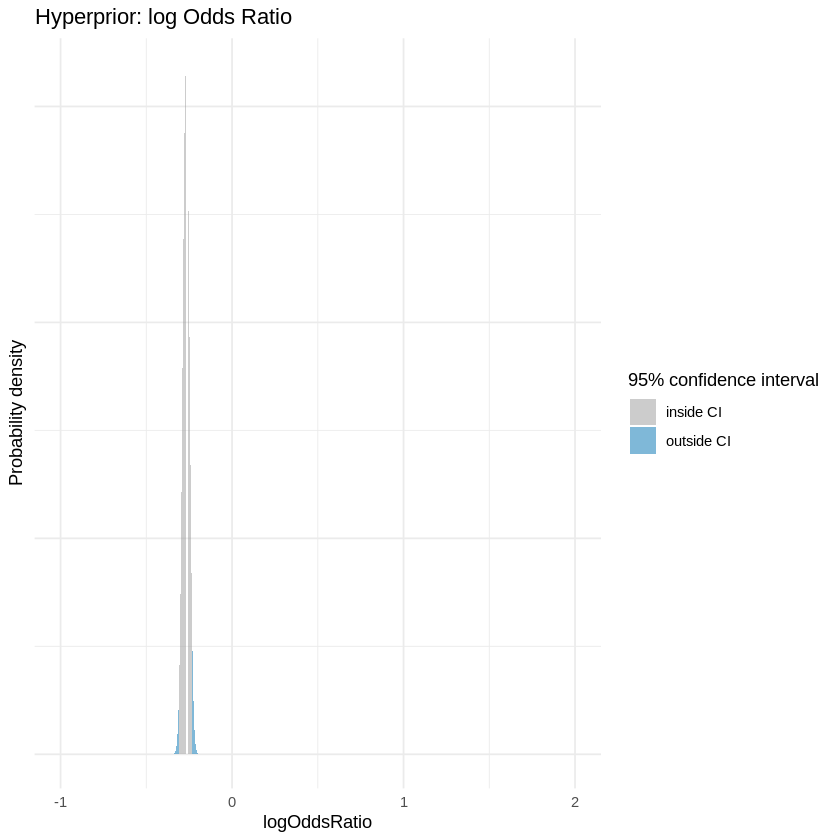

[1] "Depression"


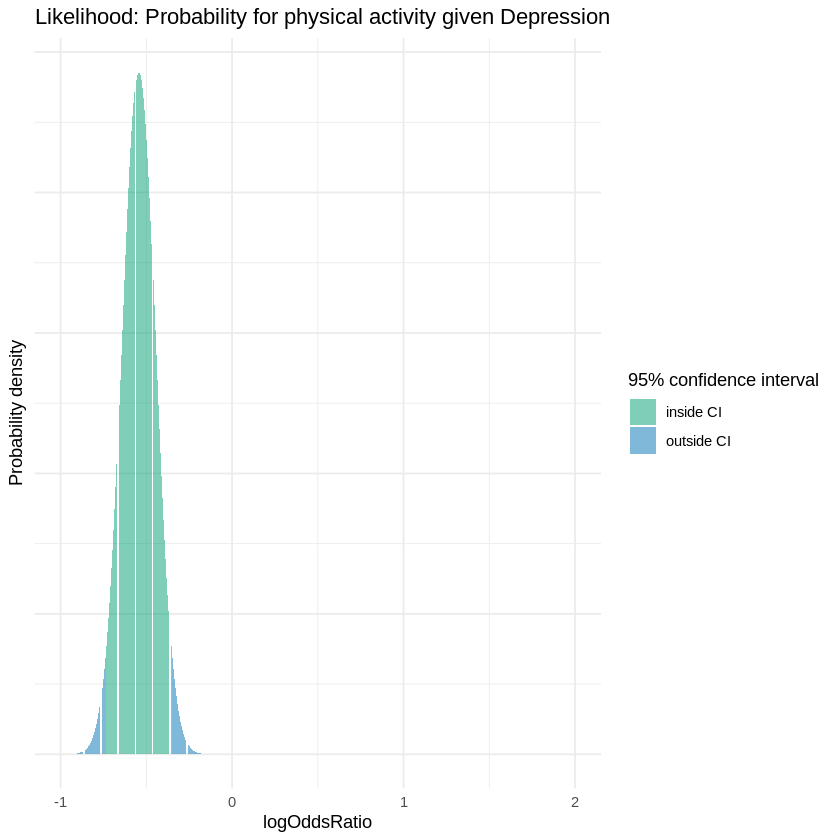

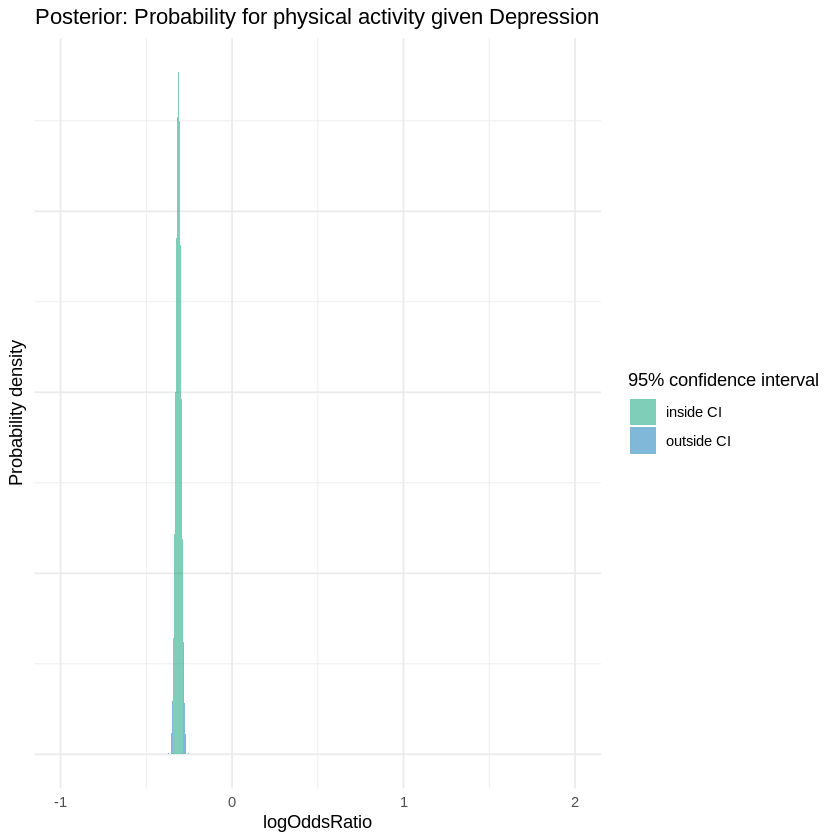

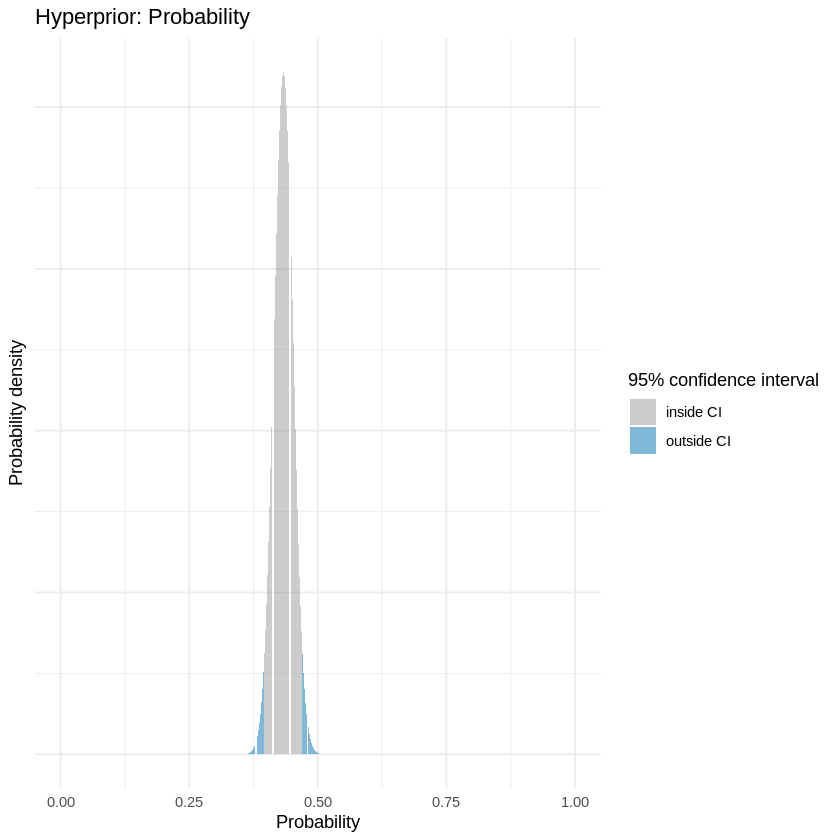

[1] "Digoxin"


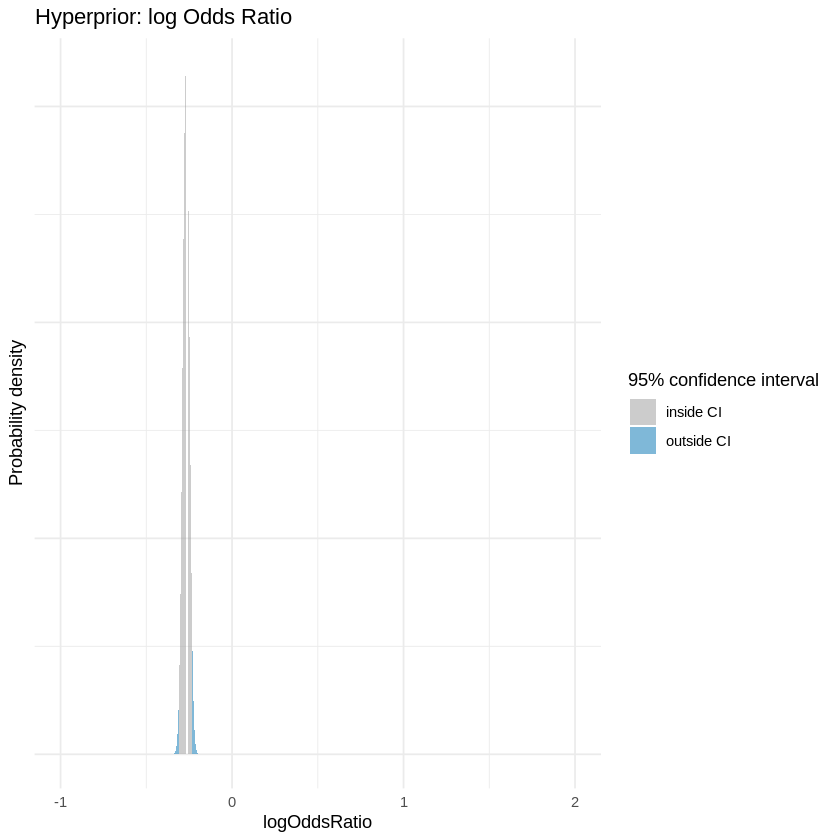

[1] "Digoxin"


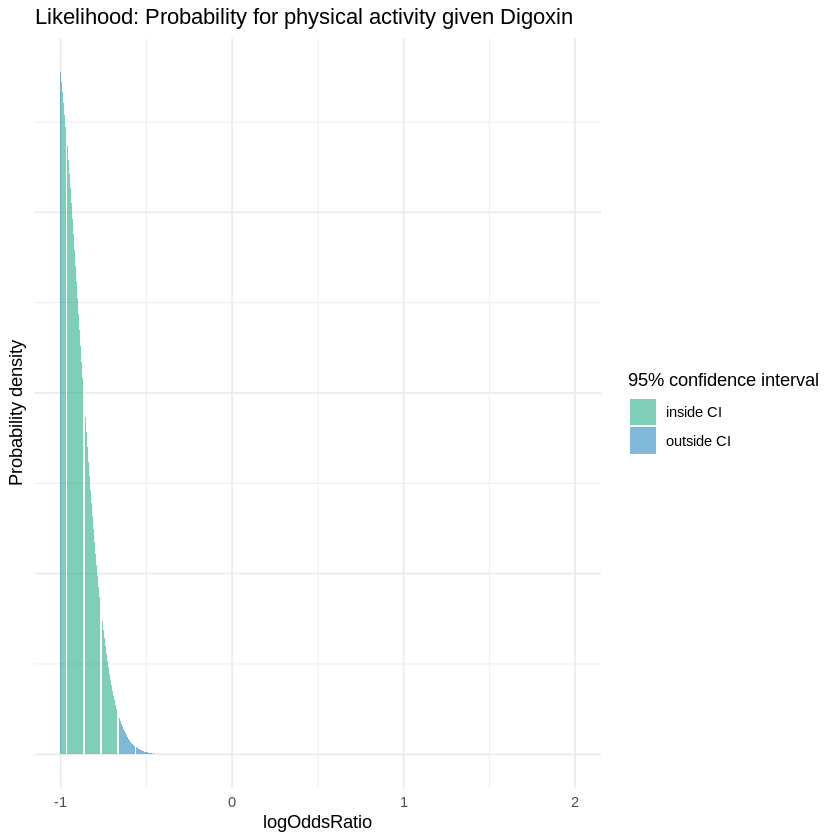

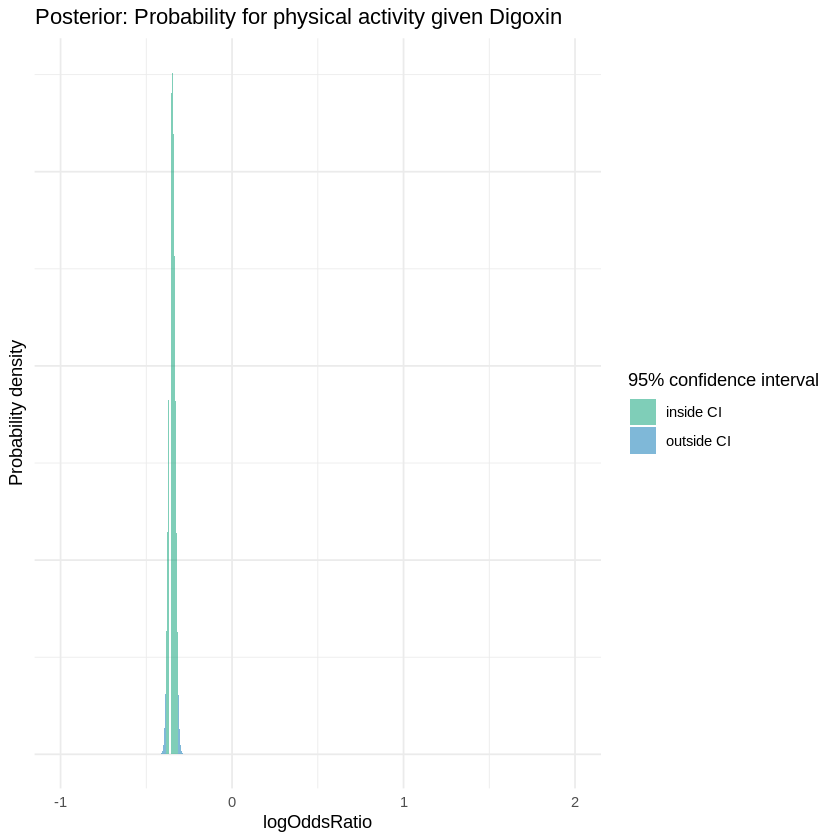

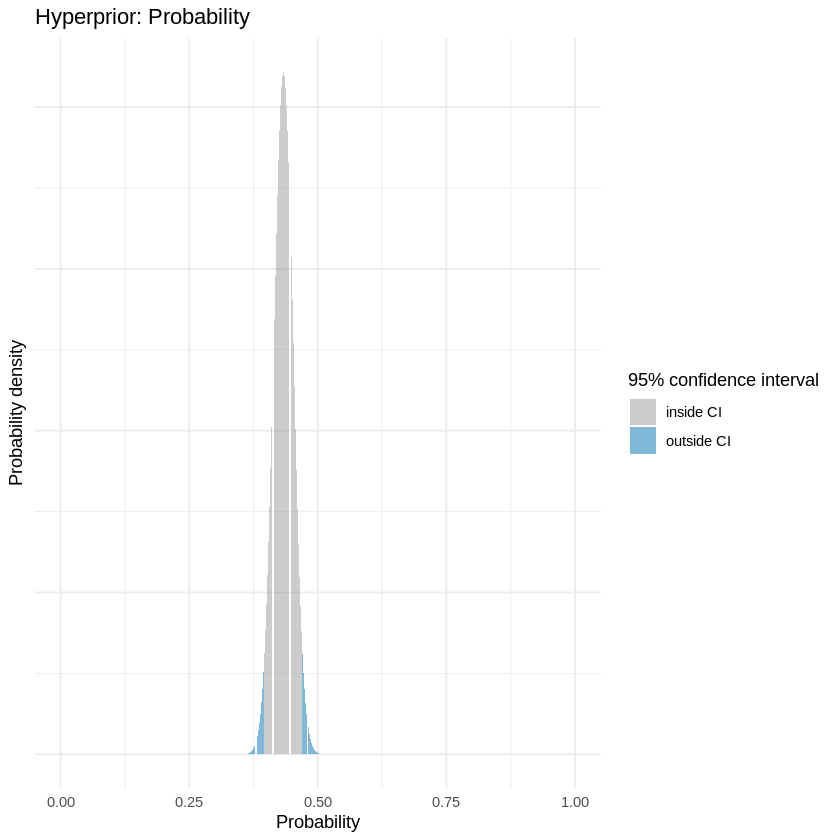

[1] "Doppler"


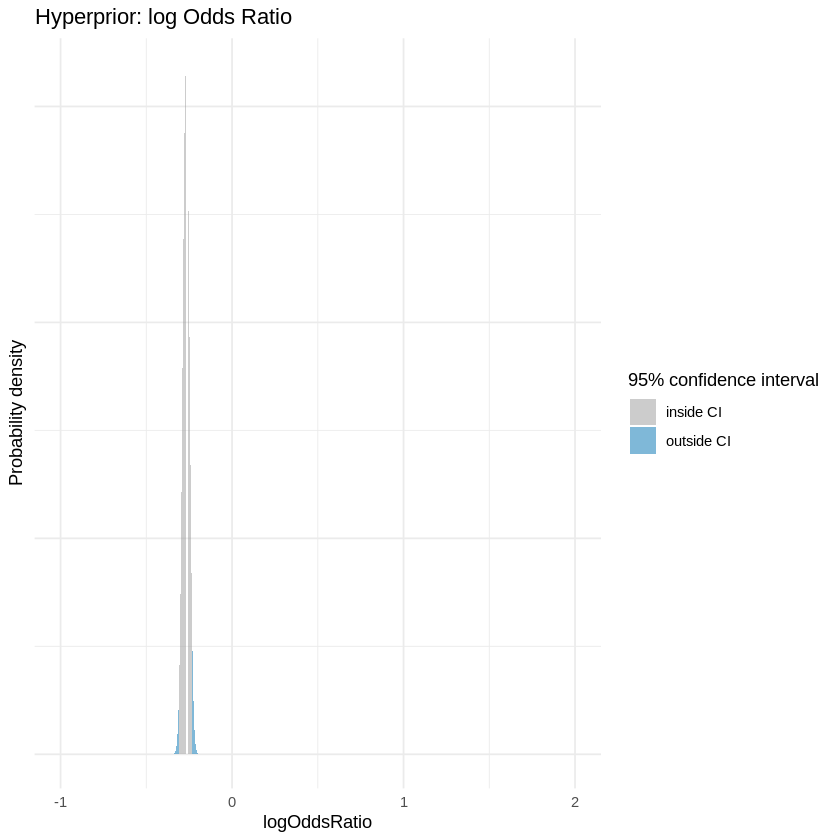

[1] "Doppler"


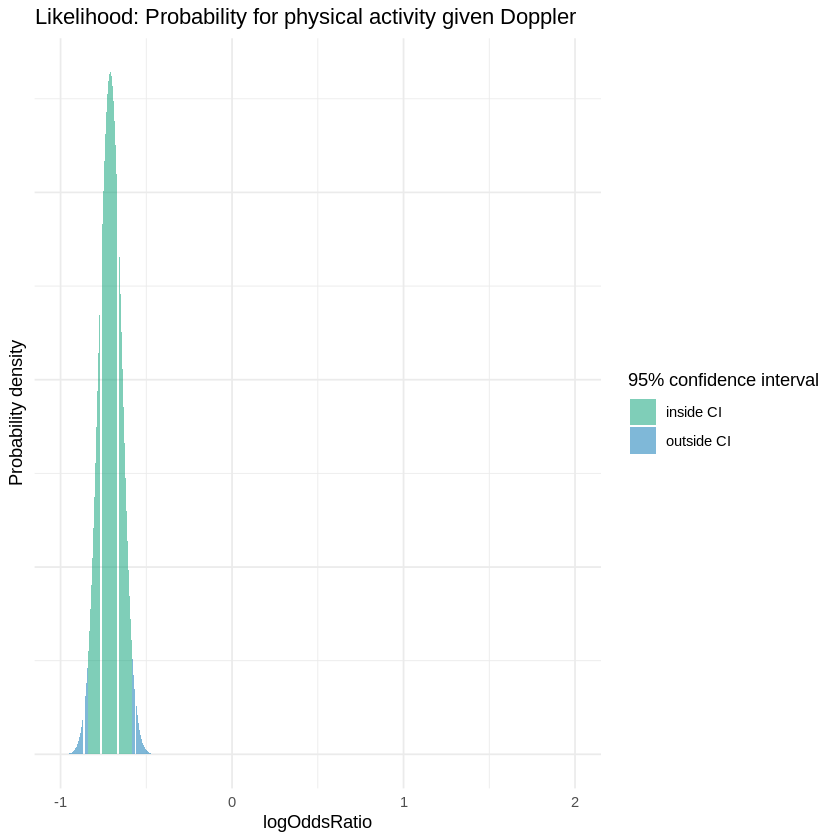

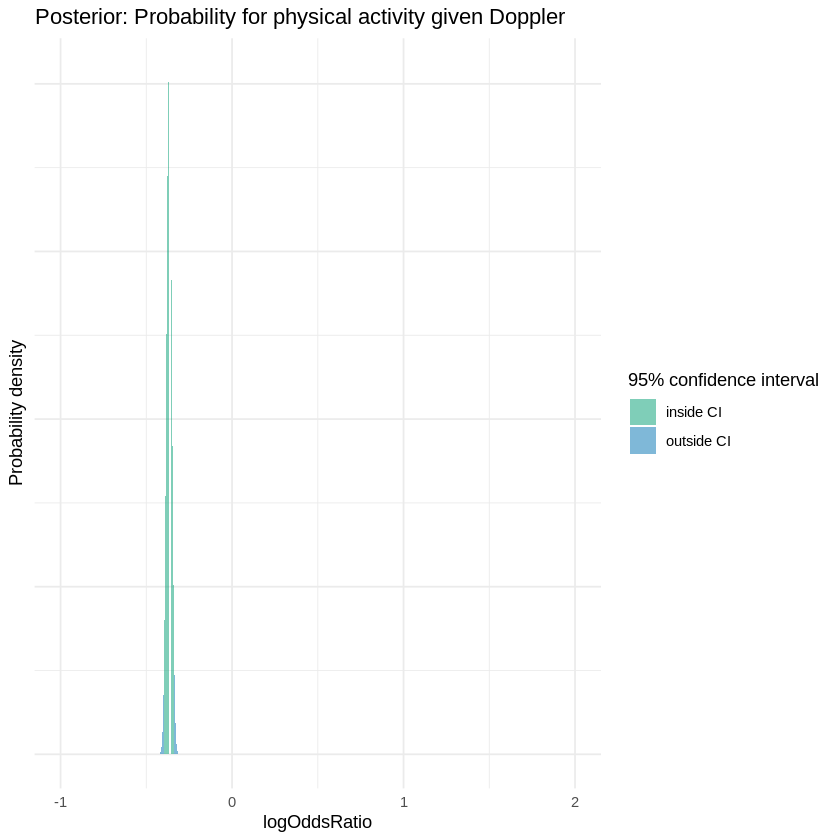

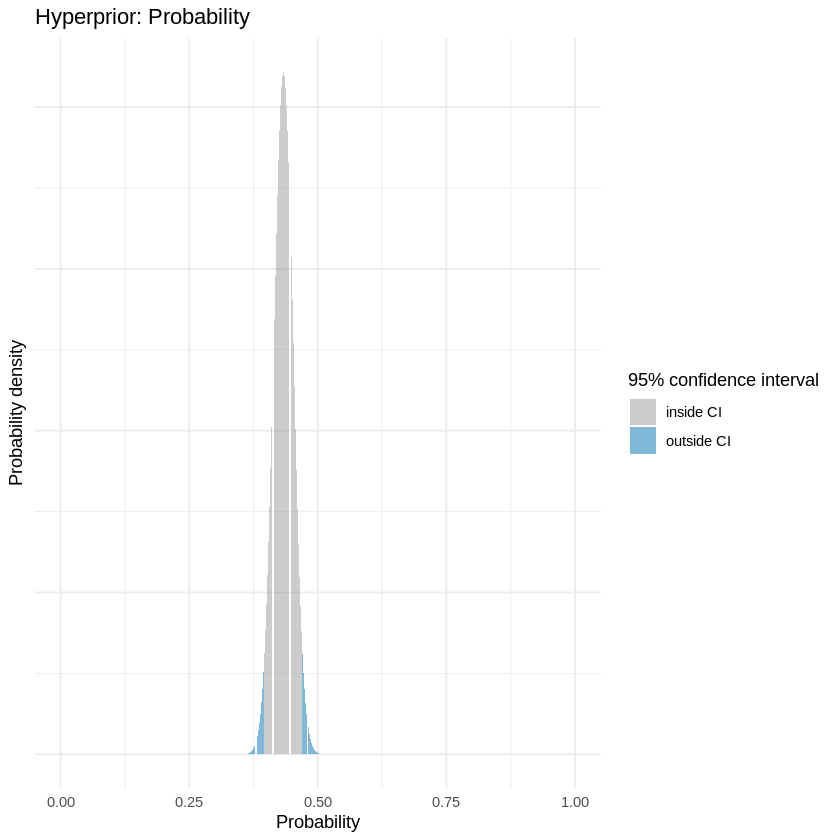

[1] "Dysphoria"


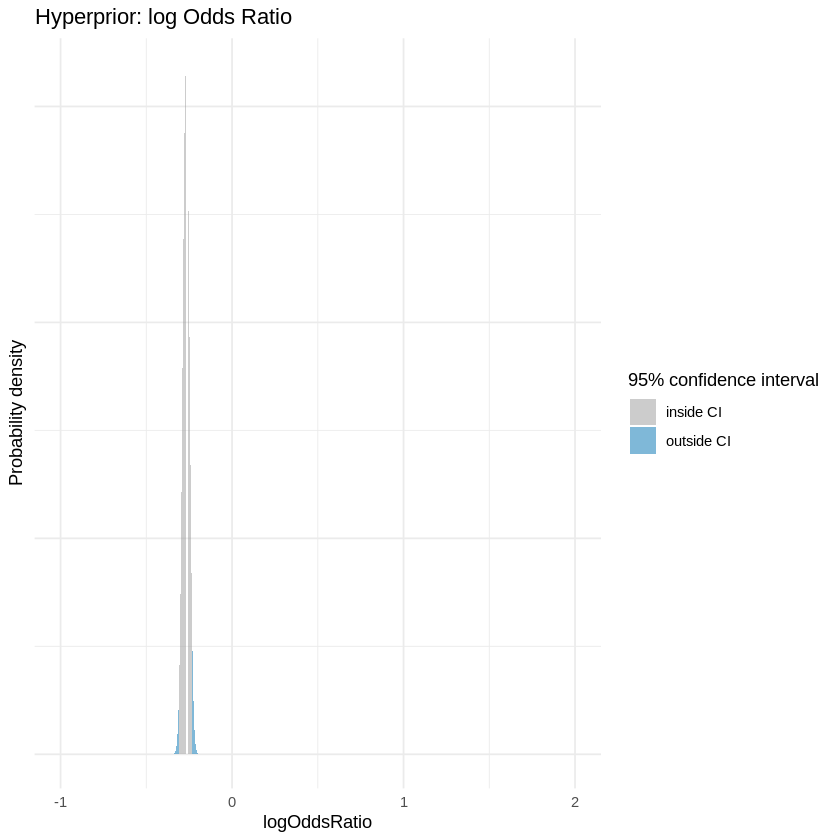

[1] "Dysphoria"


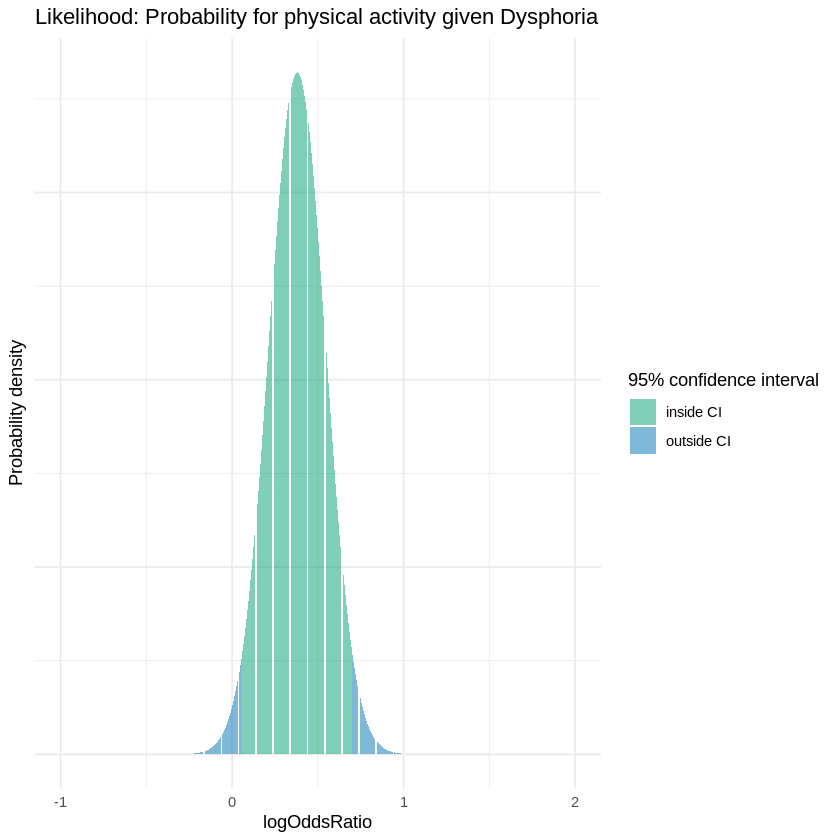

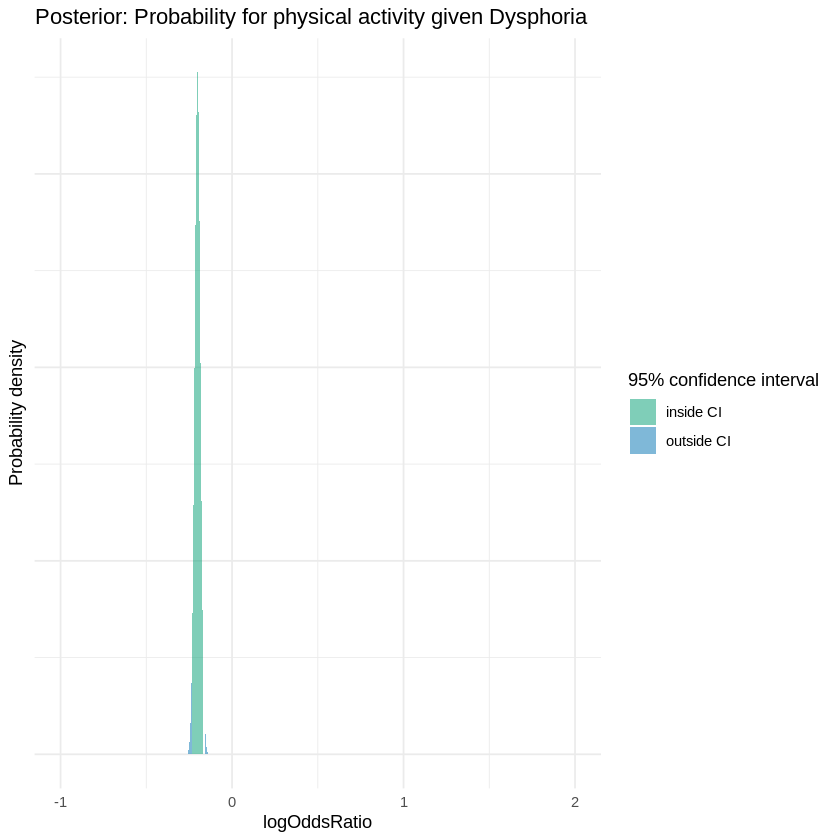

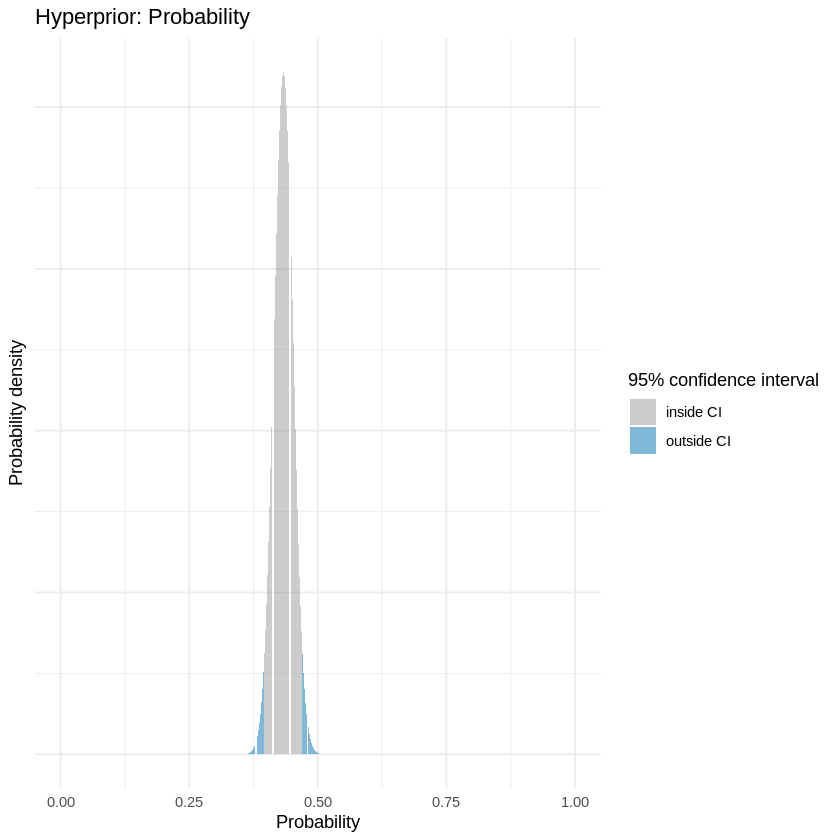

[1] "Employment"


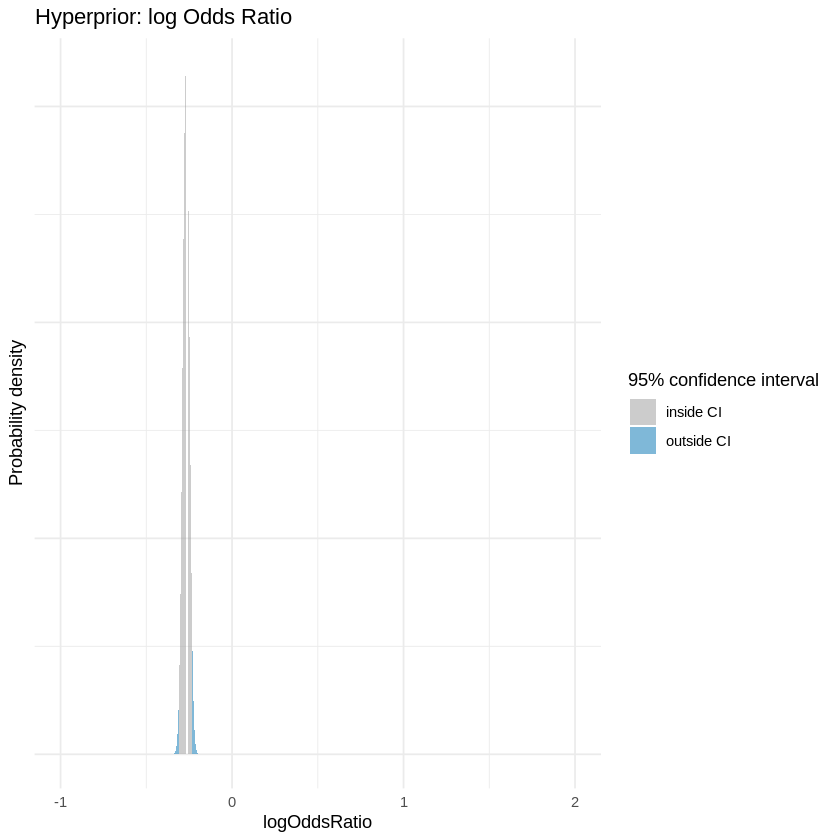

[1] "Employment"


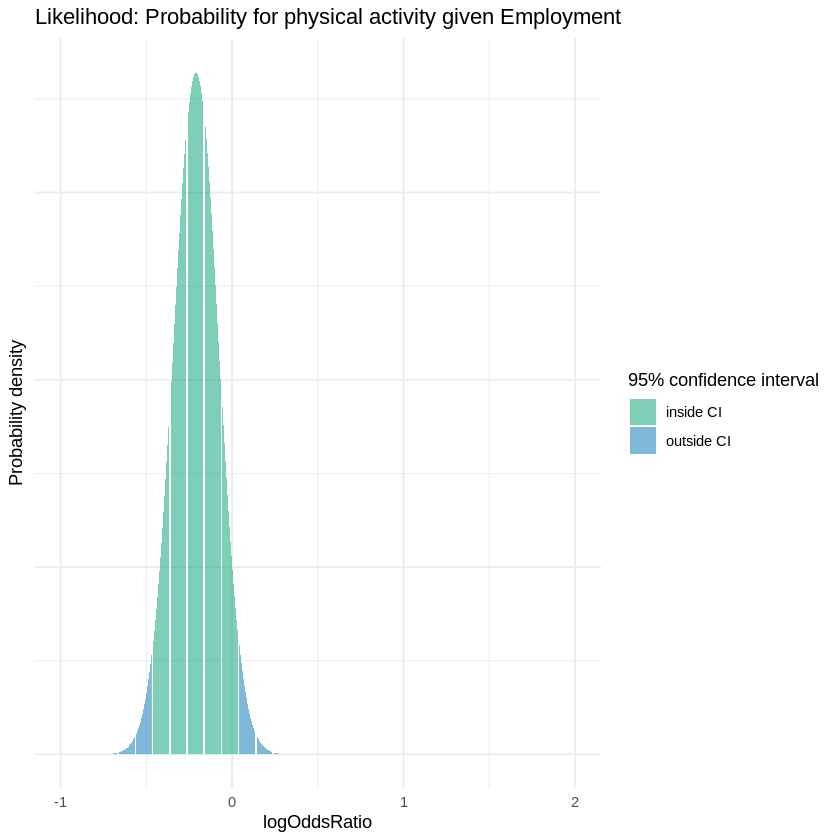

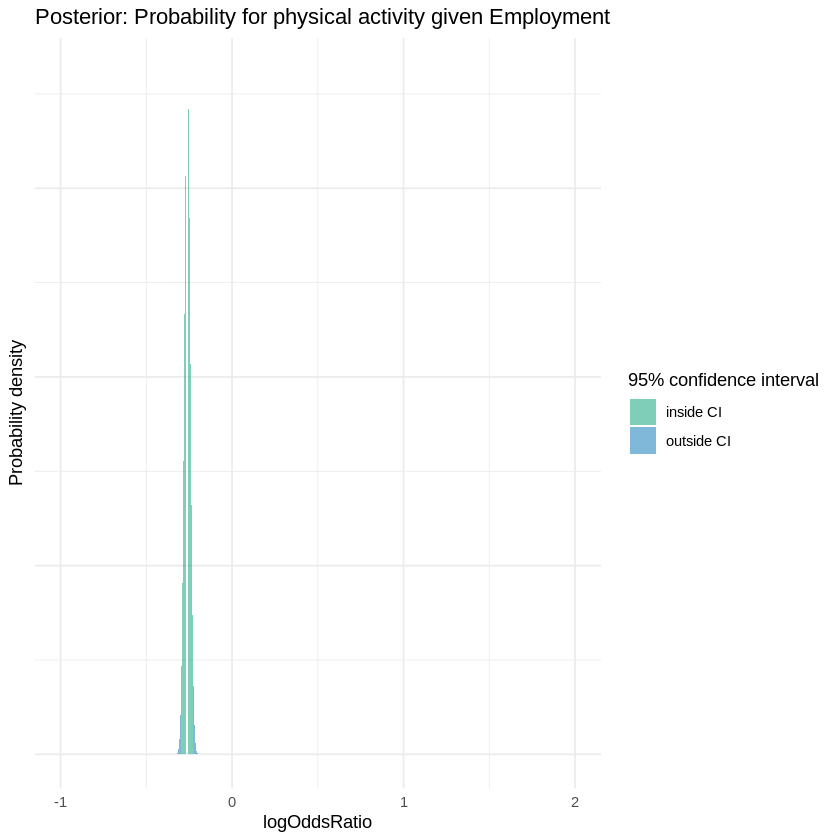

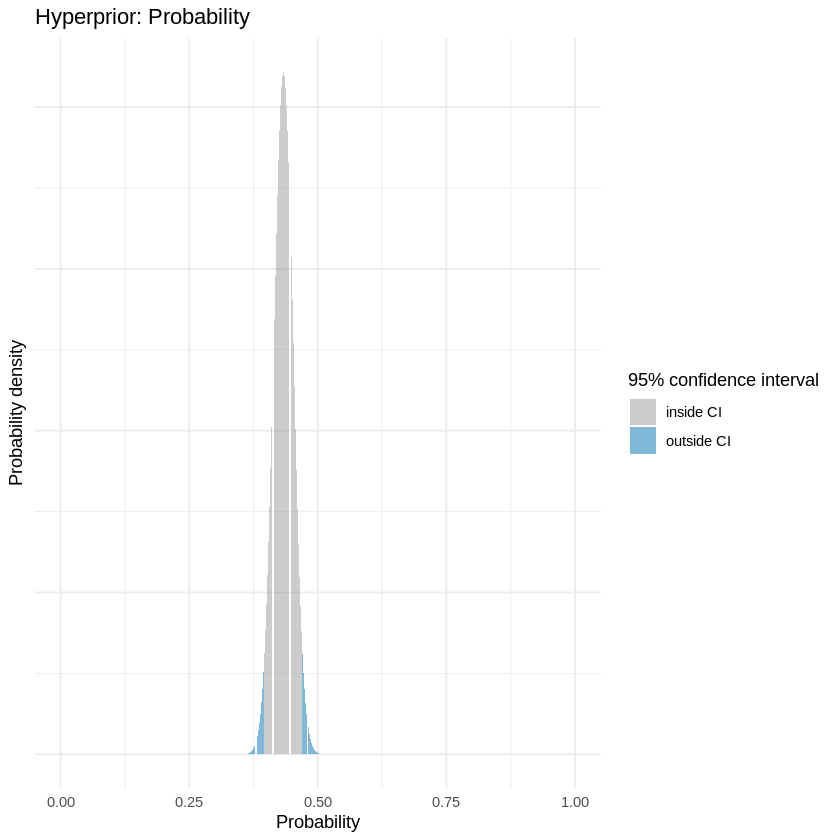

[1] "Ethnicity"


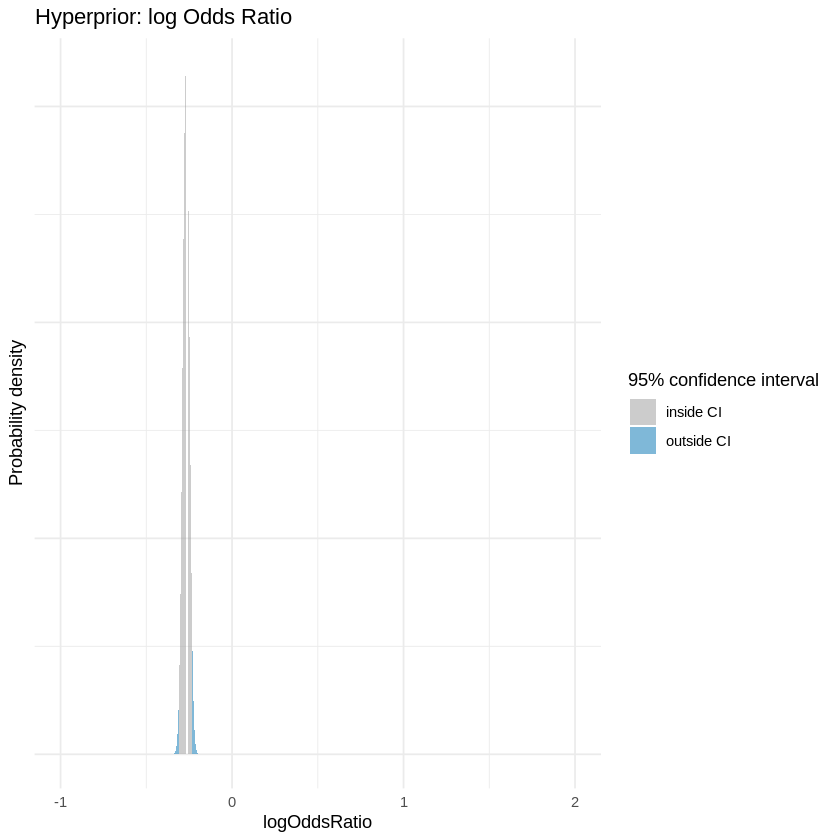

[1] "Ethnicity"


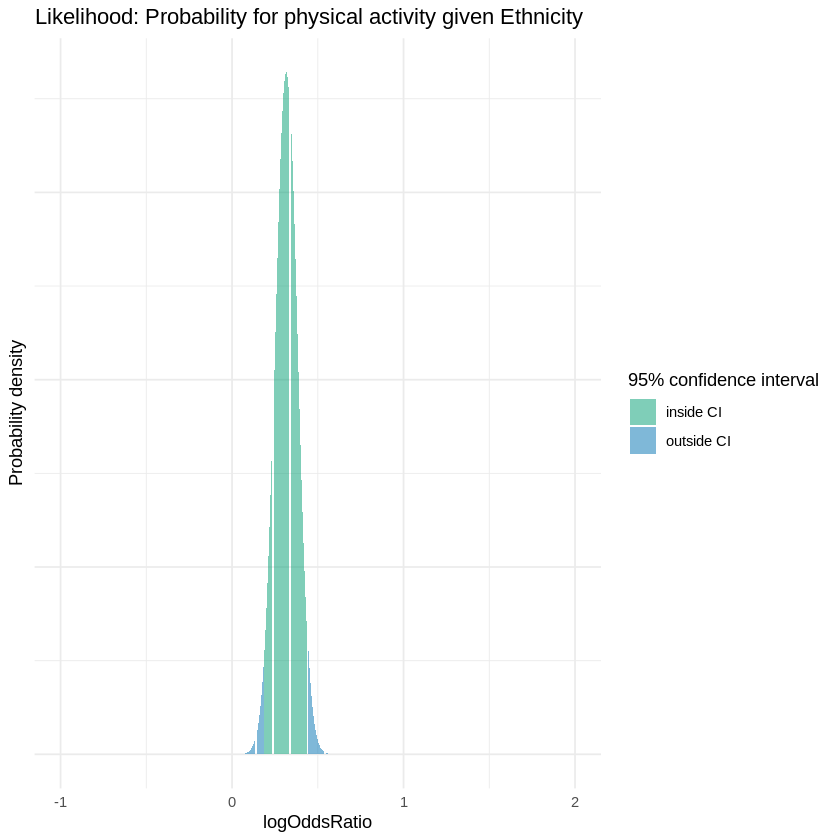

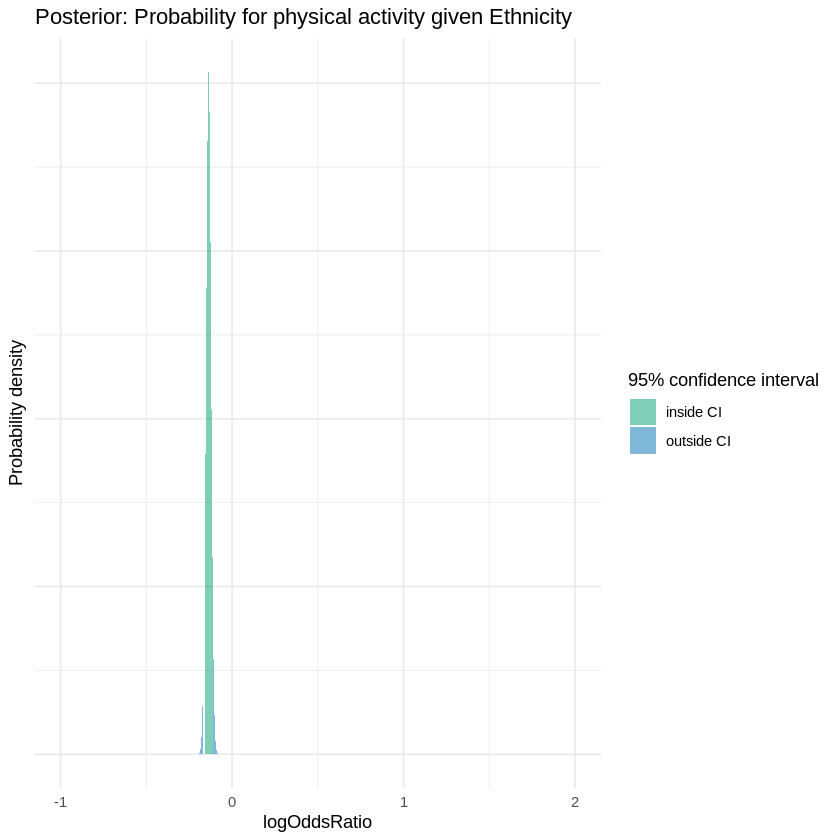

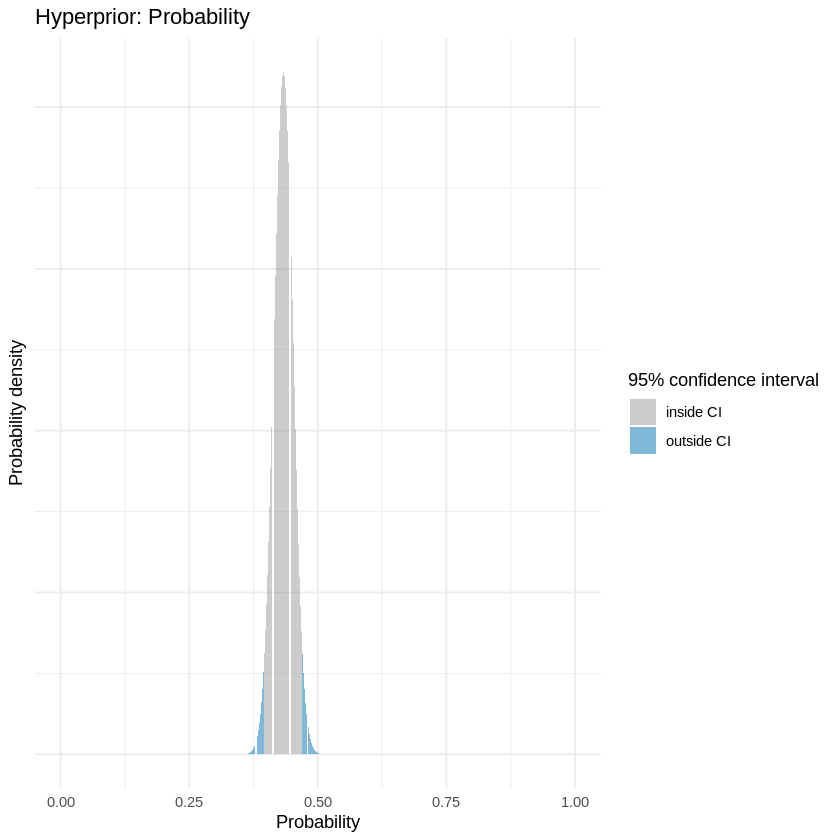

[1] "PhysicalFunctioning"


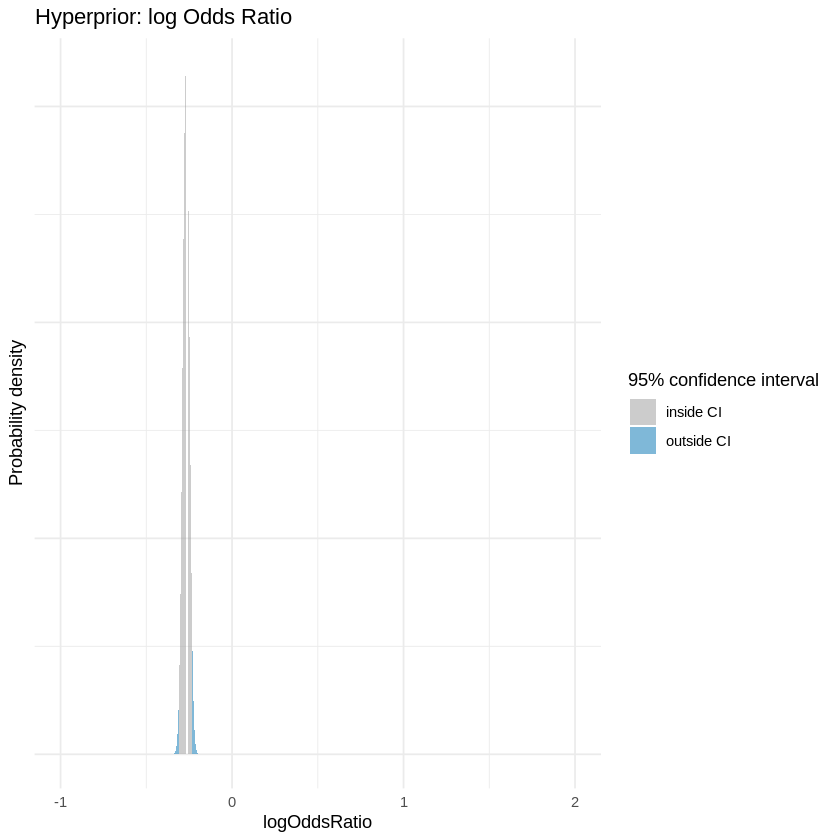

[1] "PhysicalFunctioning"


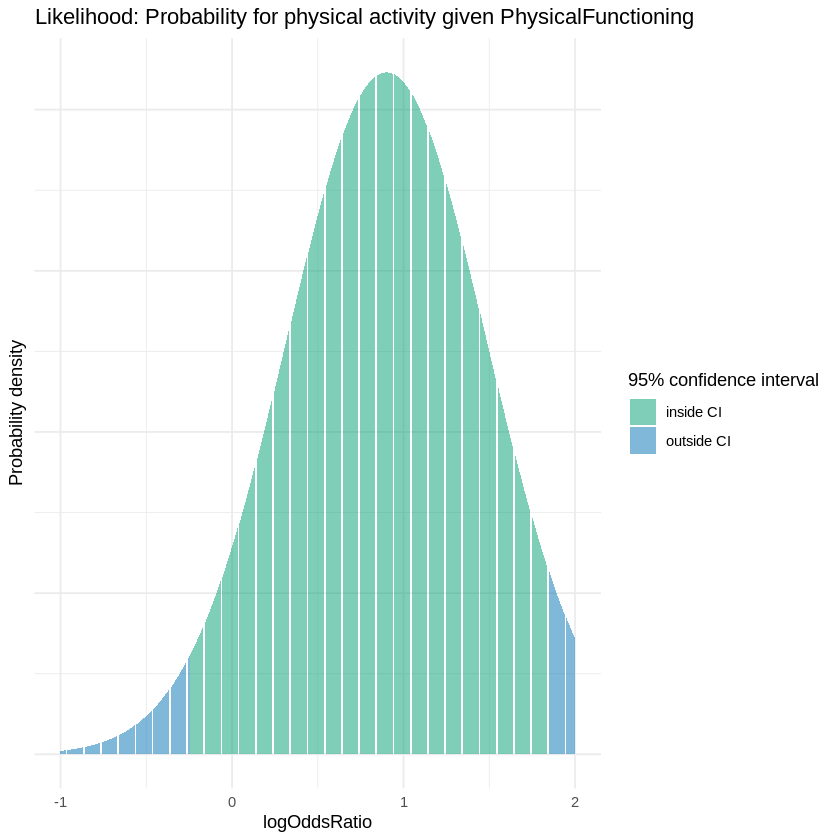

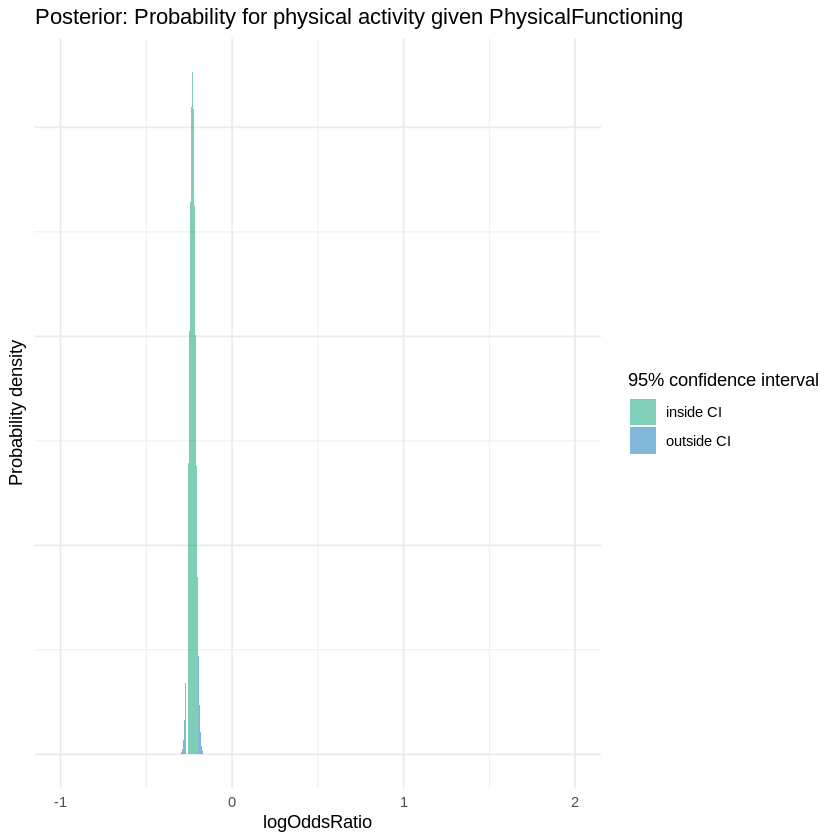

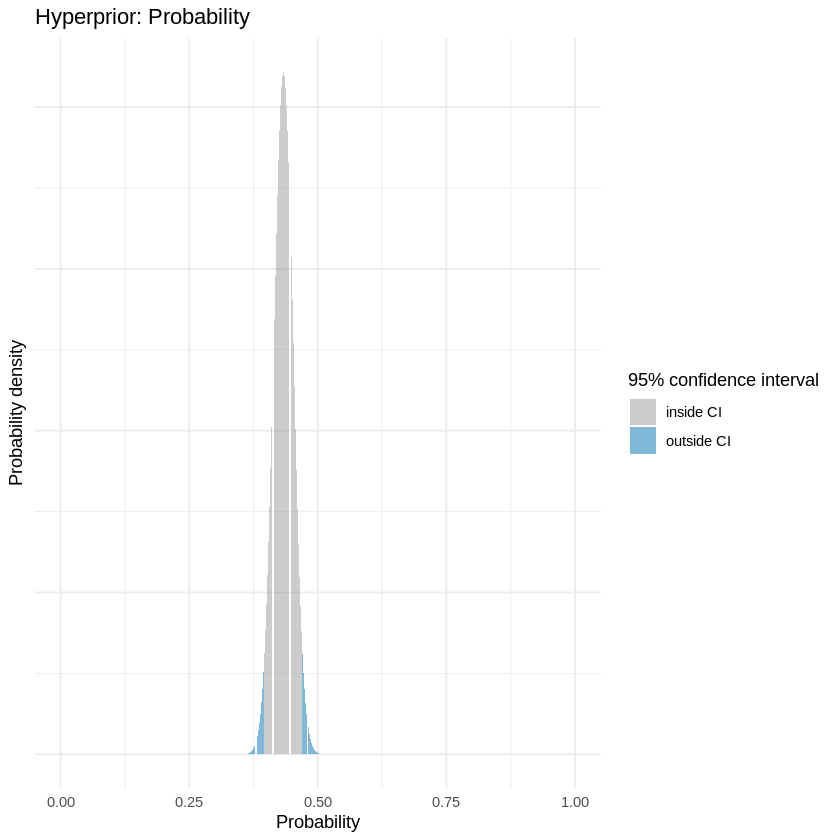

[1] "HFDuration"


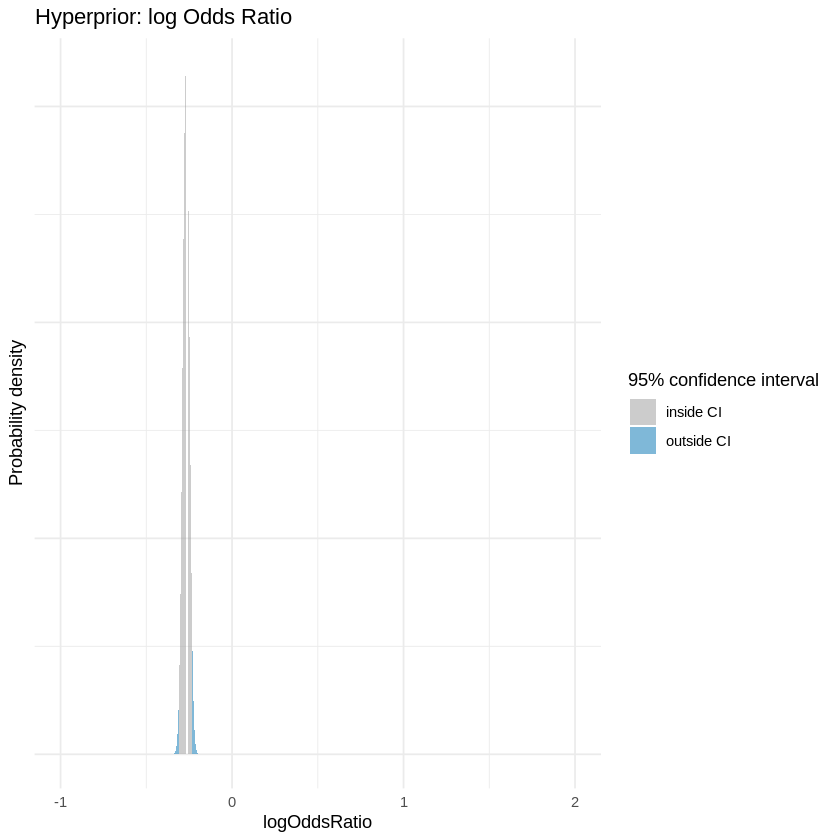

[1] "HFDuration"


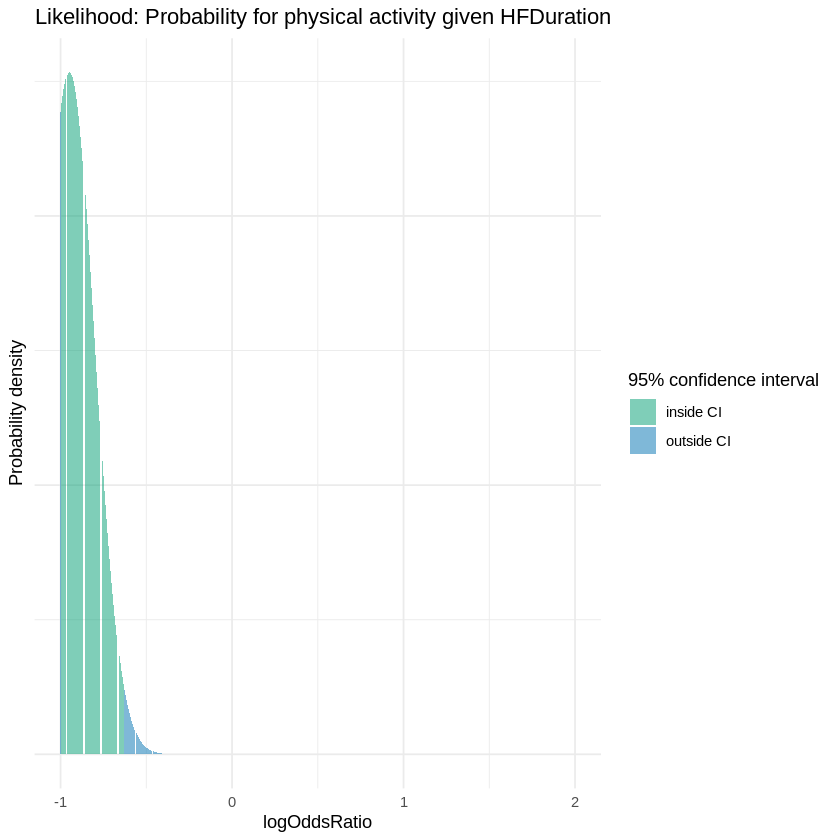

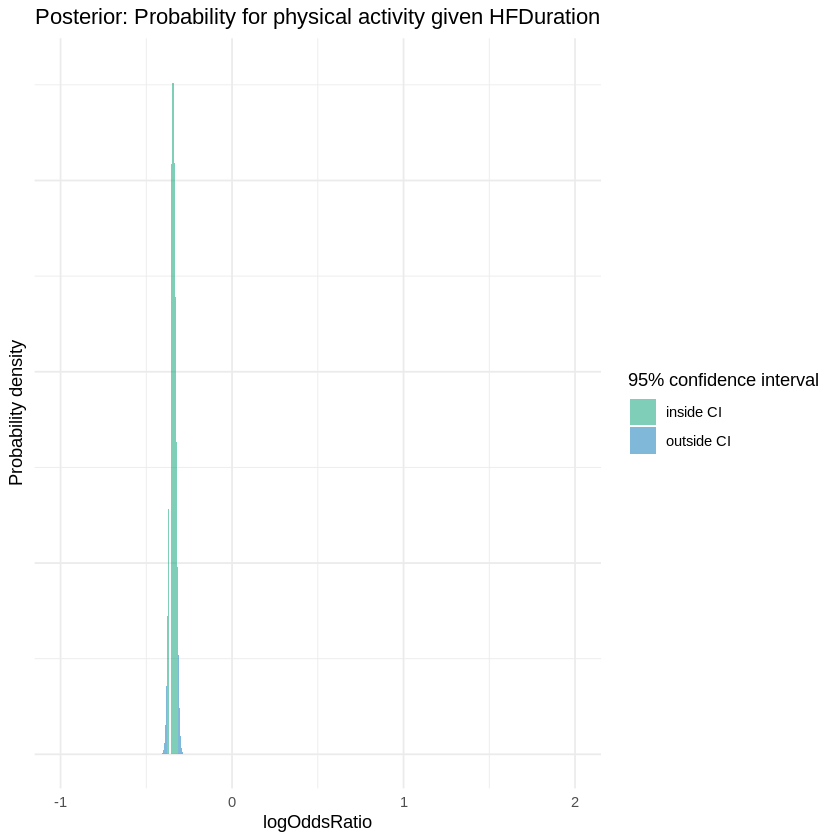

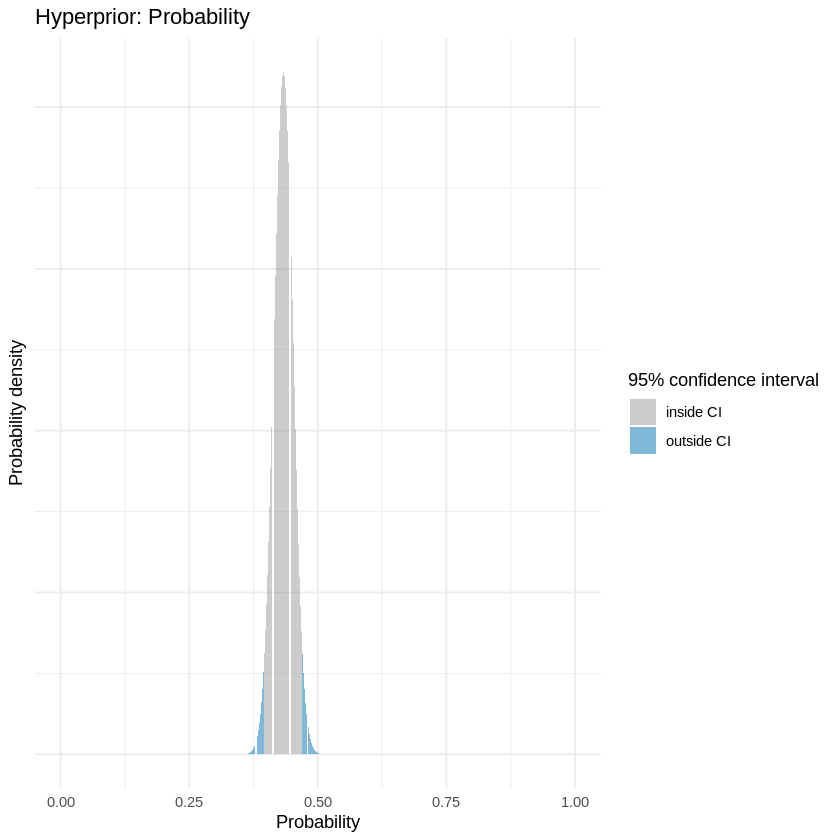

[1] "HFrEF_Yes"


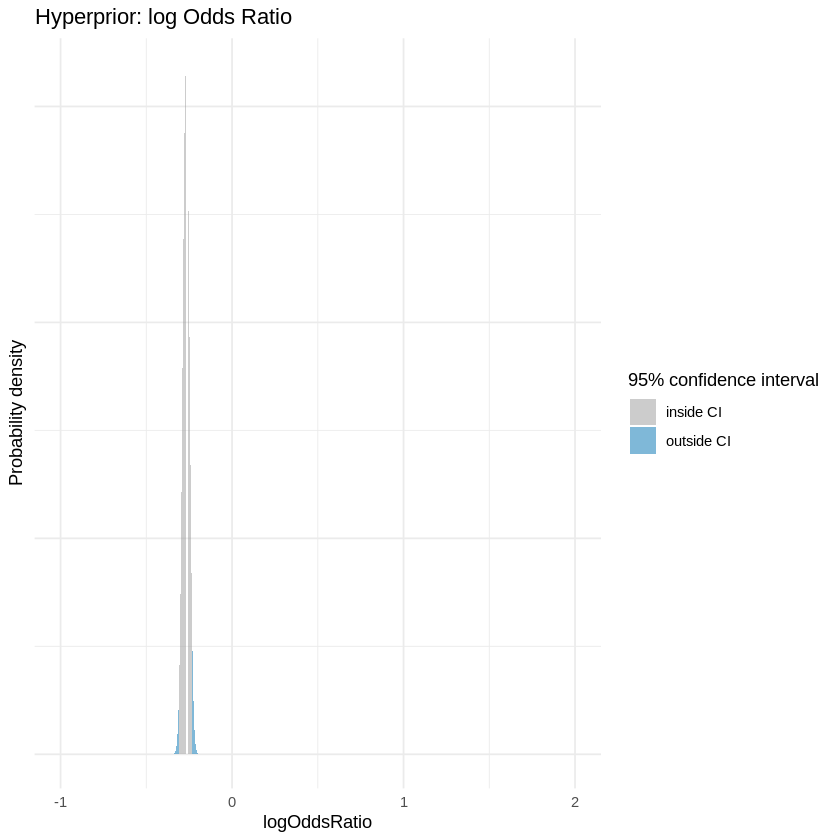

[1] "HFrEF_Yes"


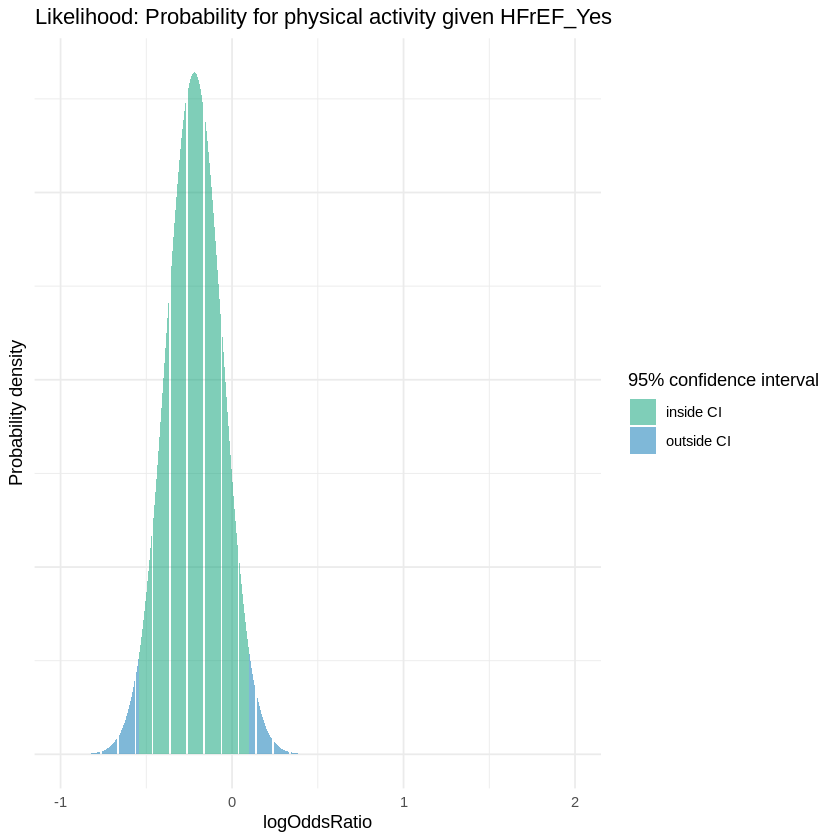

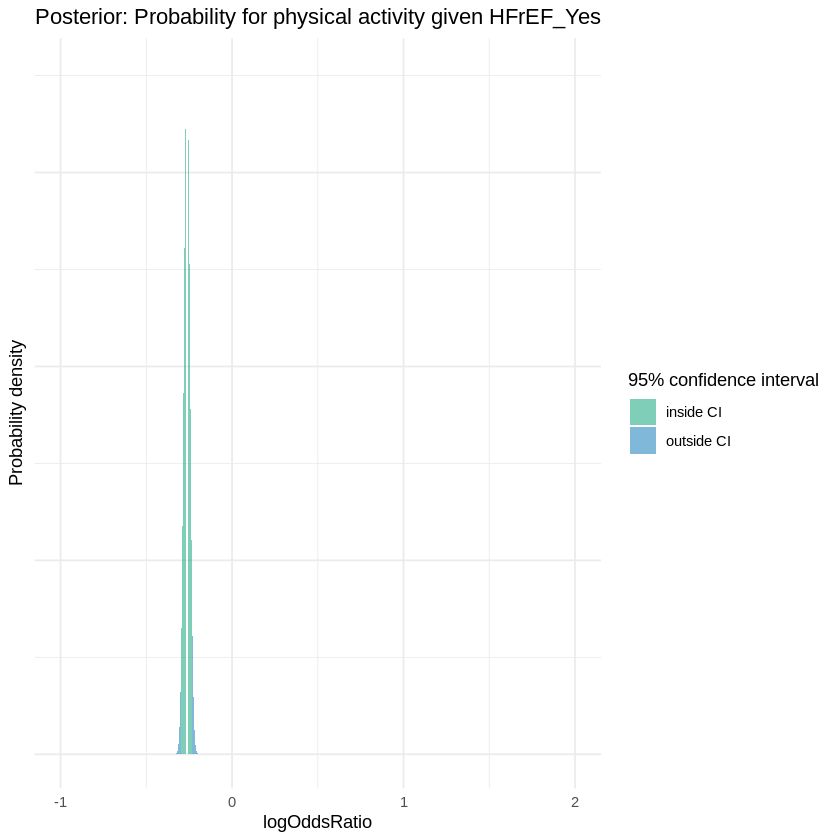

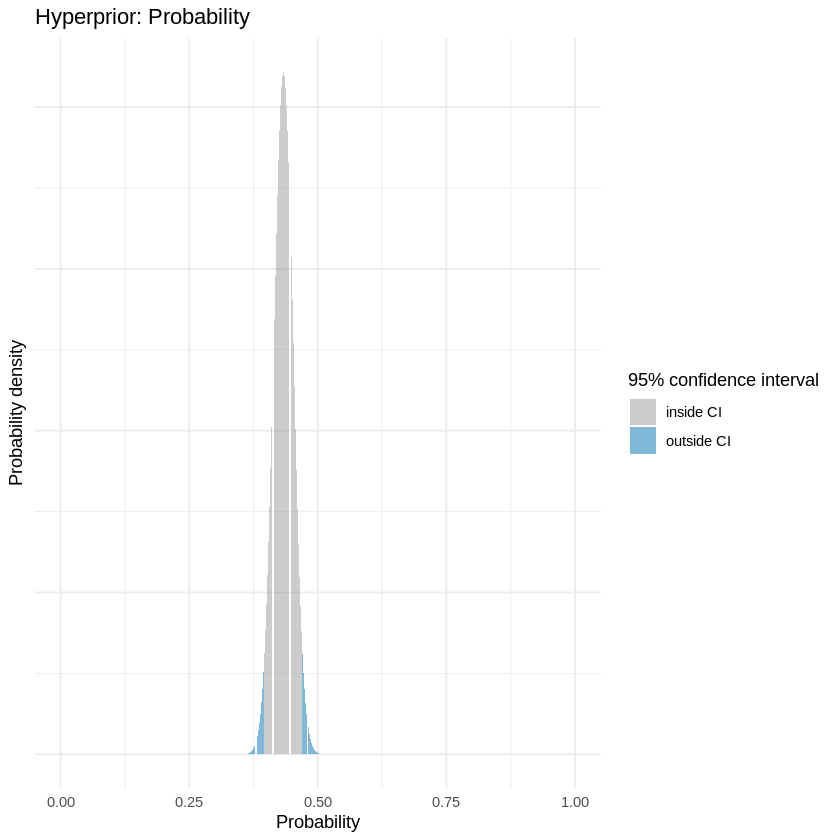

[1] "highproBNP"


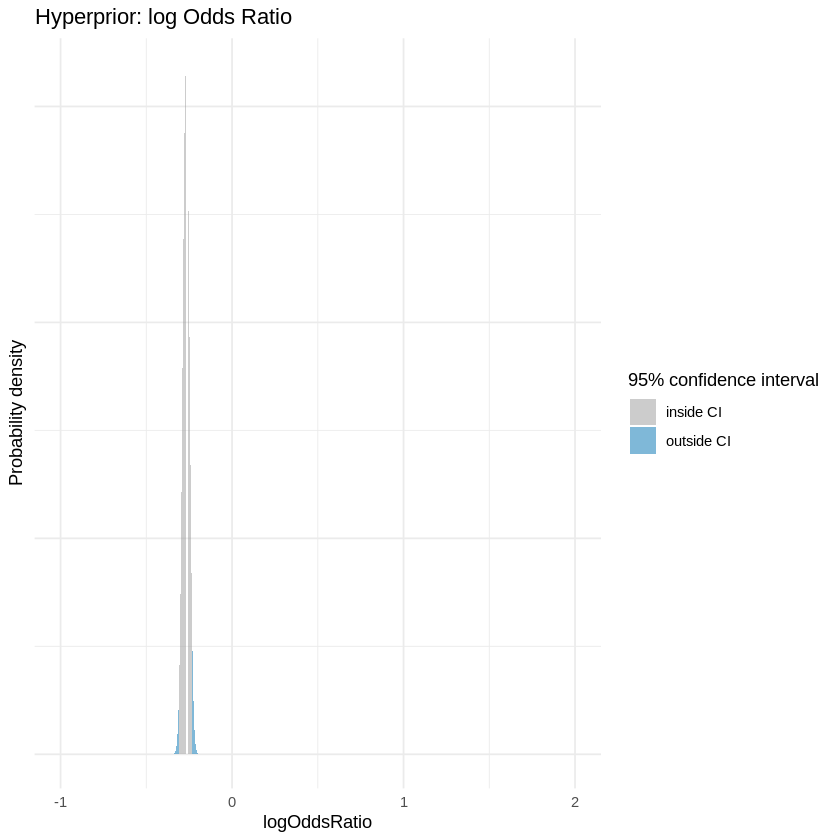

[1] "highproBNP"


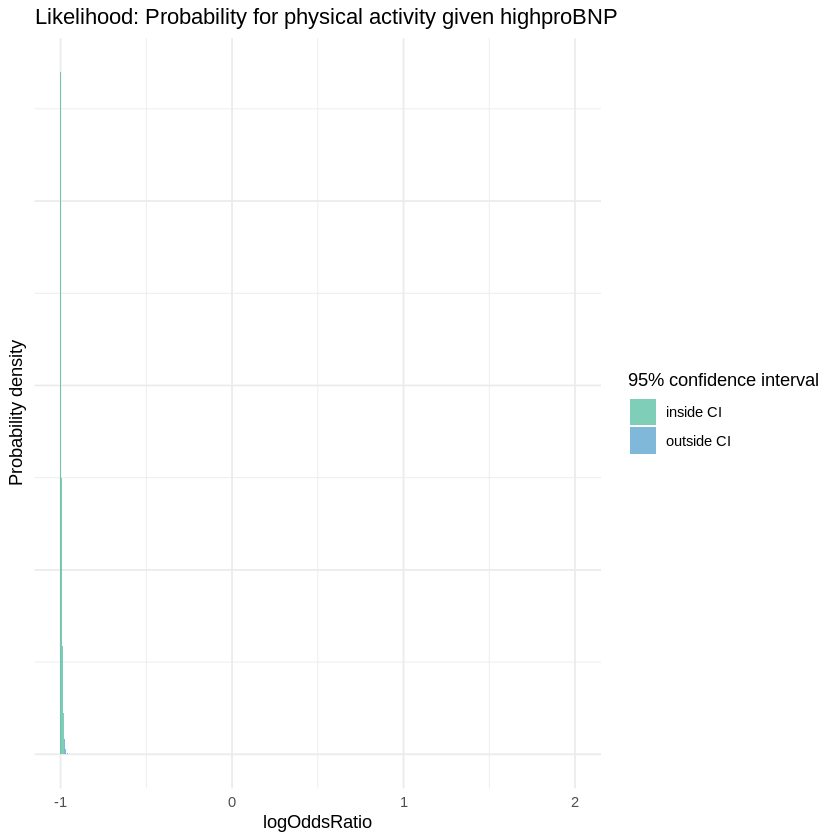

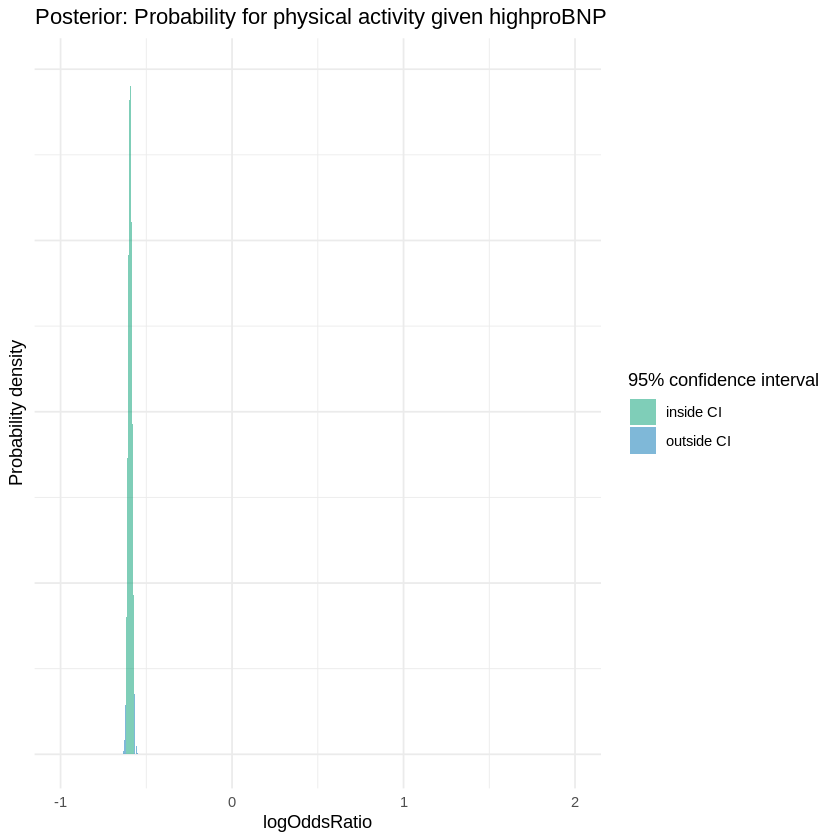

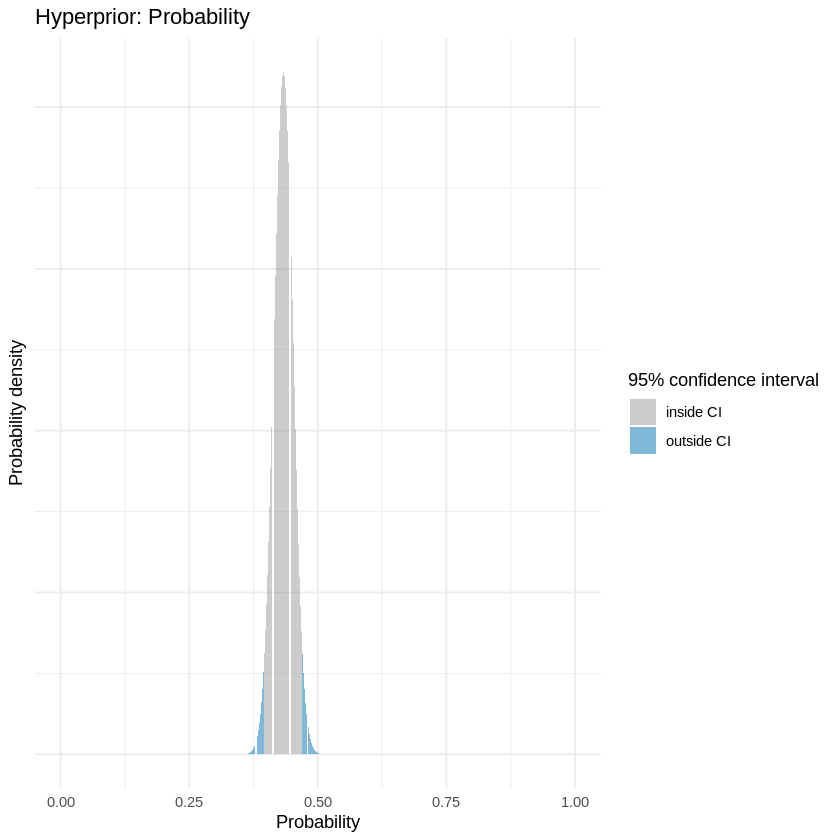

[1] "Hostility"


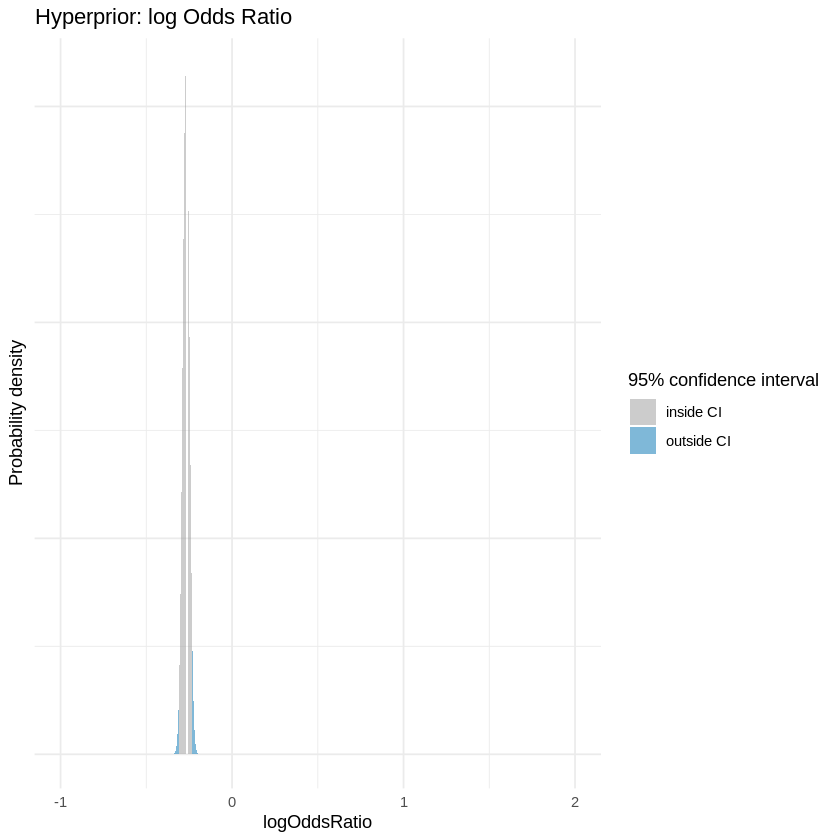

[1] "Hostility"


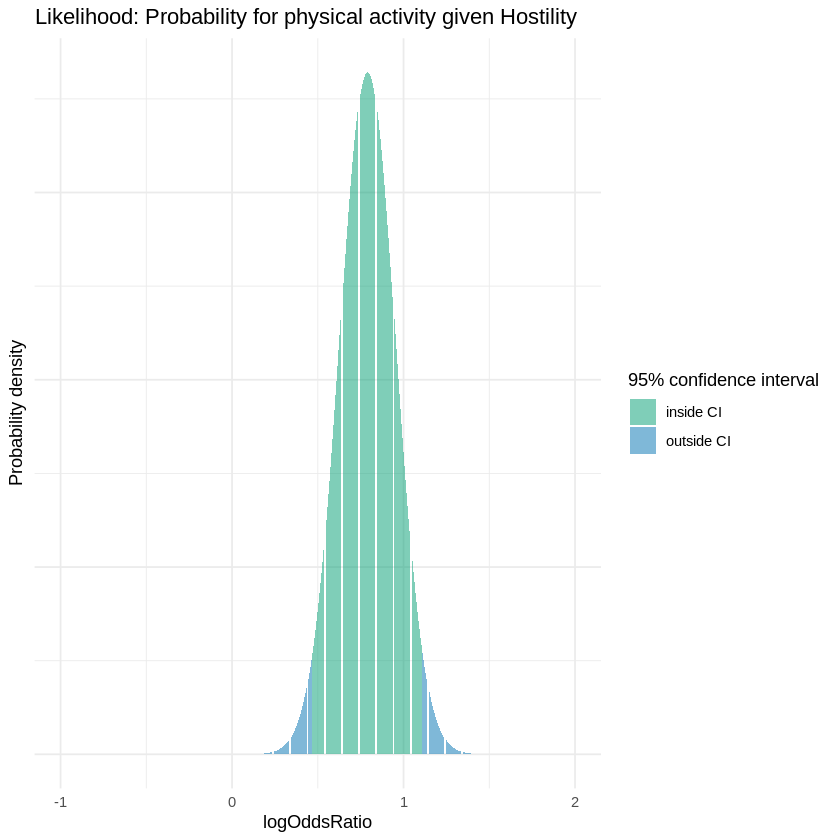

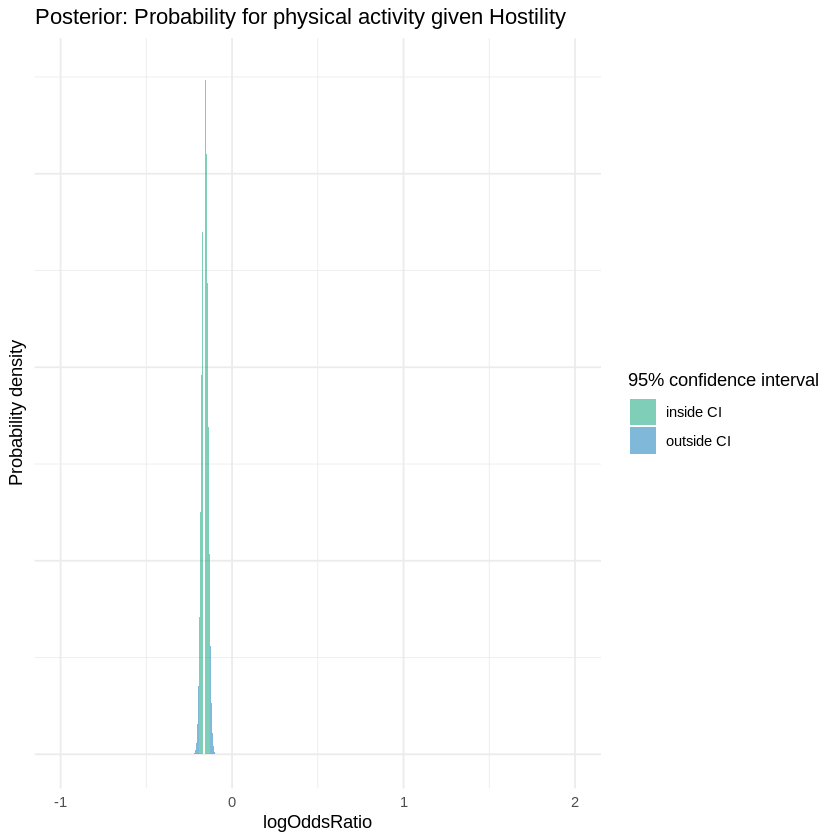

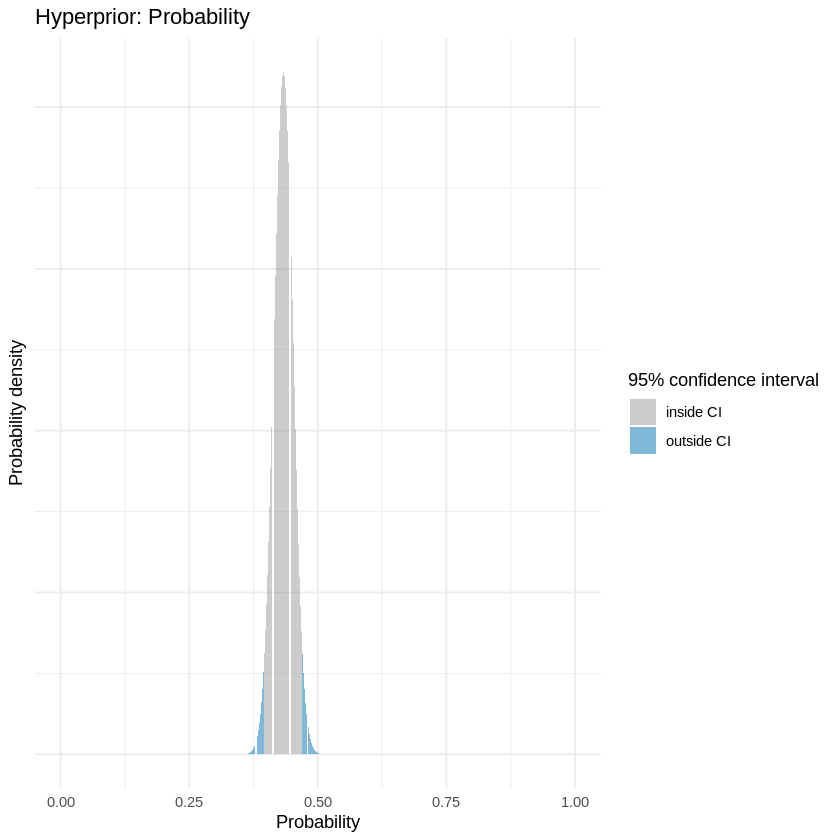

[1] "Income"


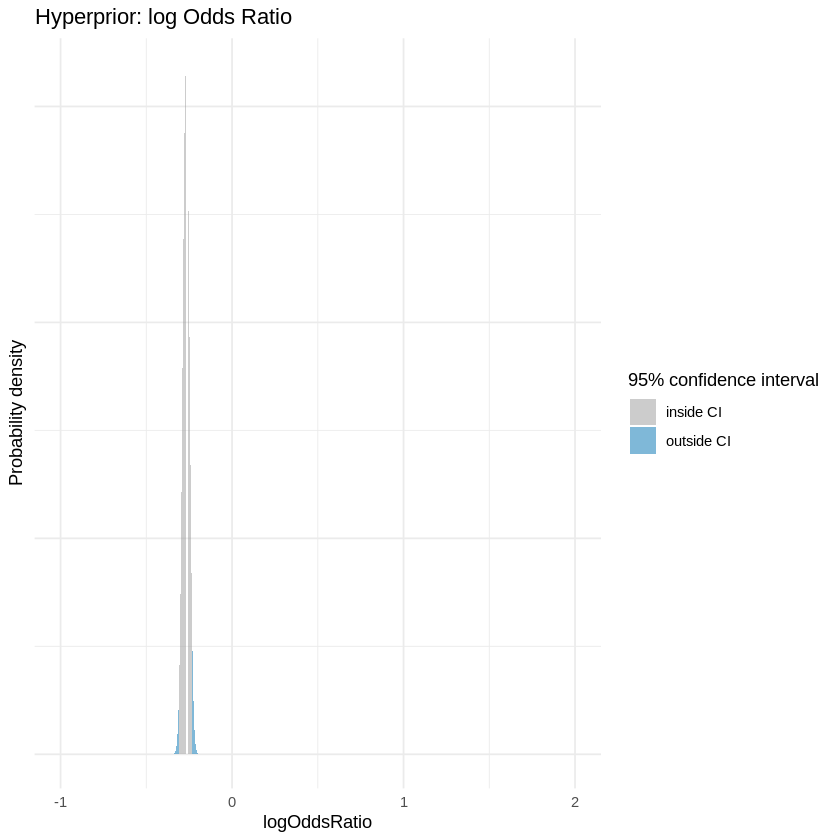

[1] "Income"


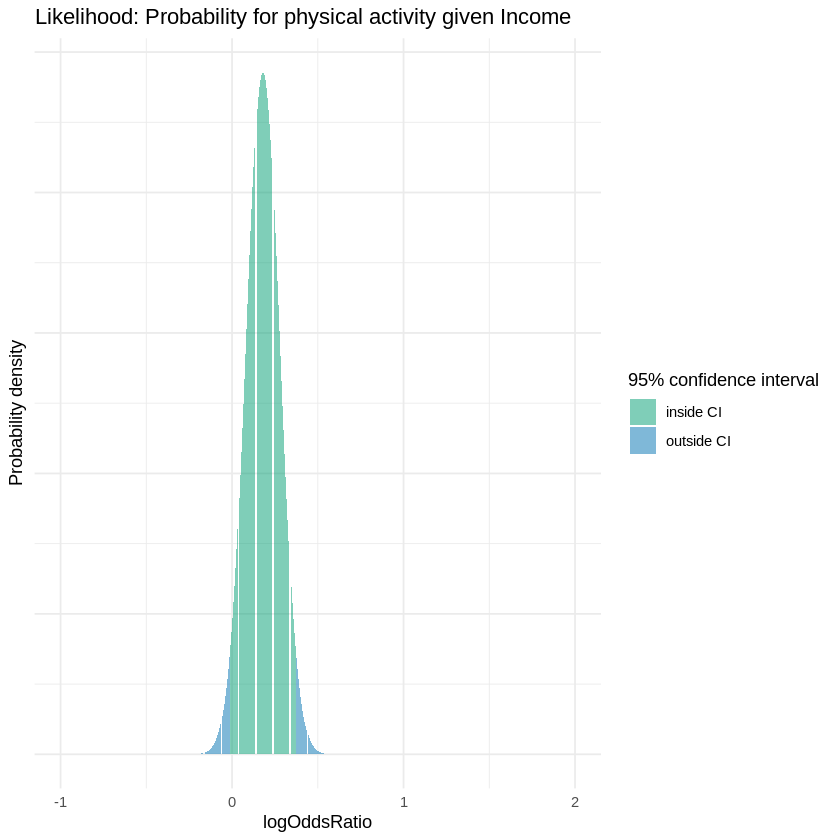

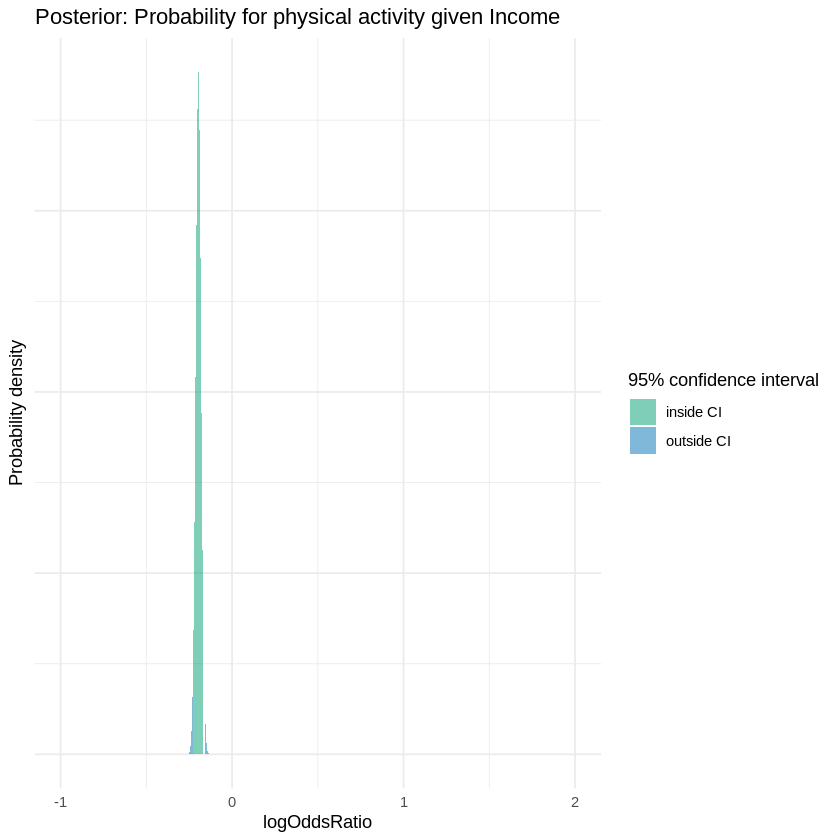

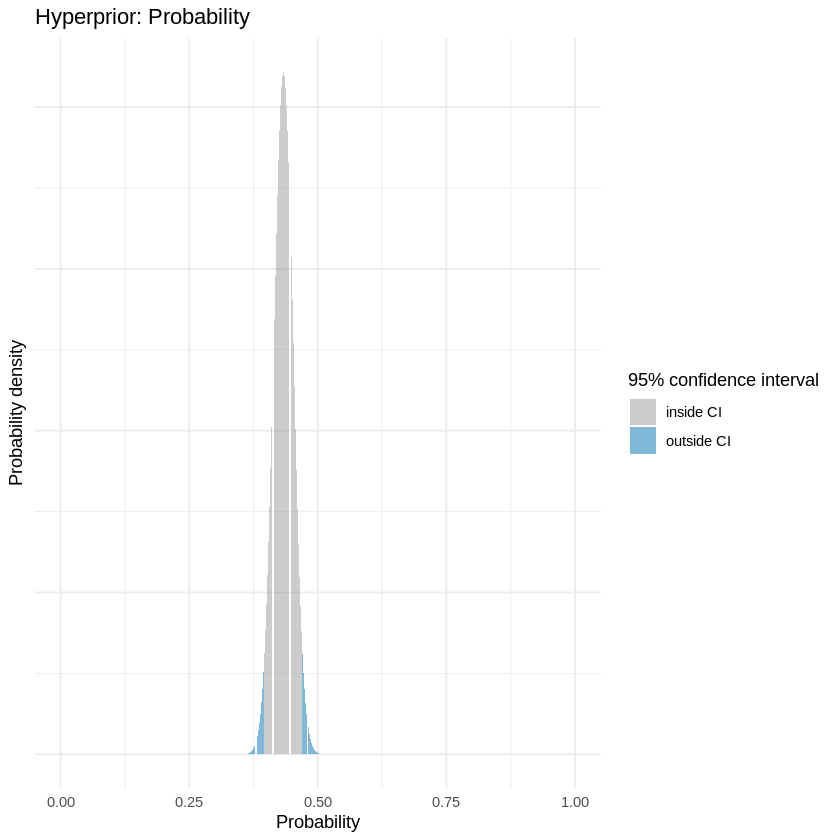

[1] "LAV"


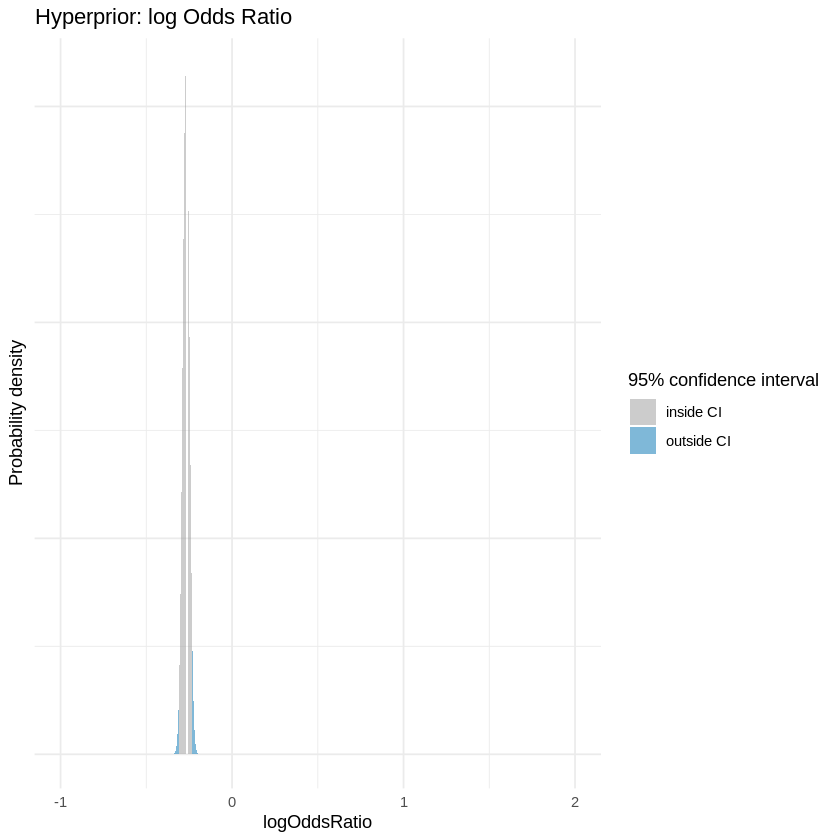

[1] "LAV"


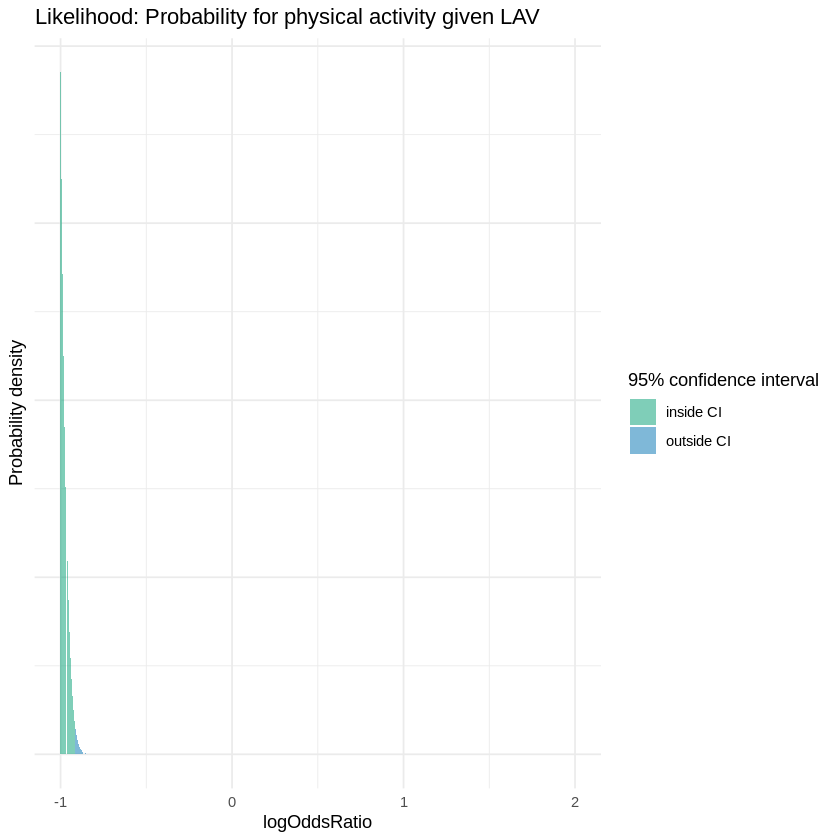

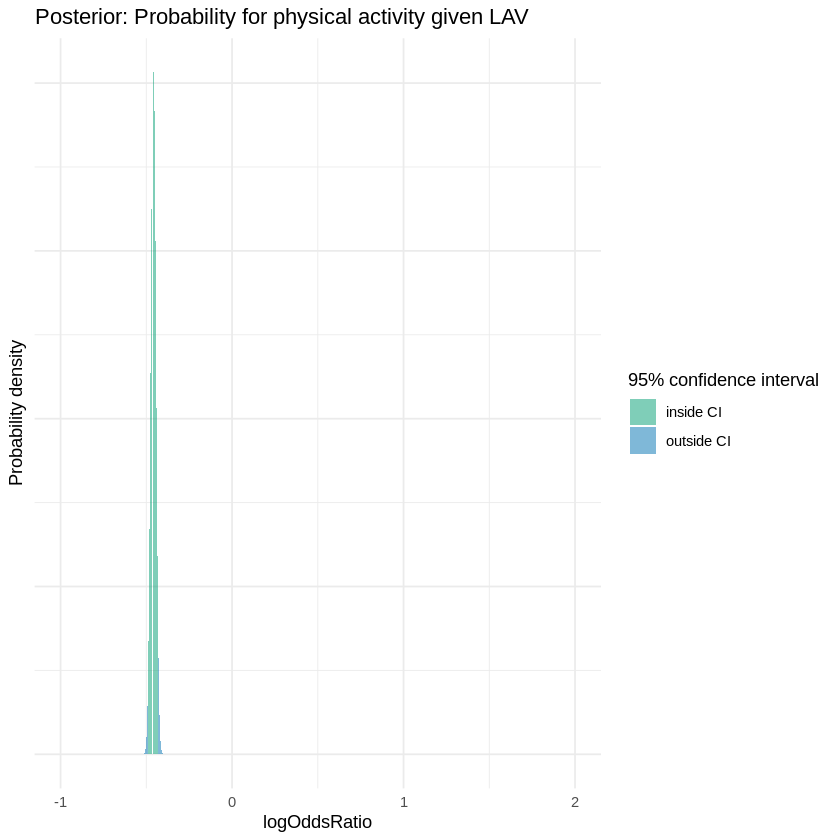

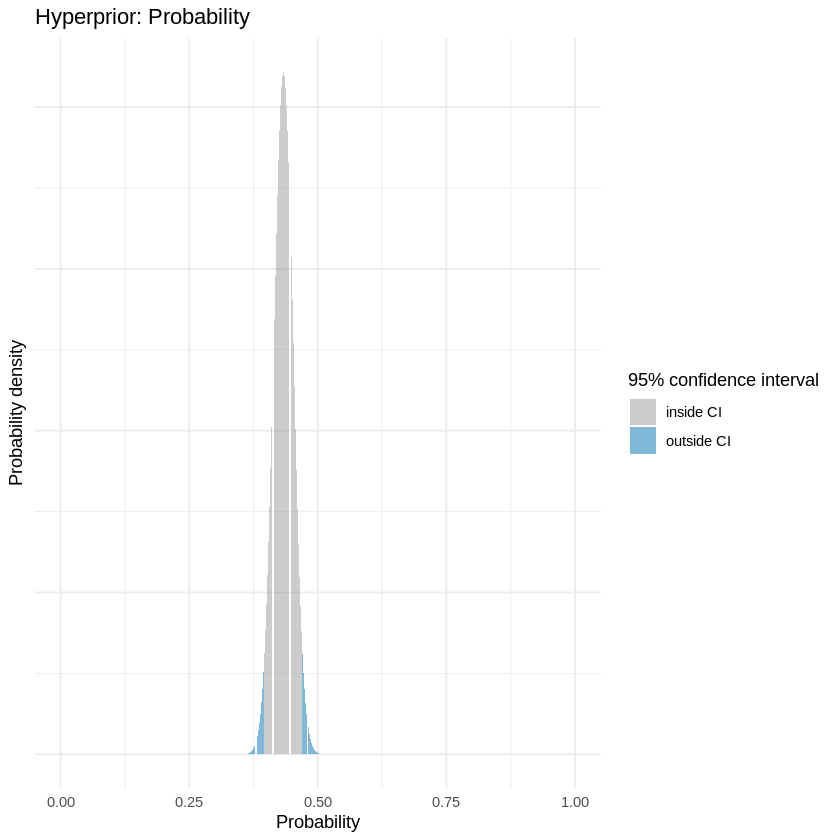

[1] "LVAD"


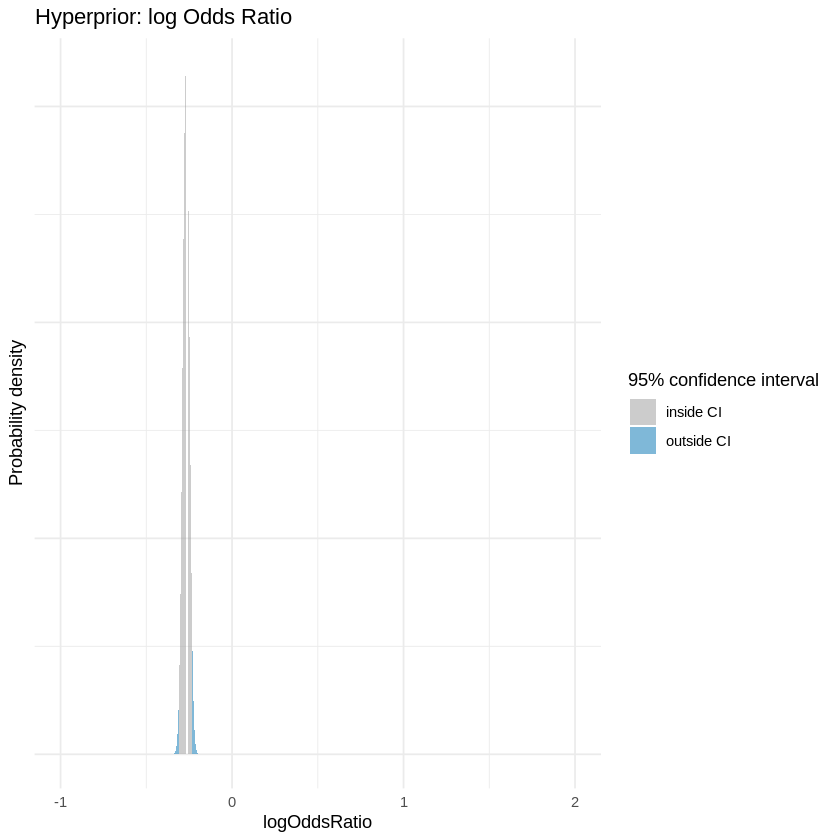

[1] "LVAD"


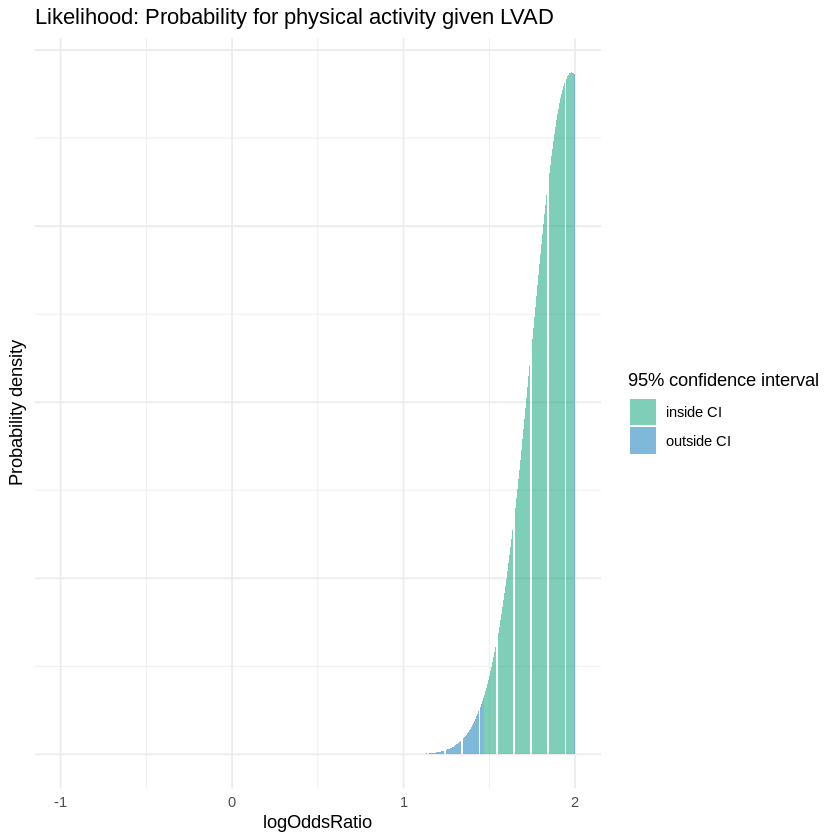

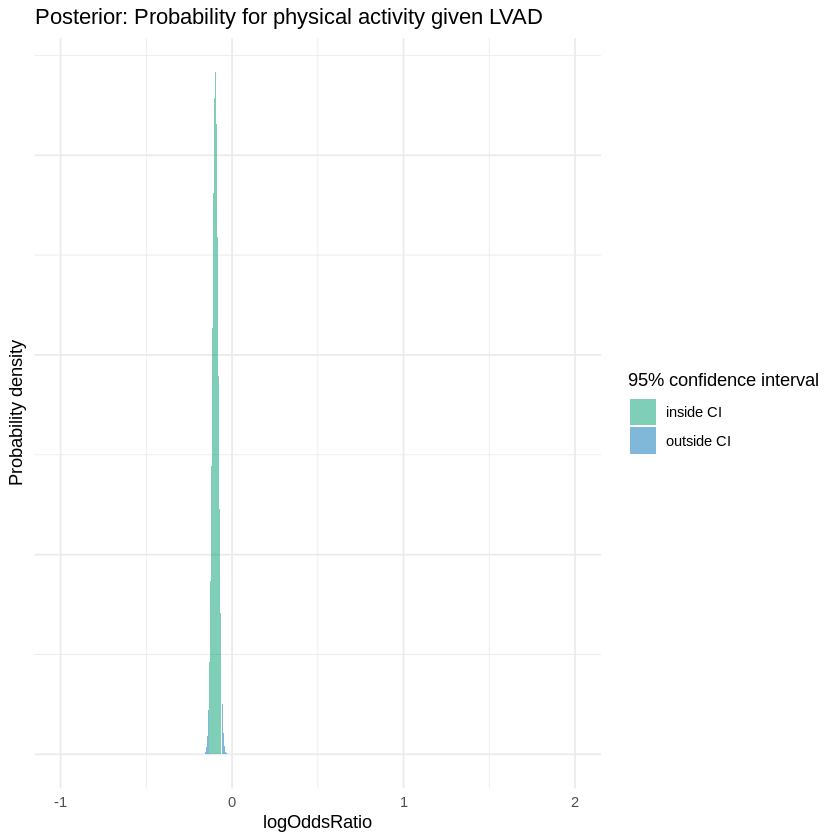

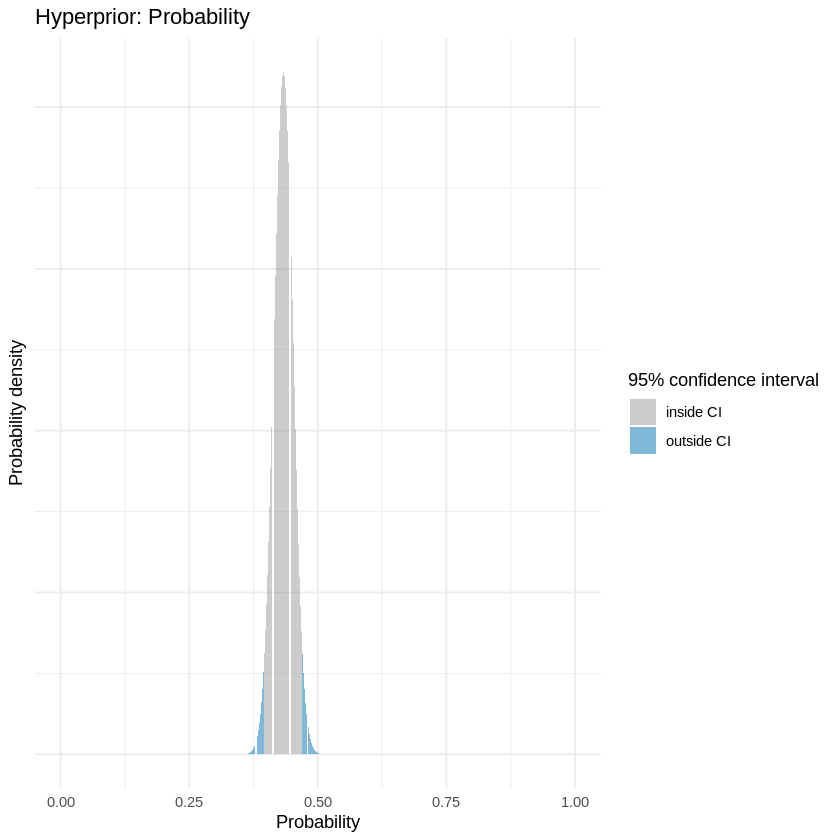

[1] "LVR"


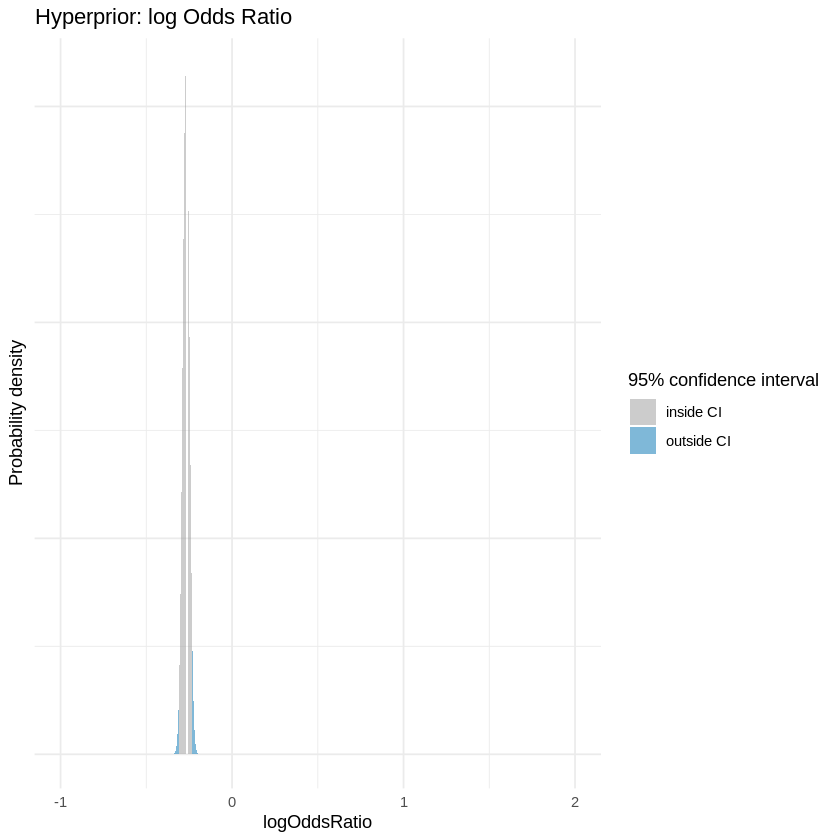

[1] "LVR"


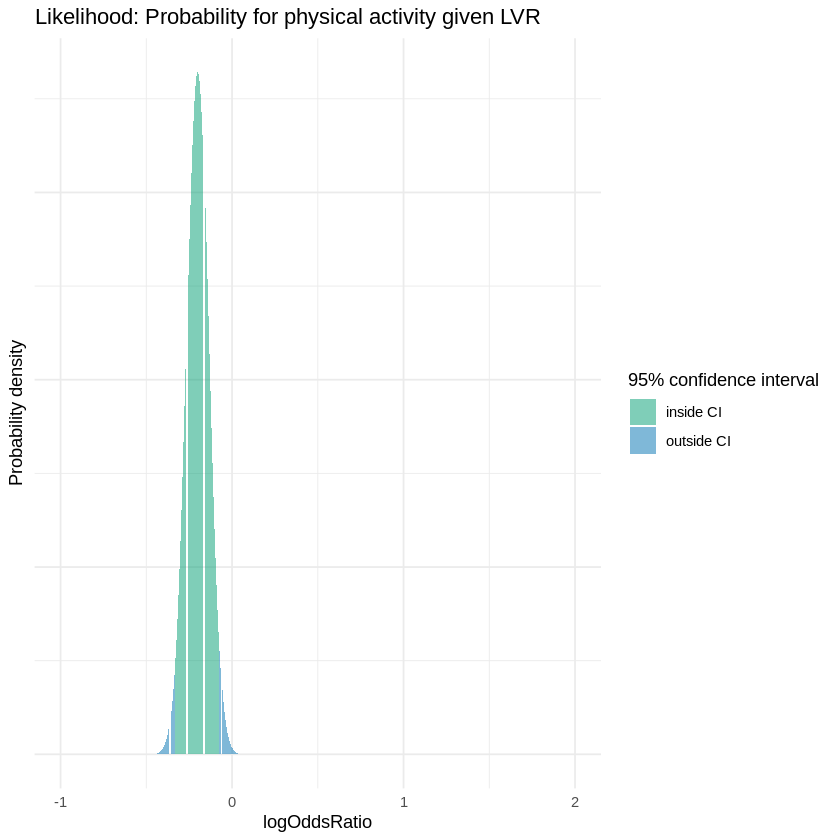

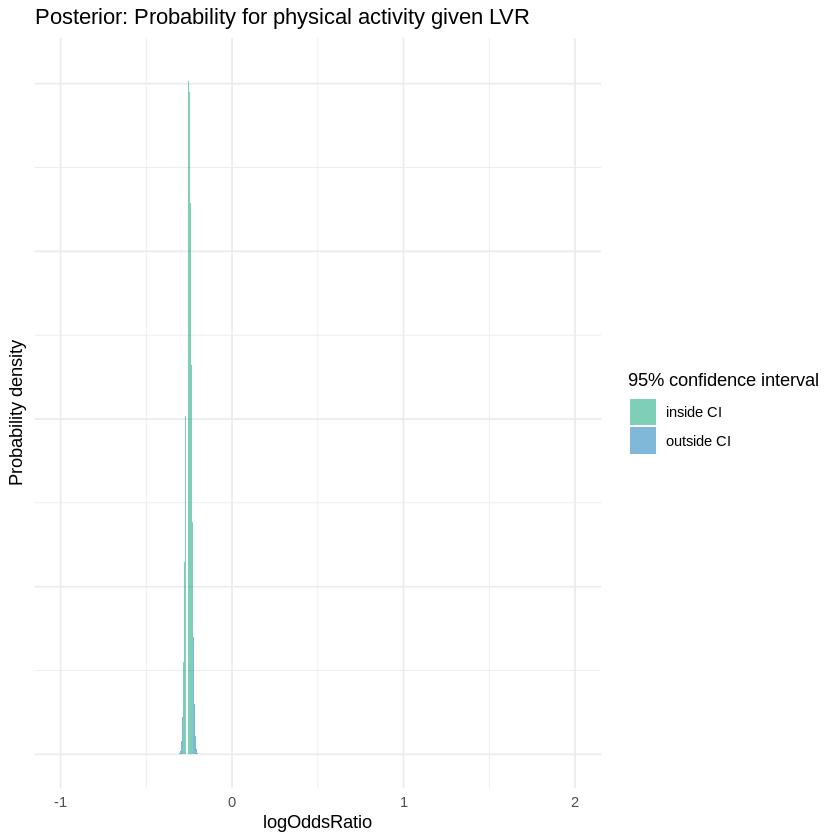

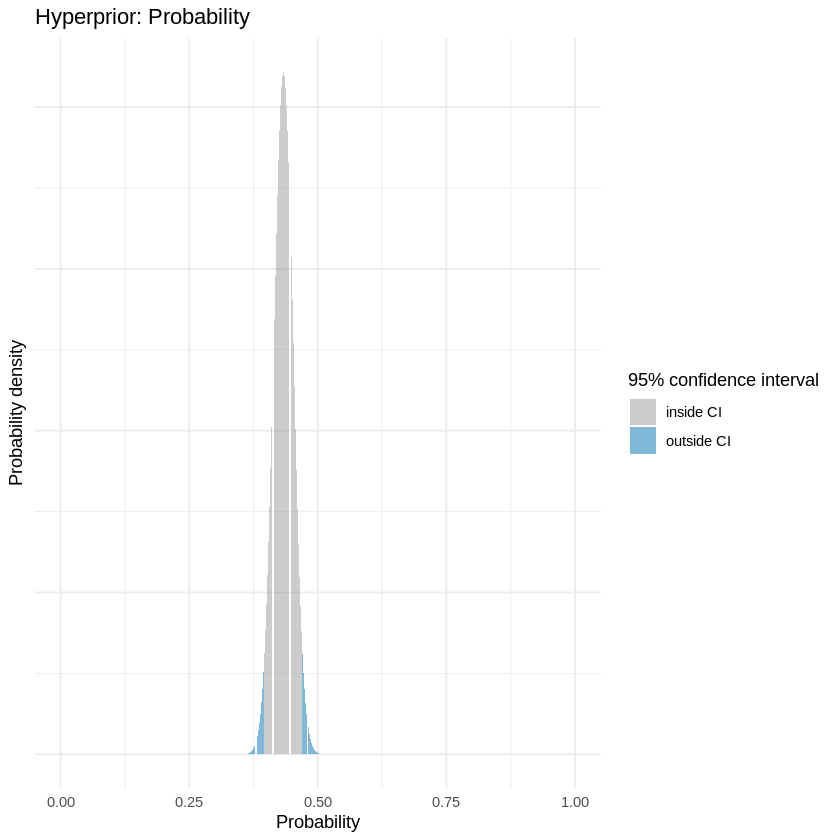

[1] "Partner"


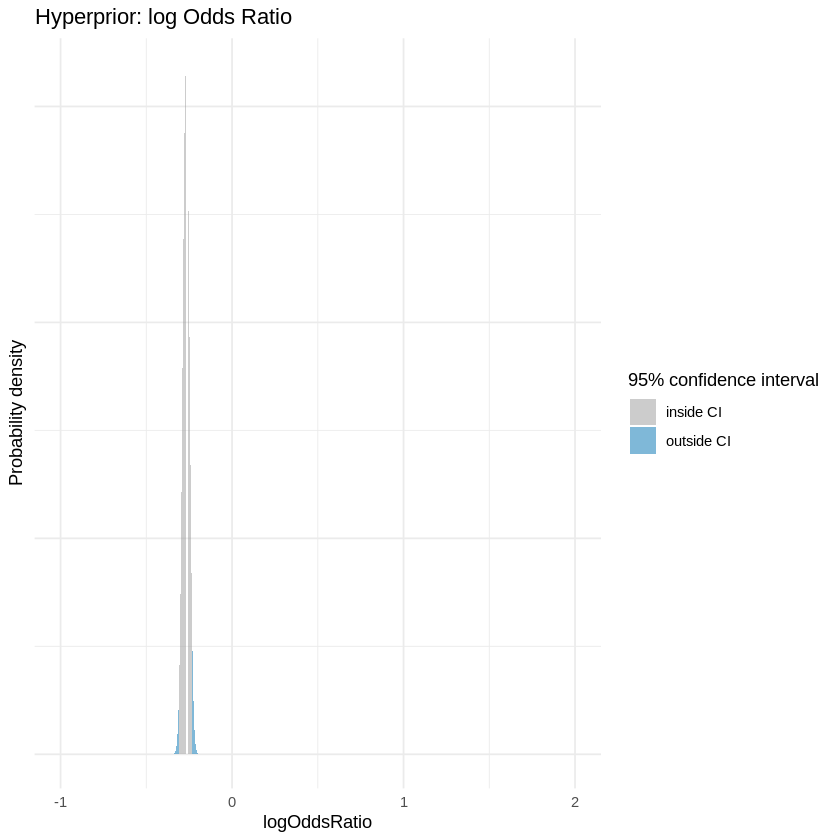

[1] "Partner"


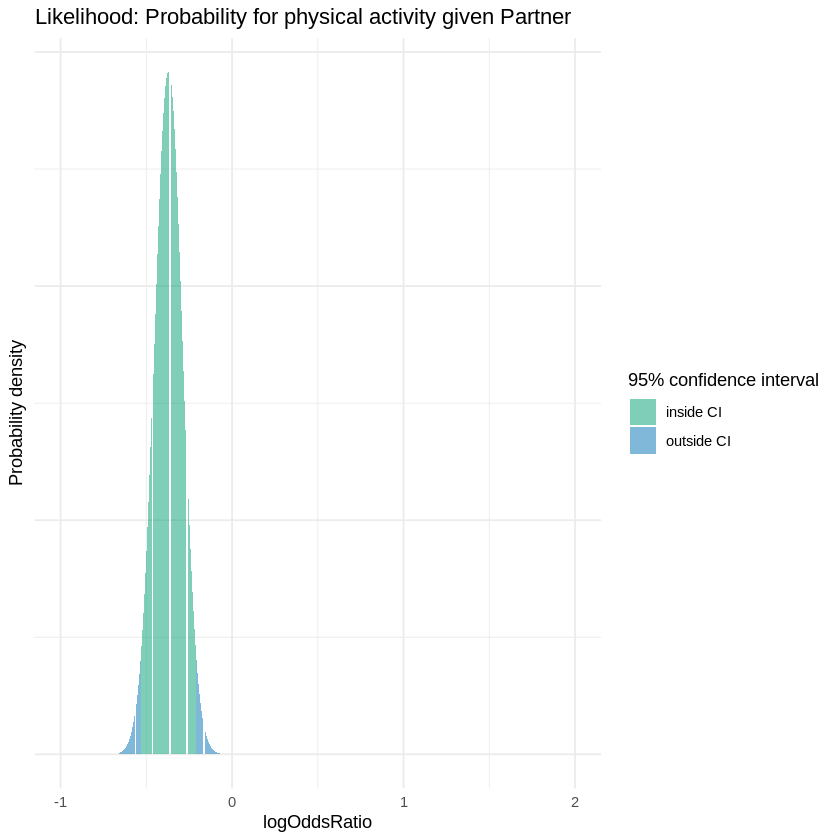

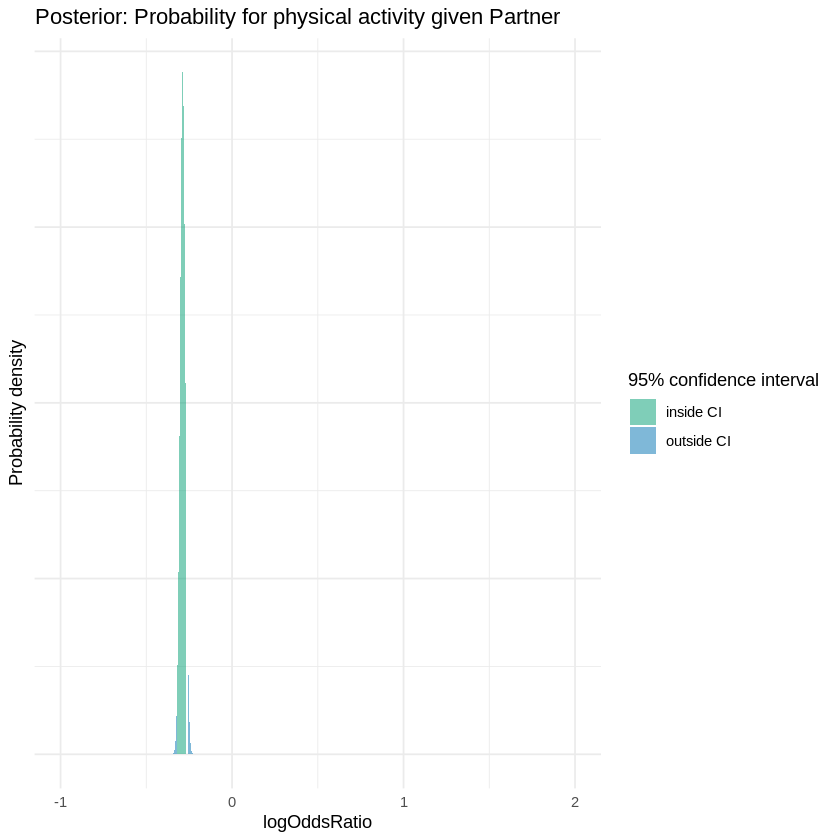

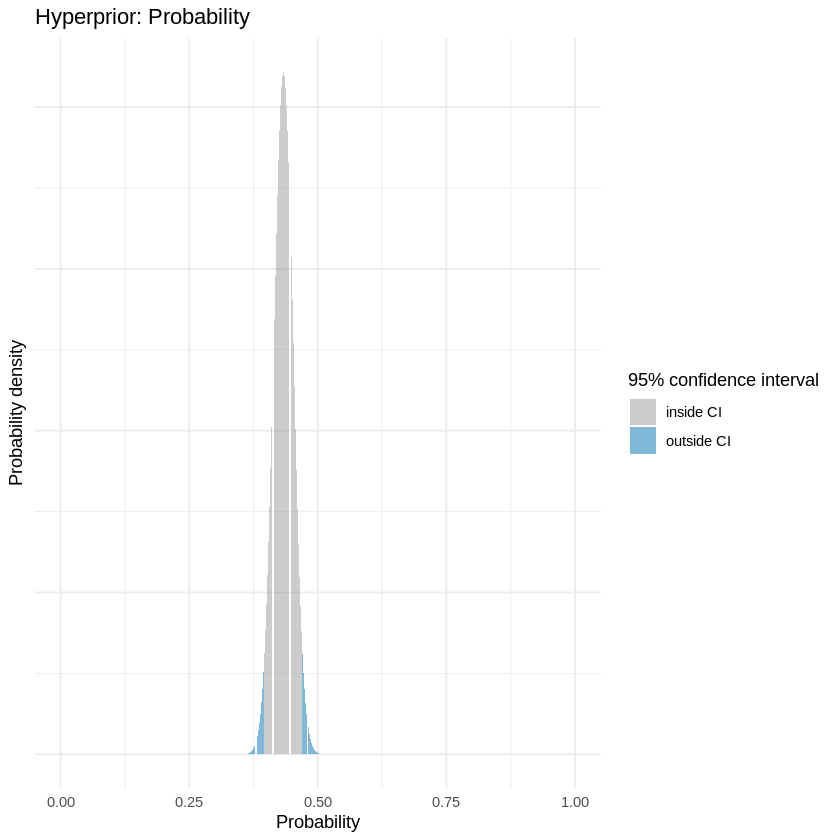

[1] "PeakVO2"


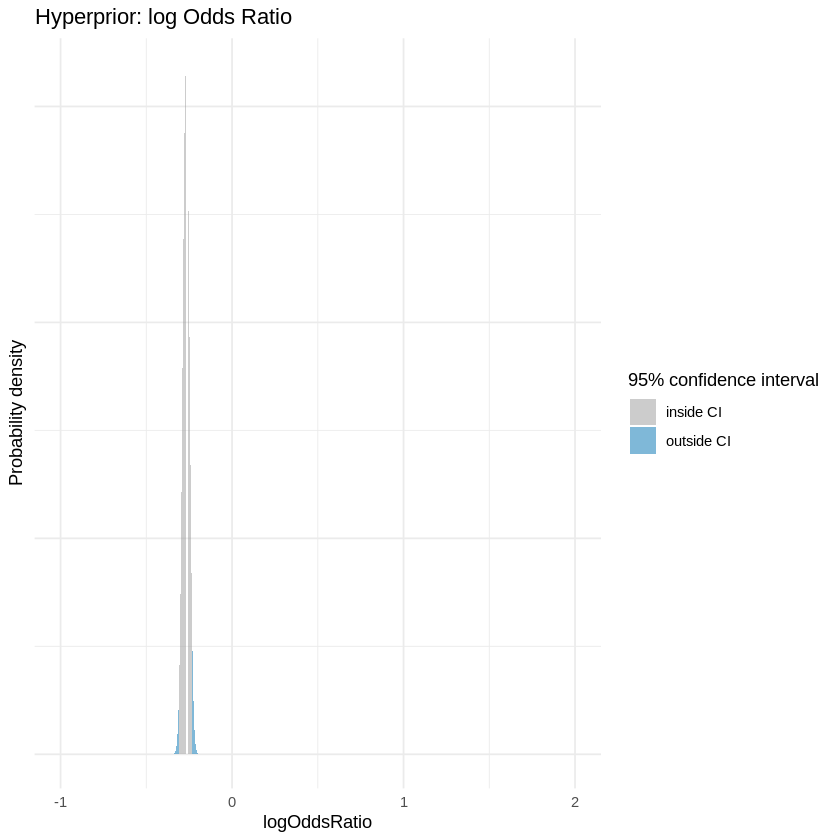

[1] "PeakVO2"


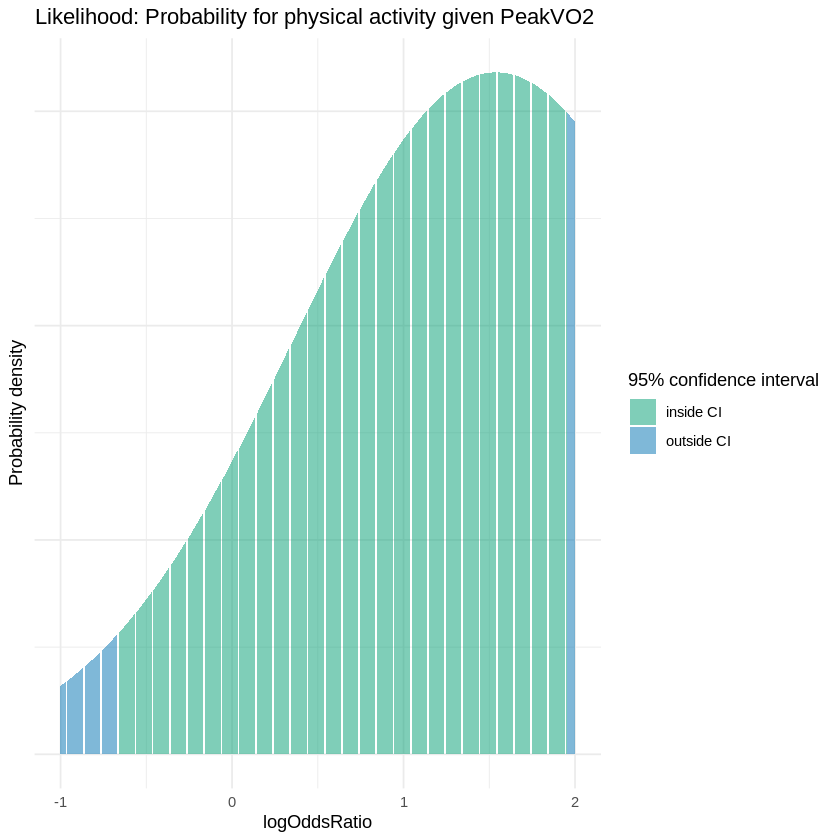

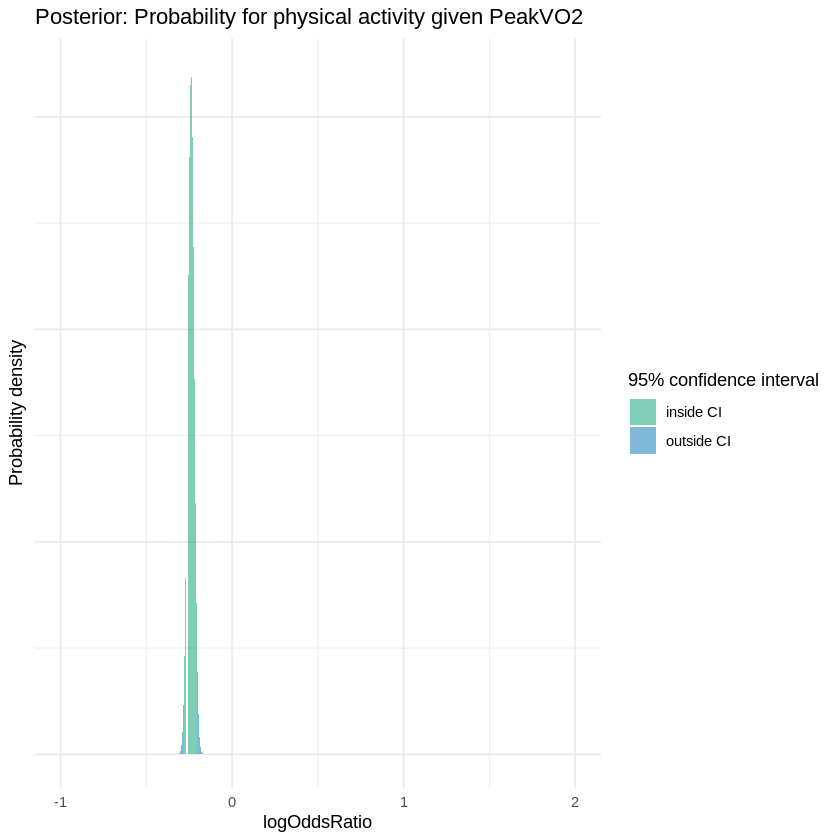

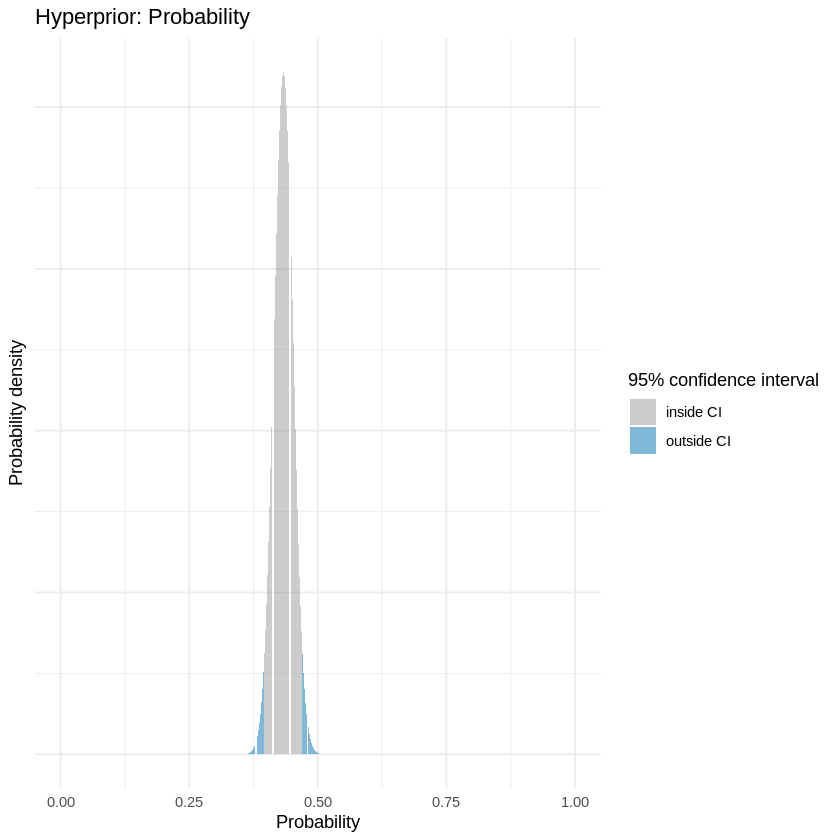

[1] "PerceivedExertion"


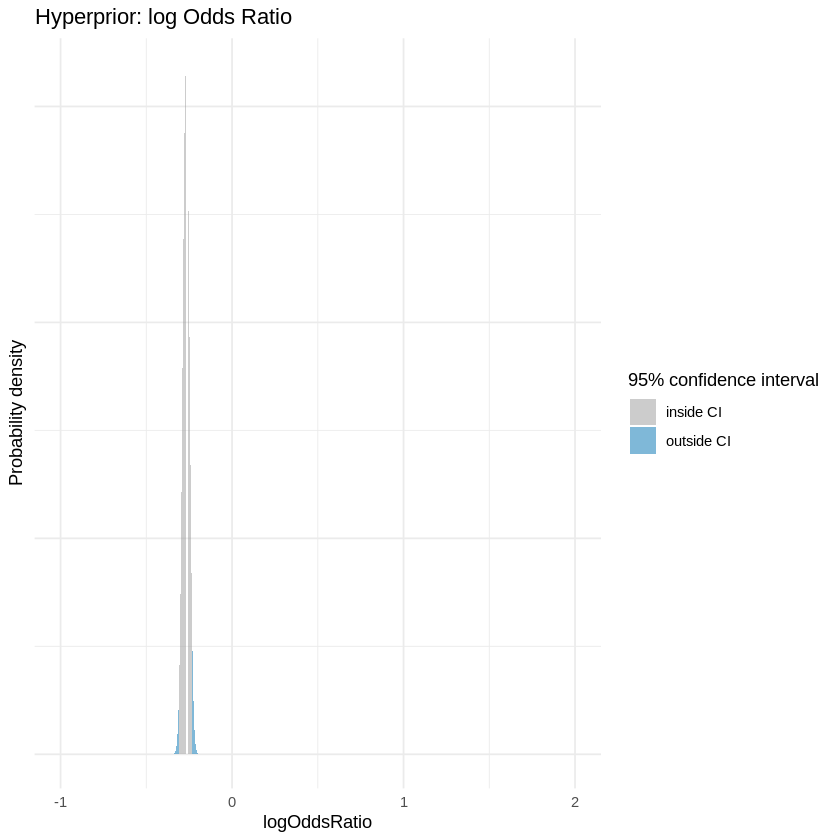

[1] "PerceivedExertion"


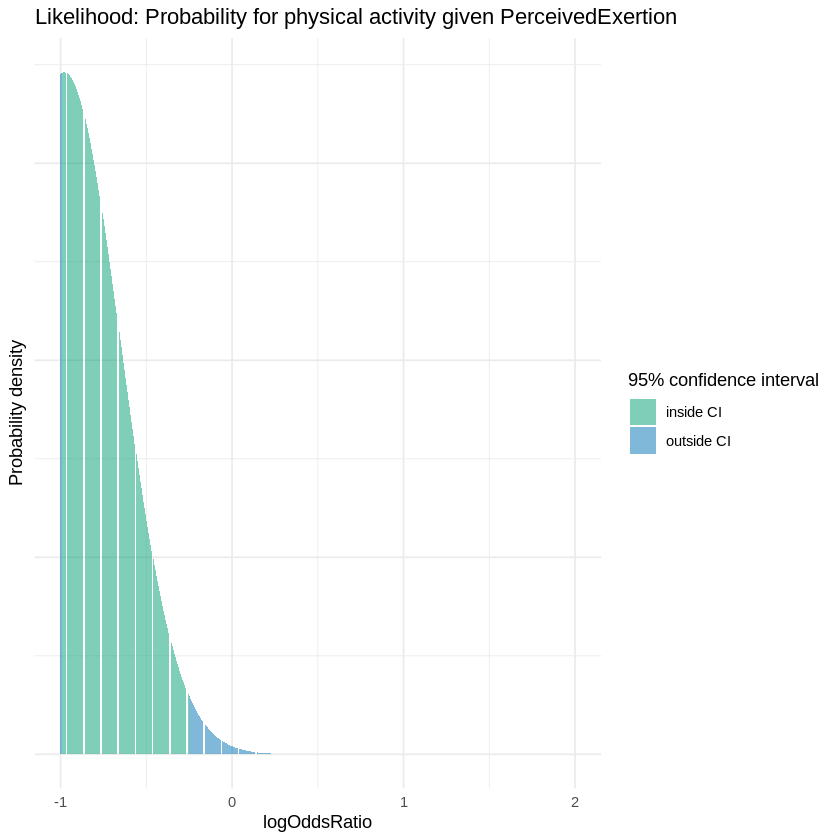

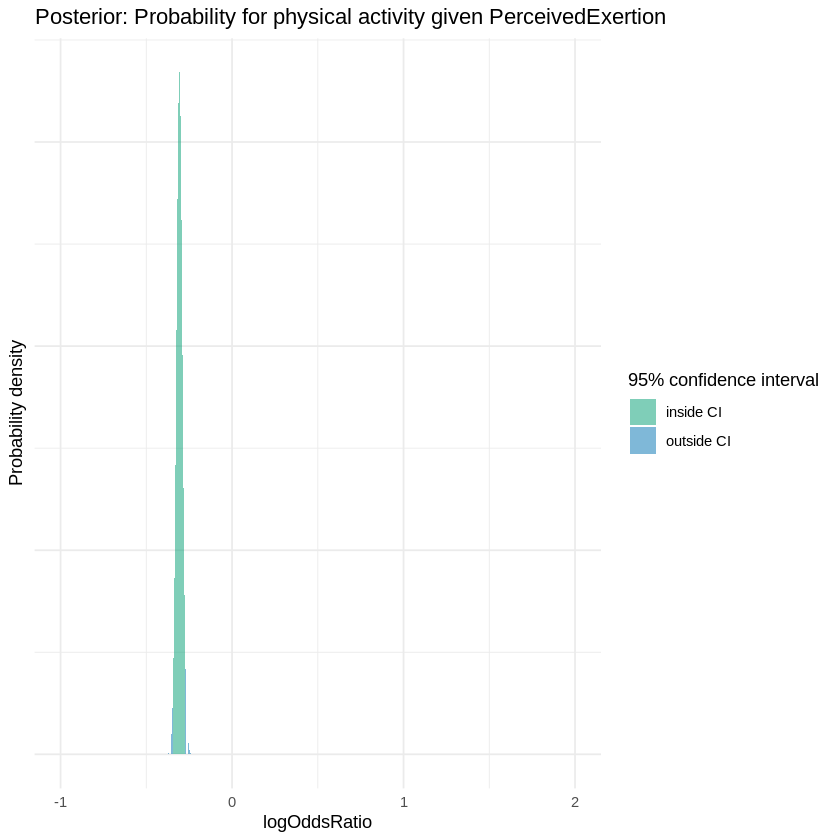

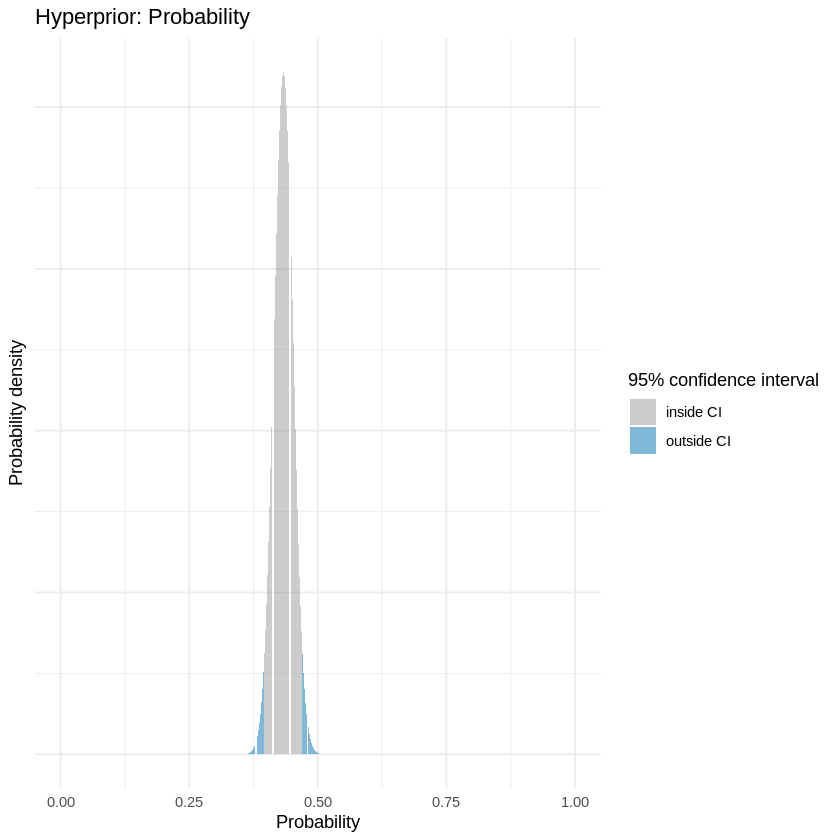

[1] "QoL"


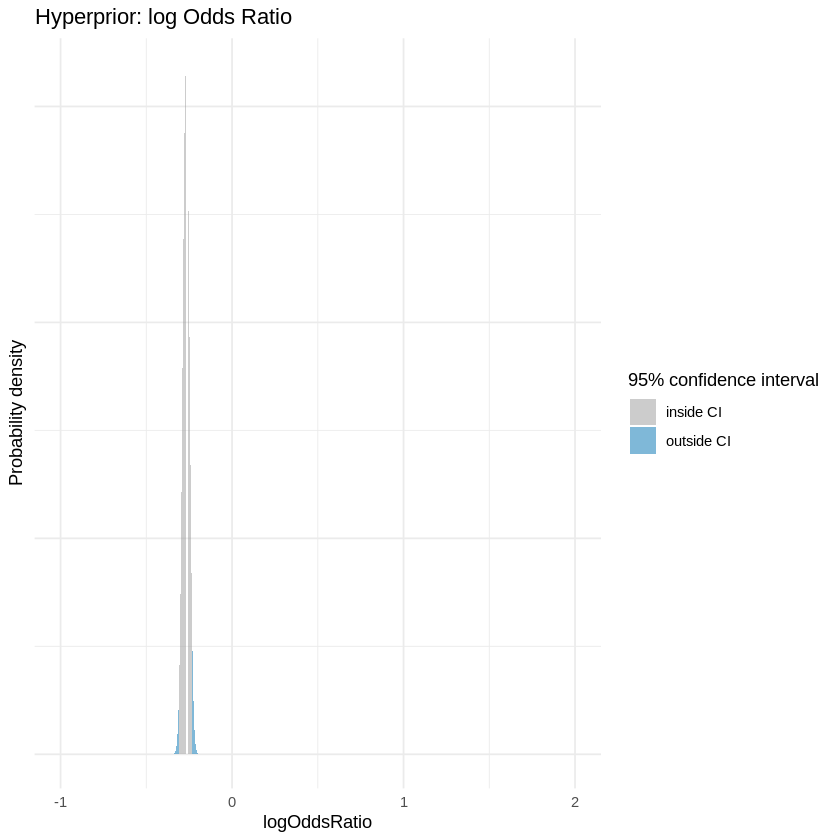

[1] "QoL"


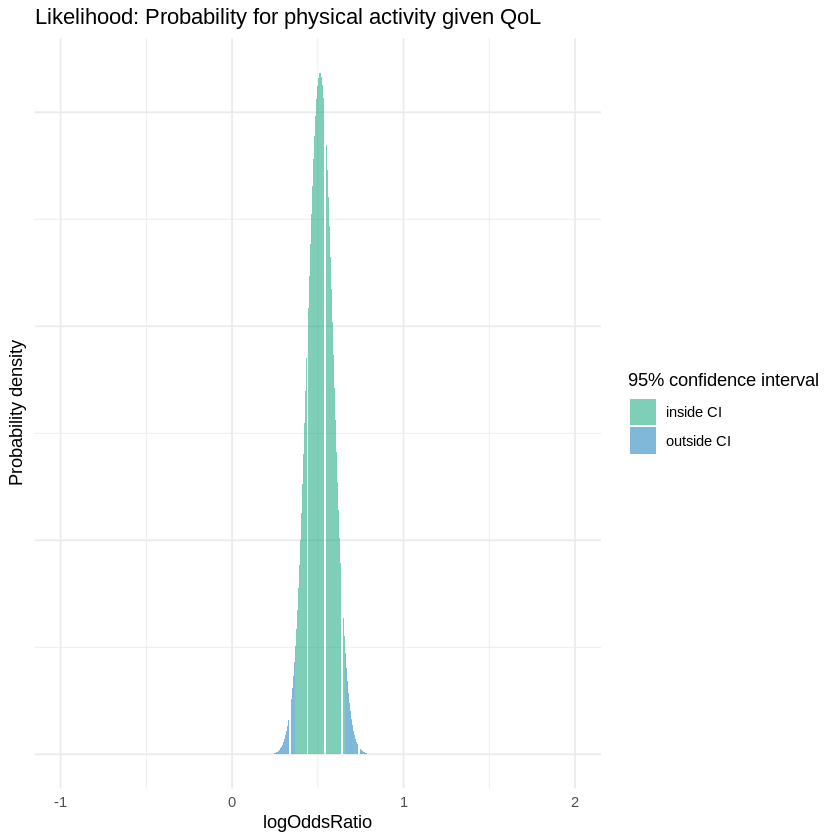

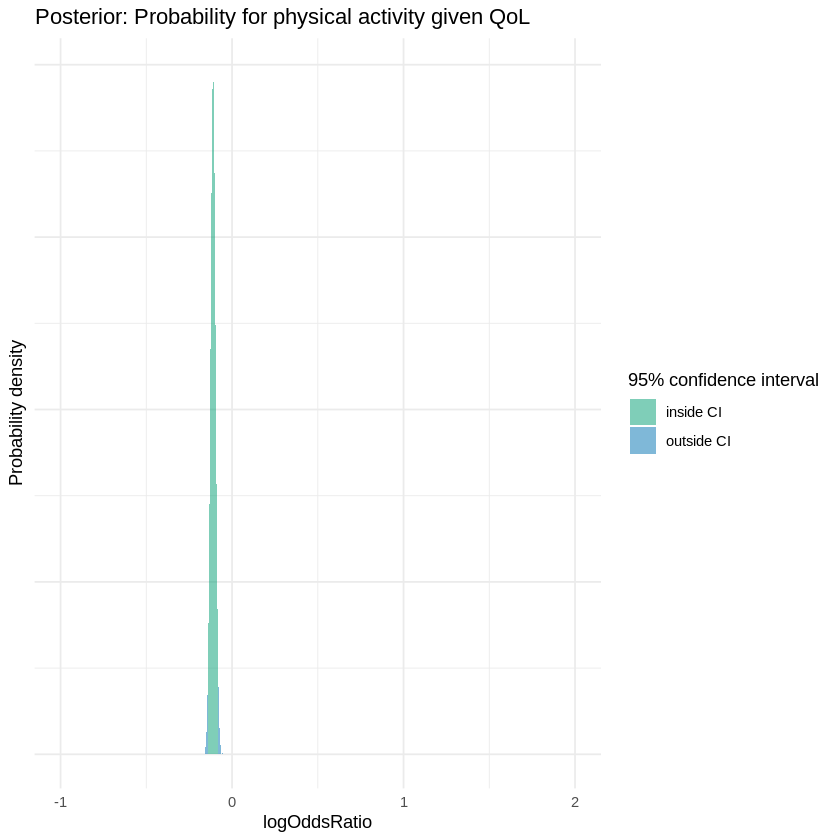

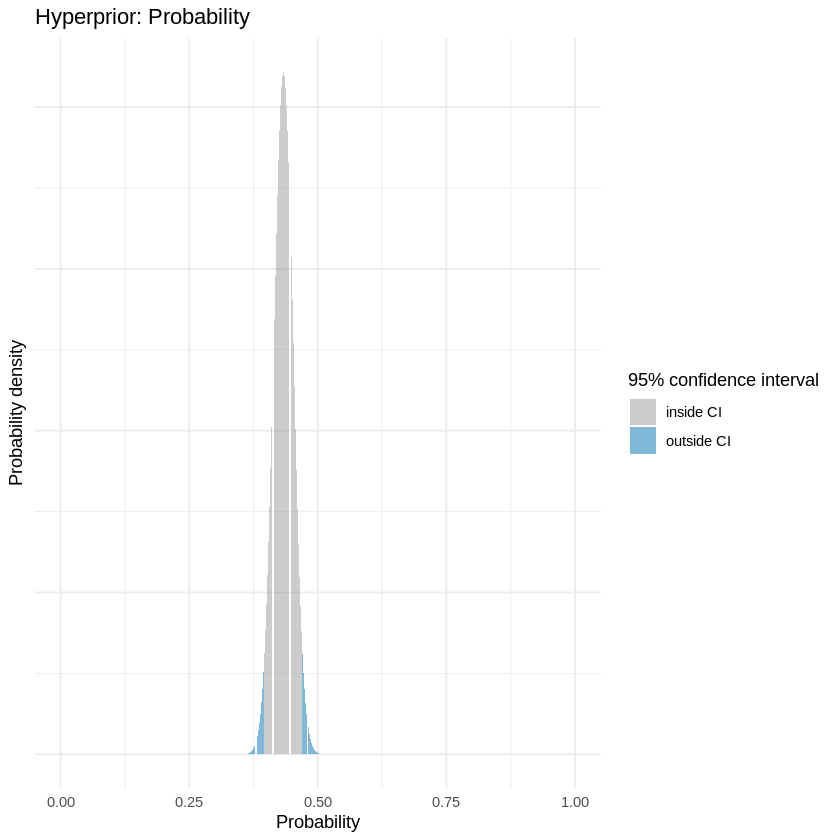

[1] "RenalFunction"


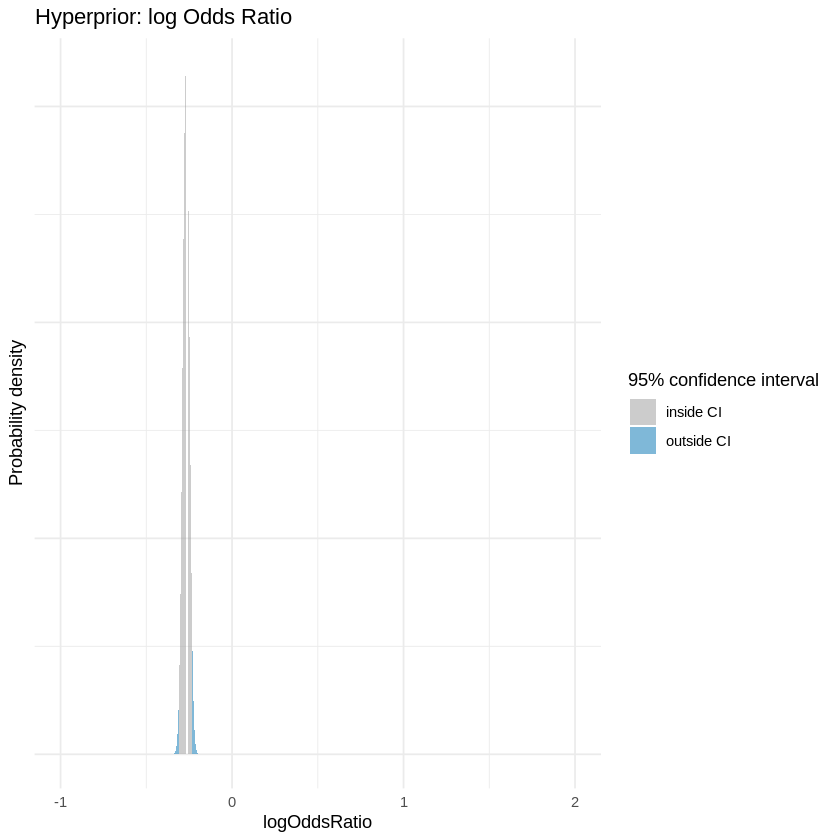

[1] "RenalFunction"


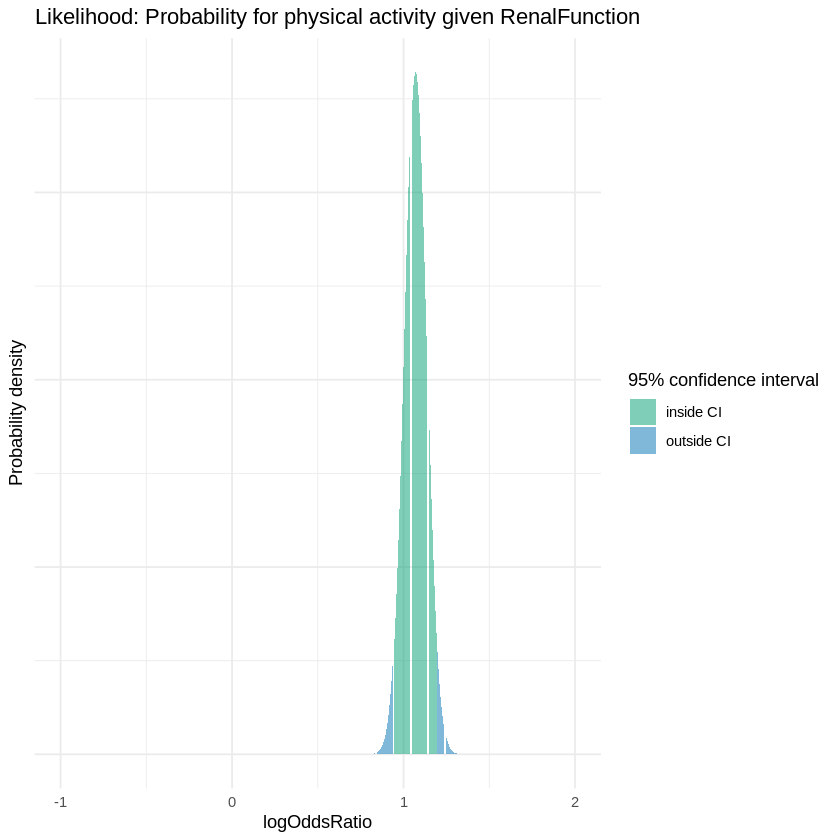

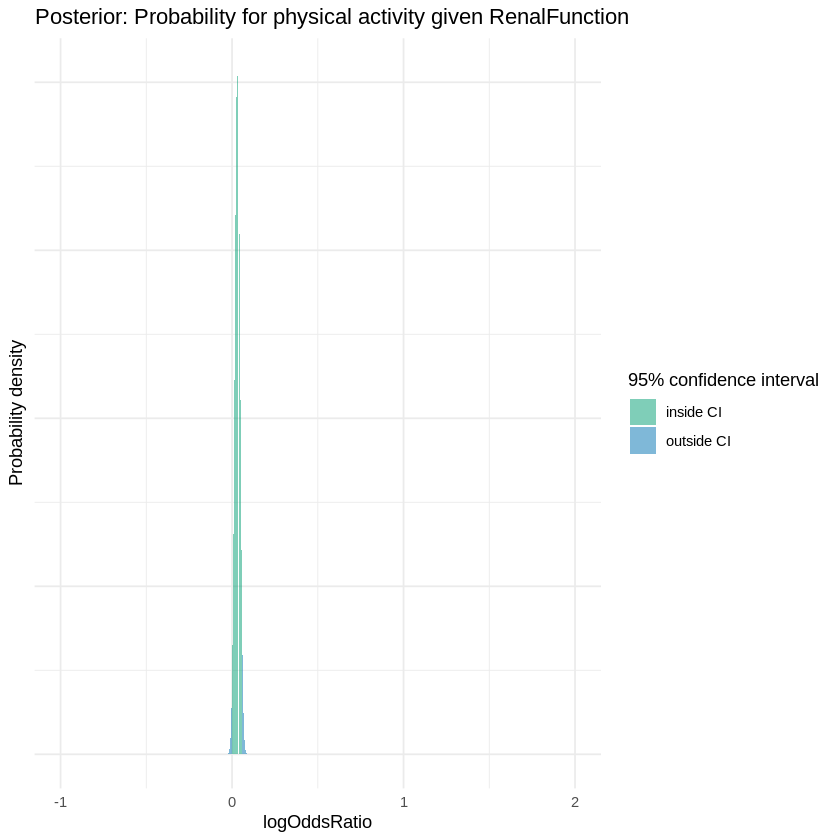

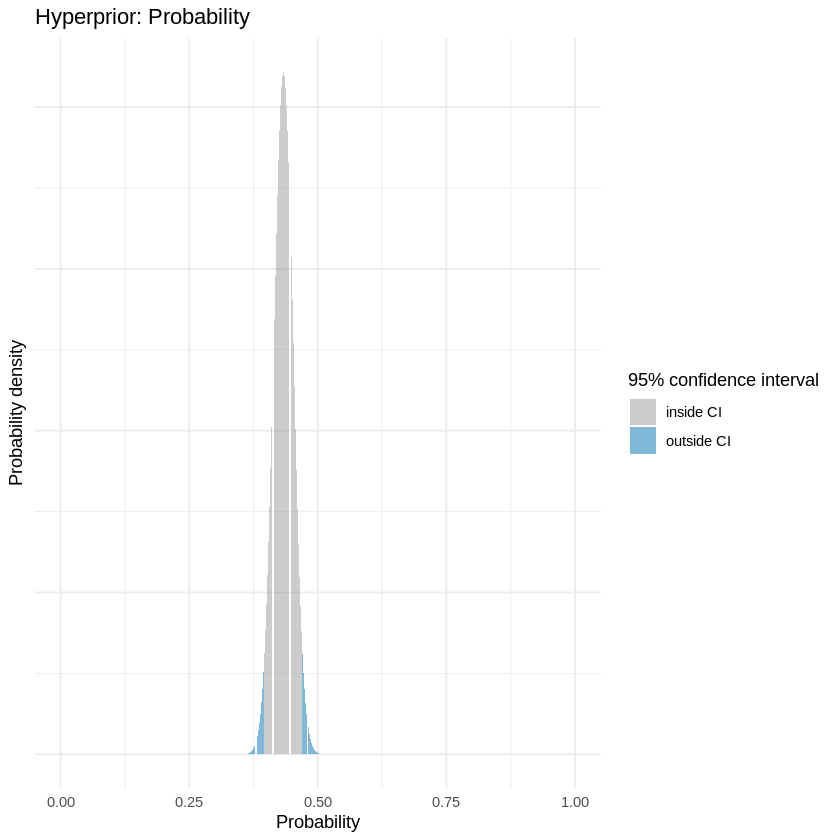

[1] "Smoking"


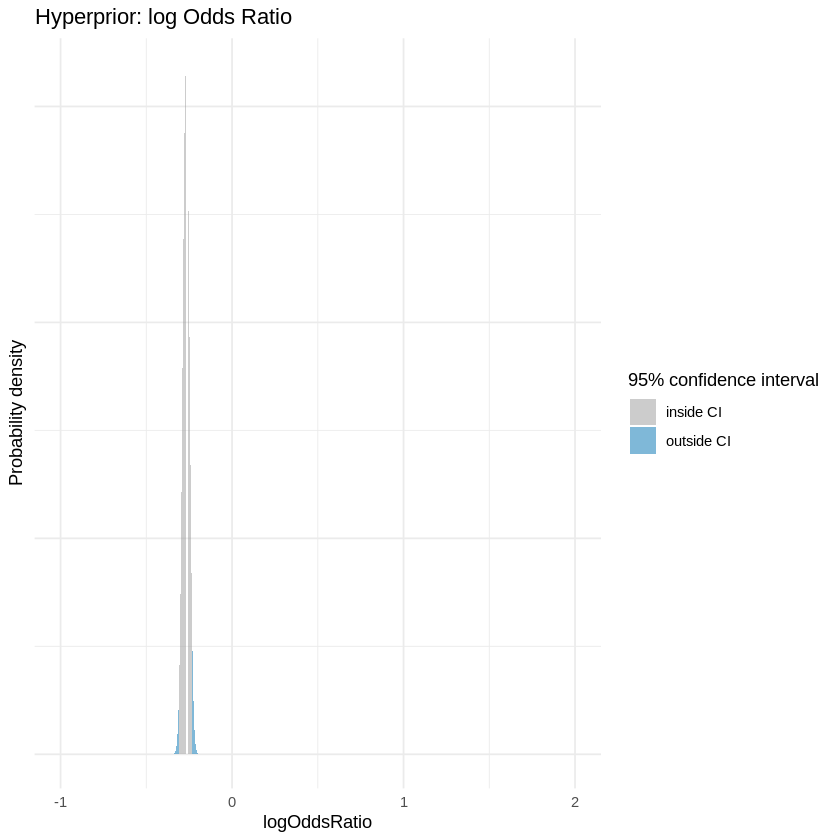

[1] "Smoking"


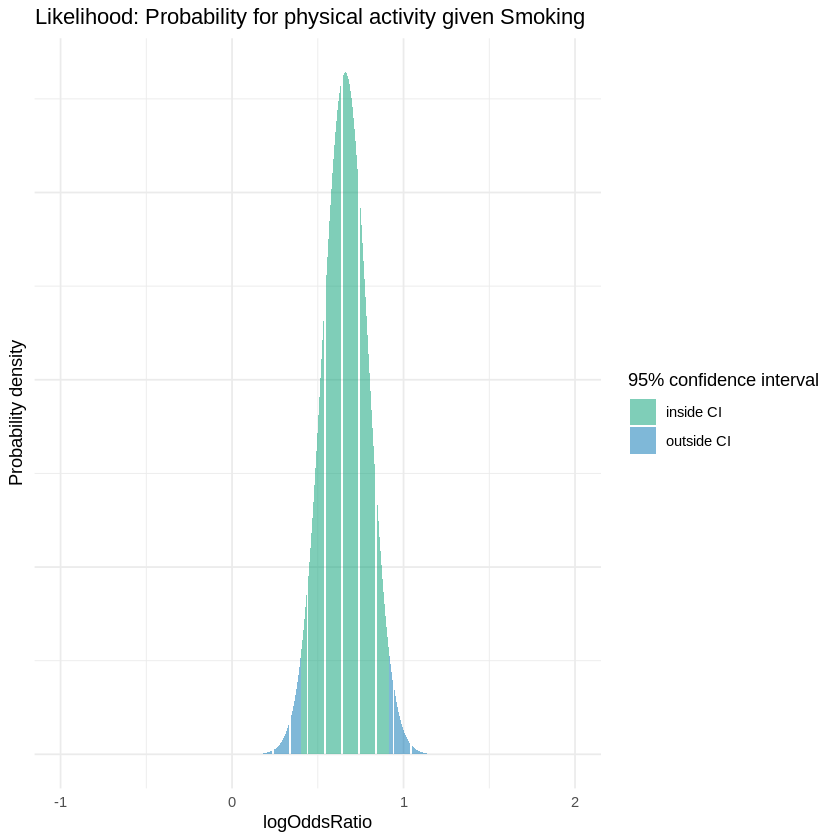

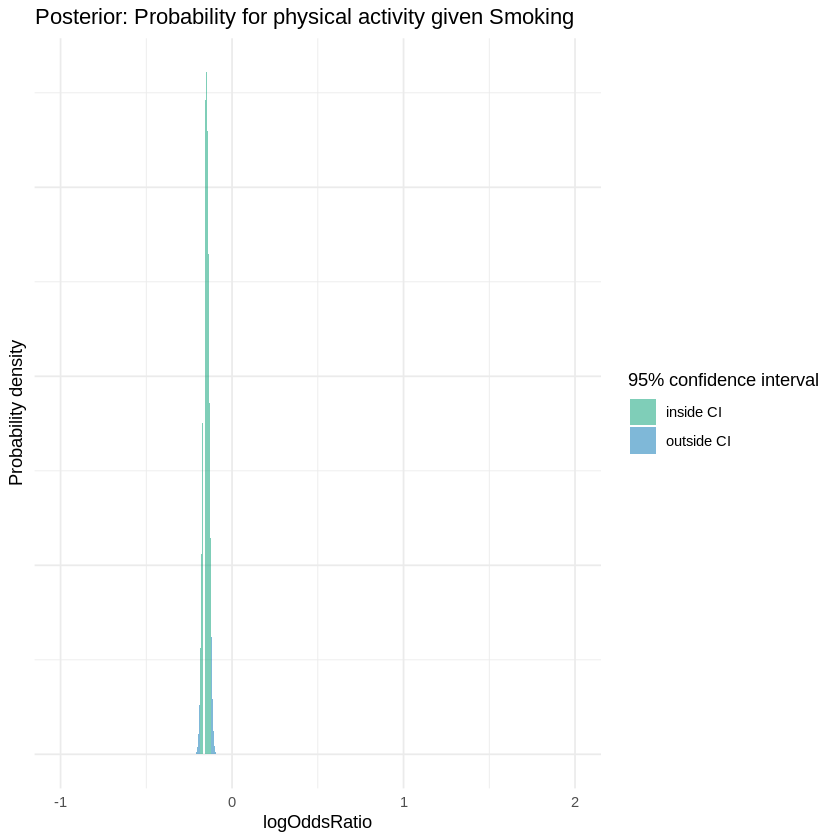

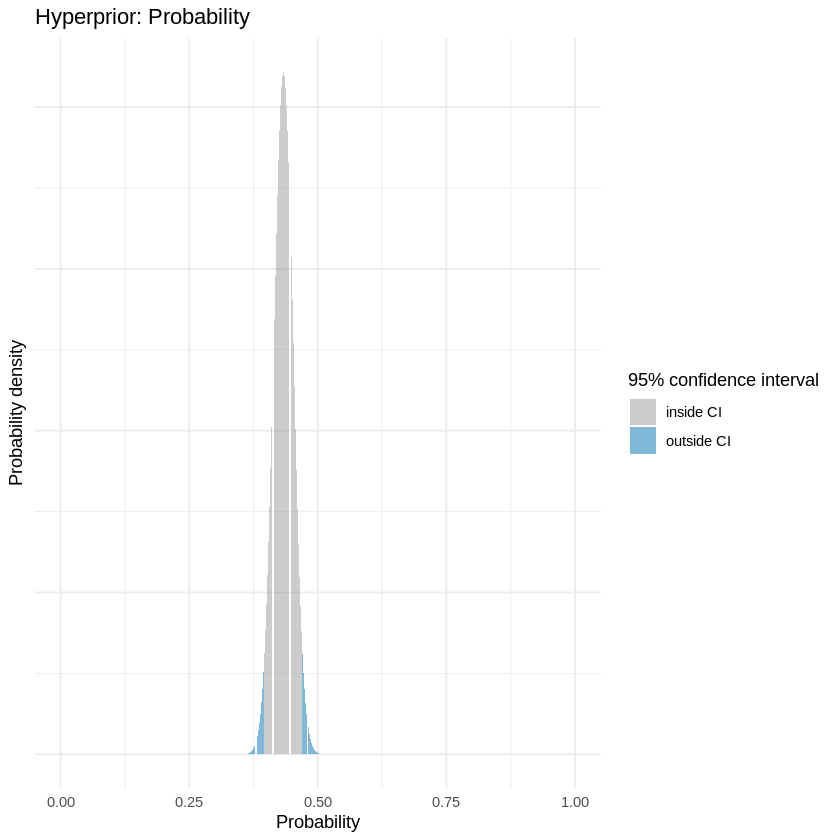

[1] "Symptoms_distress"


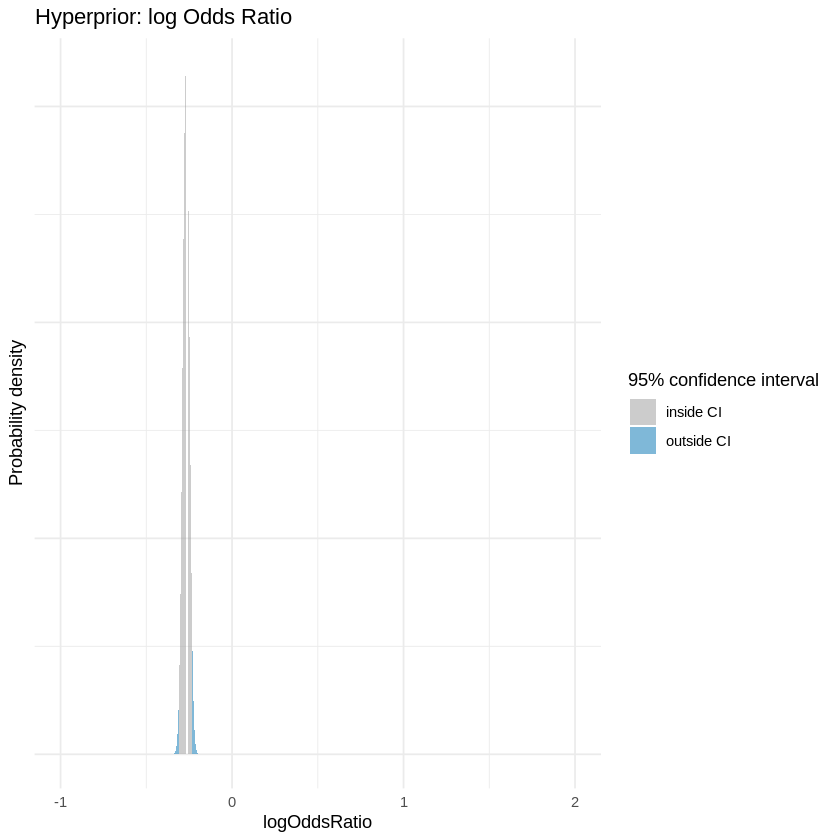

[1] "Symptoms_distress"


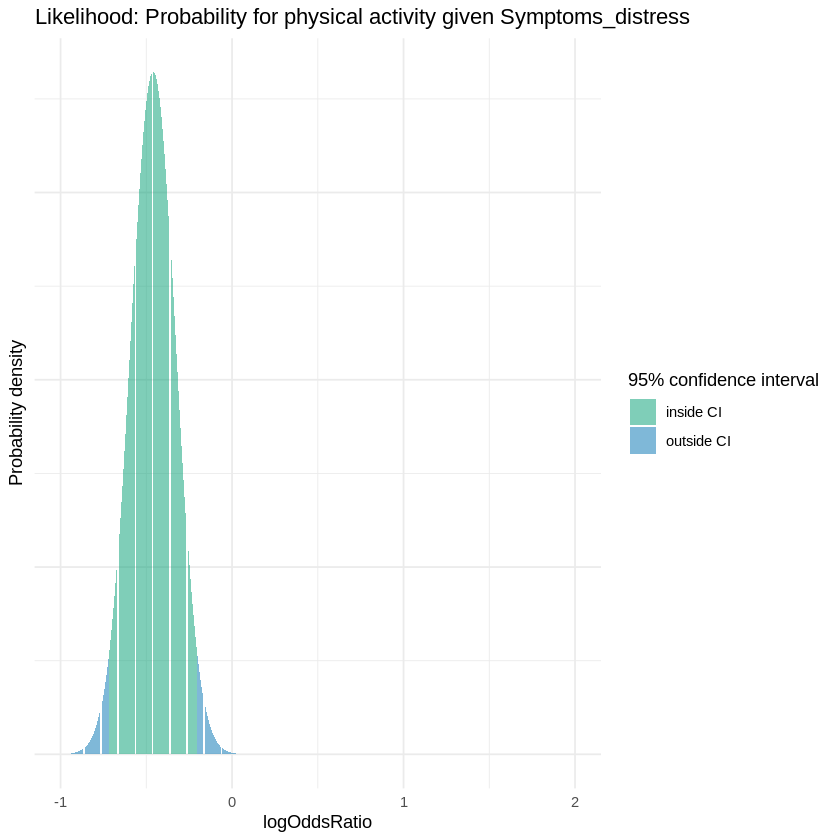

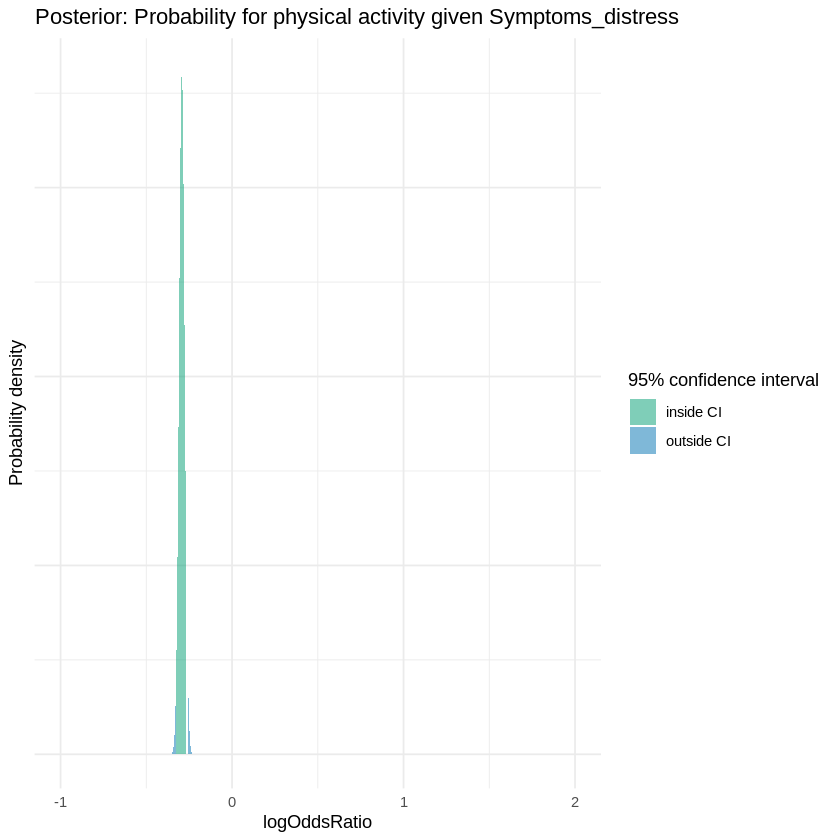

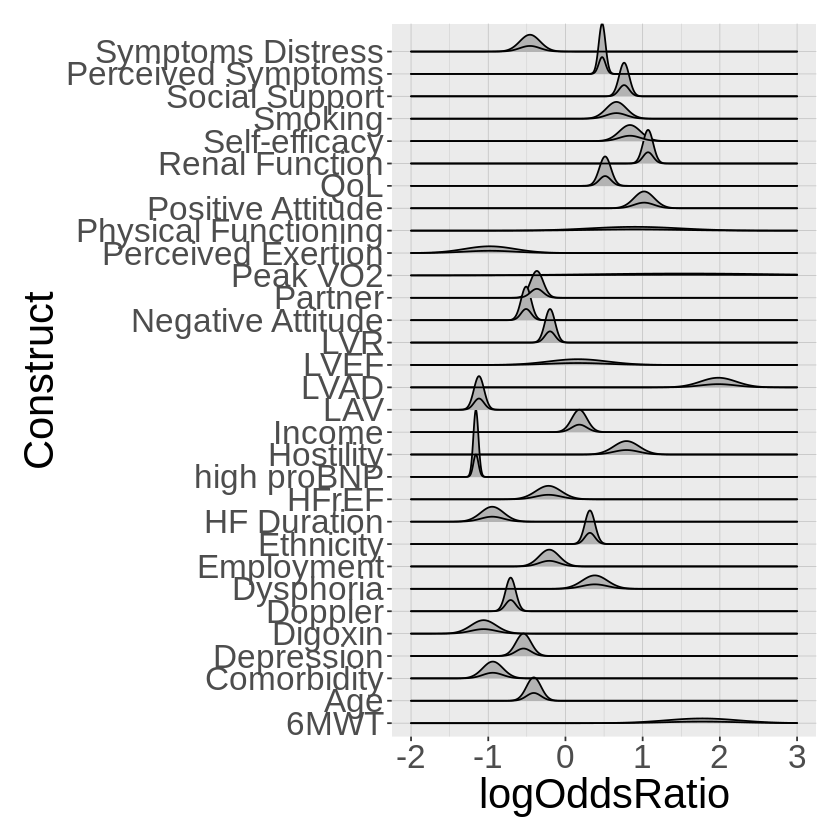

In [ ]:
## Quantitative evidence 
source(paste(SOURCE_ROOT, "BayesianMA_Quant_only.R", sep=""))
# A number of barriers and enablers were assessed in quantitative constrcuts only. For these constructs, the likelihood is elicited below (in green). 


# Comparing prior, likelihood and posterior
 Below we plot probability distribution for the expected value of the log OR of physical activity conditioned on identified determinants according to qualitative evidence (prior expert elicitation task), quantitative evidence alone (likelihood), and qualitative combined with quantitative evidence (QUAL + quant), in pink, green and amber, respectively. 

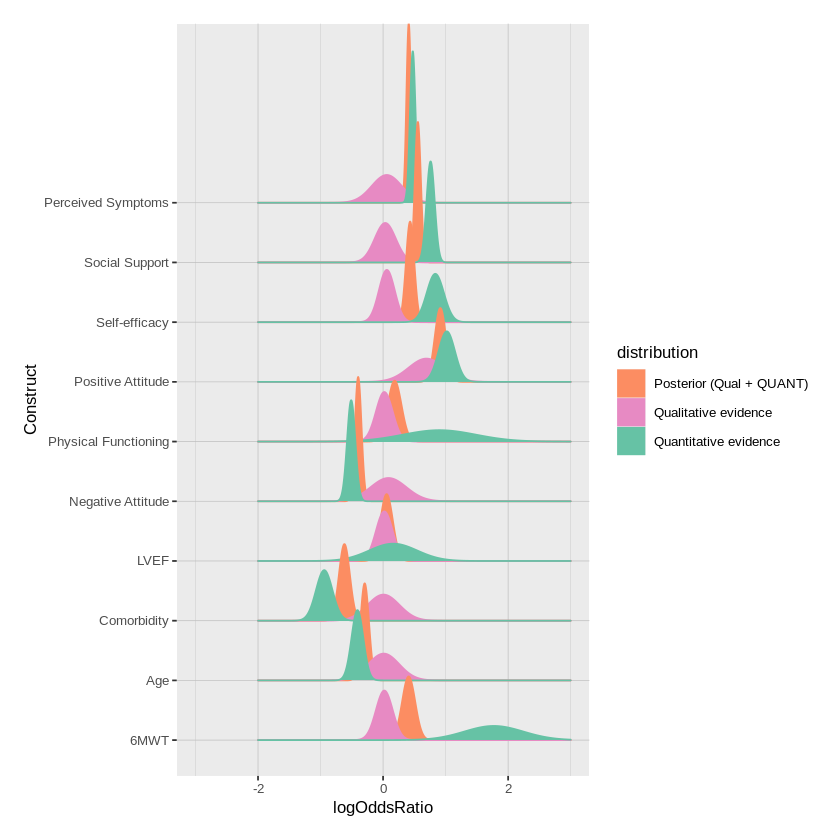

In [ ]:
#compare qualitative and quantitative evidence
source(paste(SOURCE_ROOT, "Compare_Qual_Quant_posterior.R", sep=""))
